## DATA SCIENCE

Group 17

Daniel Lucas  
Ricardo Nobre  
Ricardo Carvalho  
Diogo Torneiro  
Vasco Pombo  

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import date

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

### Importing Data

In [2]:
original_data = pd.read_csv('cluster.csv')

In [3]:
df = original_data.copy()

In [4]:
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


| Variable      | Description |
| ----------- | ----------- |
| Name      | Customer’s name       |
| Year Birth    | Customer’s birth year        |
| Longevity   | Whether the customer registered more than 1 year ago or not        |
| Churn   | Whether the customer churned or not (churn or nochurn)        |
| TypeTravel   | Customer’s reason for travelling (business or leisure)        |
| RoomType   | Type of room reserved        |
| RewardPoints   | Customer’s rewarding point for loyalty        |
| Comfort   | Satisfaction level of customer regarding comfort of the room (0 to 5)        |
| ReceptionSchedule   | Satisfaction level of customer regarding reception schedule (0 to 5)        |
| ReceptionSchedule   | Satisfaction level of customer regarding food and drink available (0 to 5)        |
| Location   |   Satisfaction level of customer regarding accommodation location (0 to 5)      |
| Wifi   |    Satisfaction level of customer regarding wi-fi service (0 to 5)     |
| Amenities   | Satisfaction level of customer regarding accommodation amenities(0 to 5)        |
| Staff   | Satisfaction level of customer regarding staff (0 to 5)        |
| OnlineBooking   | Satisfaction level of customer regarding online booking ease(0 to 5)        |
| PriceQuality   | Satisfaction level of customer regarding price quality relationship (0 to 5)        |
| RoomSpace   | Satisfaction level of customer regarding room space (0 to 5)        |
| CheckOut   | Satisfaction level of customer regarding check-out (0 to 5)        |
| CheckIn   | Satisfaction level of customer regarding check-in (0 to 5)        |
| Cleanliness   | Satisfaction level of customer regarding cleanliness (0 to 5)        |
| BarService   | Satisfaction level of customer regarding bar service (0 to 5)        |

## CRISP-DM

### 1. Data Understanding

#### 1.1 Dataframe Size

In [5]:
df_original_row_size = df.shape[0]
df_original_columns_size = df.shape[1]

print("Dataframe has", df_original_row_size, "rows and", df_original_columns_size, "columns")

Dataframe has 15589 rows and 21 columns


#### 1.2 Dataframe Info and Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0


In [8]:
df['Year_Birth'].mode()

0    1982.0
dtype: float64

On a first look, we noticed the ranges of each variable look acceptable. However, some variables have different scales than others and this must be handled later on.

#### 1.2.1 Variable Analysis and Congruence Checks

#### 1.2.1.1 Churn

In [9]:
df['Churn'].value_counts()

nochurn    8477
churn      7112
Name: Churn, dtype: int64

Variable looks good to us, we will create dummies for it to make it numerical.

<AxesSubplot:xlabel='Churn', ylabel='count'>

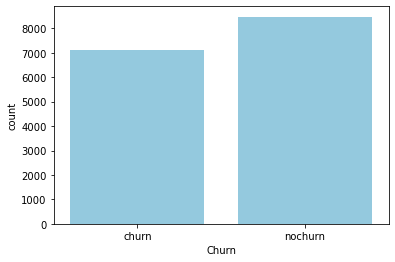

In [10]:
sns.countplot(df["Churn"], color="skyblue")

#### 1.2.1.2 Name

In [11]:
df['Name'].value_counts()

Mr. Michael Smith    9
Ms. Amanda Smith     7
Mr. John Smith       7
Mr. Michael Jones    6
Mr. William Smith    6
                    ..
Ms. Laurie Smith     1
Mr. Aaron Cox        1
Ms. Natasha Estes    1
Ms. Beverly Lee      1
Mr. Steven Mendez    1
Name: Name, Length: 14227, dtype: int64

Variable looks good tu us and based on the prefix before the name, we can create a new variable called gender.

In [12]:
df["Characters"] = df["Name"].str[:3]
df['Characters'].unique()


array(['Ms.', 'Mr.'], dtype=object)

In [13]:
df.drop(columns=["Characters"], axis=1, inplace=True)
df['Gender'] = [1 if i == 'Mr.' else 0 for i in df["Name"].str[:3]]

In [14]:
df.drop(columns=['Name'], inplace=True)

#### 1.2.1.3 Longevity

In [15]:
df['Longevity'].value_counts()

yes    12548
no      2874
y        167
Name: Longevity, dtype: int64

Variable does not look good because we have entries with 'yes' and entries with 'y' which most likely mean the same. Will will transform the entries with 'y' into 'yes'

In [16]:
df['Longevity'].replace('y','yes', inplace=True)

In [17]:
df['Longevity'].value_counts()

yes    12715
no      2874
Name: Longevity, dtype: int64

<AxesSubplot:xlabel='Longevity', ylabel='count'>

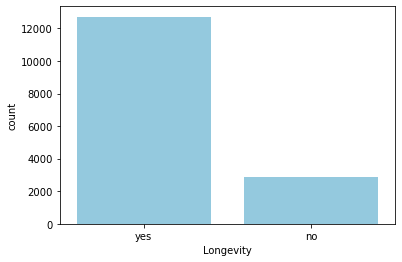

In [18]:
sns.countplot(df["Longevity"], color="skyblue")

#### 1.2.1.4 Year Birth

In [19]:
df['Year_Birth'].value_counts()

1982.0    441
1996.0    416
1980.0    383
1998.0    380
1981.0    369
         ... 
1947.0      9
1945.0      8
1943.0      6
1942.0      3
1936.0      2
Name: Year_Birth, Length: 75, dtype: int64

Variable has missing values. We will handle these missing values and then create a new variable called Age based on this

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

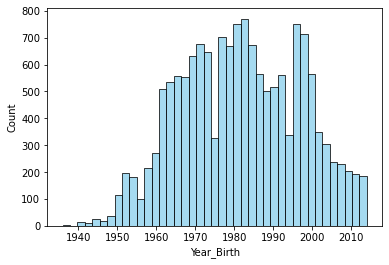

In [20]:
sns.histplot(df["Year_Birth"], color="skyblue")

#### 1.2.1.5 Type Travel

In [21]:
df['TypeTravel'].value_counts()

business    10756
leisure      4833
Name: TypeTravel, dtype: int64

Variable looks good to us and we will create dummies for it

<AxesSubplot:xlabel='TypeTravel', ylabel='count'>

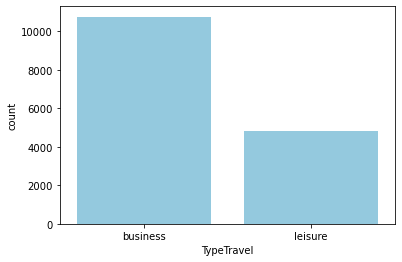

In [22]:
sns.countplot(df["TypeTravel"], color="skyblue")

#### 1.2.1.6 Room Type

In [23]:
df['RoomType'].value_counts()

single    7442
double    7021
suite     1126
Name: RoomType, dtype: int64

Variable looks good to us and we will create dummies for it

<AxesSubplot:xlabel='RoomType', ylabel='count'>

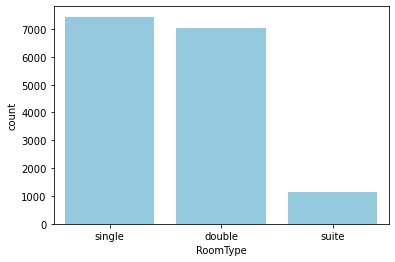

In [24]:
sns.countplot(df["RoomType"], color="skyblue")

#### 1.2.1.7 RewardPoints

In [25]:
df['RewardPoints'].value_counts()

5286    19
5010    17
5347    16
5094    16
4942    16
        ..
3656     1
2524     1
5974     1
3802     1
3304     1
Name: RewardPoints, Length: 4061, dtype: int64

Variable looks good to us, but because of the scale we will have to normalize all the variables in the dataframe

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

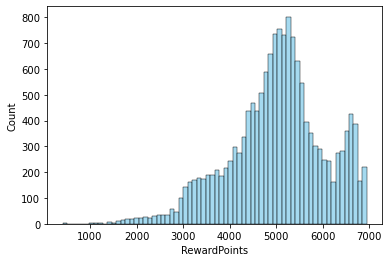

In [26]:
sns.histplot(df["RewardPoints"], color="skyblue")

#### 1.2.1.8 Ratings

All ratings variables look ok to us

<AxesSubplot:xlabel='BarService', ylabel='Count'>

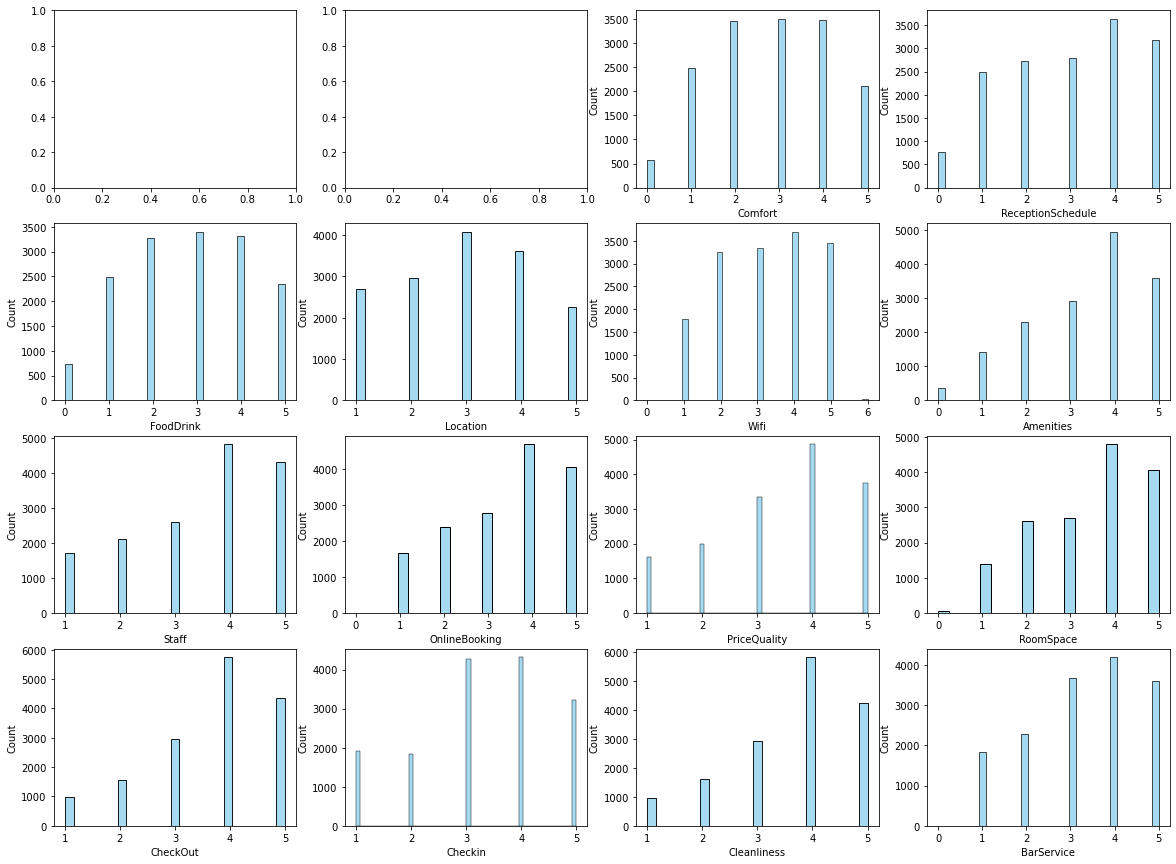

In [27]:
f, axes = plt.subplots(4,4, figsize=(20, 15), squeeze=False)  
sns.histplot(df["Comfort"], color="skyblue", ax=axes[0, 2])
sns.histplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 3])
sns.histplot(df["FoodDrink"], color="skyblue", ax=axes[1, 0])
sns.histplot(df["Location"], color="skyblue", ax=axes[1, 1])
sns.histplot(df["Wifi"], color="skyblue", ax=axes[1, 2])
sns.histplot(df["Amenities"], color="skyblue", ax=axes[1, 3])
sns.histplot(df["Staff"], color="skyblue", ax=axes[2, 0])
sns.histplot(df["OnlineBooking"], color="skyblue", ax=axes[2, 1])
sns.histplot(df["PriceQuality"], color="skyblue", ax=axes[2, 2])
sns.histplot(df["RoomSpace"], color="skyblue", ax=axes[2, 3])
sns.histplot(df["CheckOut"], color="skyblue", ax=axes[3, 0])
sns.histplot(df["Checkin"], color="skyblue", ax=axes[3, 1])
sns.histplot(df["Cleanliness"], color="skyblue", ax=axes[3, 2])
sns.histplot(df["BarService"], color="skyblue", ax=axes[3, 3])

Upon looking at the charts, we noticed that 'Wifi' has values that should not be there, in particular, some surveys were marked with 6 which is not an available rating. 

In [28]:
df['Wifi'].value_counts()

4    3704
5    3446
3    3348
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

Since there are only 36 rows with value 6, we will convert them to a 5.

In [29]:
df['Wifi'].replace(6,5, inplace=True)

In [30]:
df['Wifi'].value_counts()

4    3704
5    3482
3    3348
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

<AxesSubplot:xlabel='Wifi', ylabel='Count'>

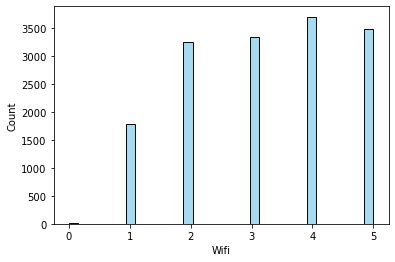

In [31]:
sns.histplot(df["Wifi"], color="skyblue")

#### 1.2.2 Outlier Observation Using Box Plot Chart

<AxesSubplot:xlabel='BarService'>

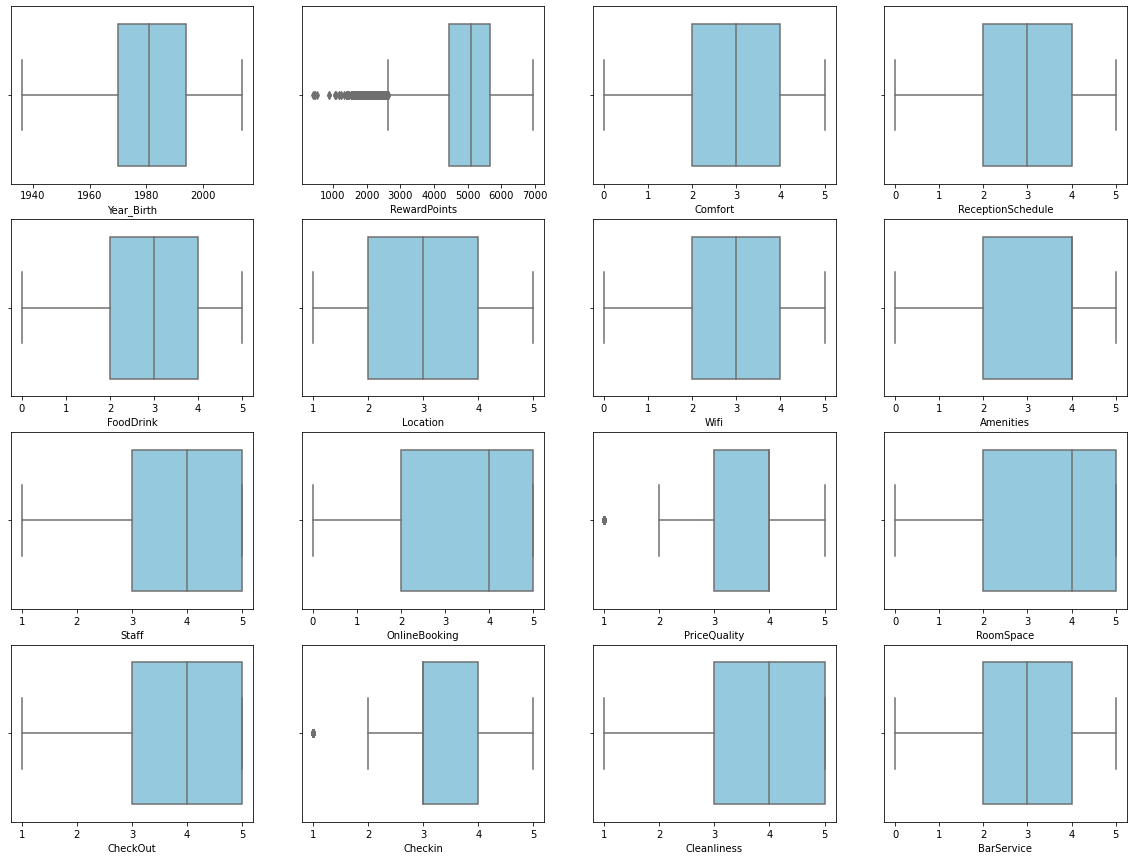

In [32]:
f, axes = plt.subplots(4,4, figsize=(20, 15), squeeze=False)    
sns.boxplot(df["Year_Birth"], color="skyblue", ax=axes[0, 0])
sns.boxplot(df["RewardPoints"], color="skyblue", ax=axes[0, 1])
sns.boxplot(df["Comfort"], color="skyblue", ax=axes[0, 2])
sns.boxplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 3])
sns.boxplot(df["FoodDrink"], color="skyblue", ax=axes[1, 0])
sns.boxplot(df["Location"], color="skyblue", ax=axes[1, 1])
sns.boxplot(df["Wifi"], color="skyblue", ax=axes[1, 2])
sns.boxplot(df["Amenities"], color="skyblue", ax=axes[1, 3])
sns.boxplot(df["Staff"], color="skyblue", ax=axes[2, 0])
sns.boxplot(df["OnlineBooking"], color="skyblue", ax=axes[2, 1])
sns.boxplot(df["PriceQuality"], color="skyblue", ax=axes[2, 2])
sns.boxplot(df["RoomSpace"], color="skyblue", ax=axes[2, 3])
sns.boxplot(df["CheckOut"], color="skyblue", ax=axes[3, 0])
sns.boxplot(df["Checkin"], color="skyblue", ax=axes[3, 1])
sns.boxplot(df["Cleanliness"], color="skyblue", ax=axes[3, 2])
sns.boxplot(df["BarService"], color="skyblue", ax=axes[3, 3])

Looking at the box plots of all variables, we noticed 3 variables with possible outliers. These are: RewardPoints, PriceQuality, Checkin. These outliers will be handled later on.

#### 1.2.3 Pairplot of all variables of the dataframe

In [33]:
#sns.pairplot(df)

#### 1.2.4 Skewness of the variables of the Dataframe

In [34]:
df.skew()

Year_Birth          -0.003847
RewardPoints        -0.453779
Comfort             -0.100907
ReceptionSchedule   -0.260705
FoodDrink           -0.123610
Location            -0.050229
Wifi                -0.183010
Amenities           -0.599498
Staff               -0.554561
OnlineBooking       -0.472074
PriceQuality        -0.503381
RoomSpace           -0.482952
CheckOut            -0.750689
Checkin             -0.382588
Cleanliness         -0.745131
BarService          -0.358297
Gender               0.048900
dtype: float64

TODO: Analyze these results

#### 1.3 Missing Values

In [35]:
df.isna().sum()

Churn                  0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
Gender                 0
dtype: int64

Year of Birth is the only variable with missing values. We have different methods to fill in these missing values like using the mode, mean or KNN Inputer. We decided to fill these missing values with the mode.

In [36]:
#df.fillna(int(df['Year_Birth'].mode()), inplace=True)
#print(int(df['Year_Birth'].mode())

import numpy as np

df_dropped = df.drop(columns=['Churn', 'RoomType', 'Longevity', 'TypeTravel'])

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer_matrix = imputer.fit_transform(df_dropped)

data_cleaned = pd.DataFrame(data=imputer_matrix, columns = df_dropped.columns, index = df_dropped.index)
df['Year_Birth'] = data_cleaned['Year_Birth']

In [37]:
df.isna().sum()

Churn                0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
Gender               0
dtype: int64

In [38]:
#converter Year_Birth para integer
df['Year_Birth'] = df['Year_Birth'].astype('int64')

Now we have no missing values

#### 1.5 Duplicate Values

In [39]:
#create duplicate datafranme
duplicates = df.duplicated()

In [40]:
#visualize the duplicates
df[duplicates]

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
8195,nochurn,yes,1995,leisure,double,5098,5,5,5,5,...,5,5,3,3,4,3,3,3,5,0
9176,churn,yes,1991,business,suite,5932,3,3,2,3,...,3,3,3,4,1,4,3,4,3,0
9417,nochurn,yes,1972,business,double,6769,5,4,4,4,...,5,4,5,5,5,5,2,5,1,0


In [41]:
df.drop_duplicates(inplace = True)
df.shape

(15586, 21)

### 1.6 Outliers

In [42]:
#method to return the boundaries of IQR 
def get_IQR_bounds(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    return (lower_bound,upper_bound)

##### 1.6.1 Removing Outliers on Reward Points

In [43]:
df['RewardPoints'].describe()

count    15586.000000
mean      5022.418581
std       1027.940126
min        409.000000
25%       4445.000000
50%       5088.000000
75%       5648.750000
max       6950.000000
Name: RewardPoints, dtype: float64

In [44]:
df = df[df['RewardPoints'] > get_IQR_bounds(df['RewardPoints'])[0]]

print("There are been",df_original_row_size - df.shape[0], "outliers removed")

There are been 293 outliers removed


<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

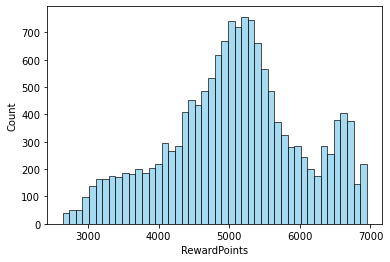

In [45]:
sns.histplot(df["RewardPoints"], color="skyblue")

##### 1.6.2 Removing Outliers on Ratings Variables

After some research and analysis on the subject, we decided not to remove outliers on the two ratings variables that presented outliers in the boxplot visualization. Those are 'PriceQuality' and 'Checkin'. The reason we did not remove them was because they were too many entries that would have to be removed, and if we did, we would effectively be shortening the rating scale for the rating data.

Instead, we will look for straight lining on the ratings entries, meaning people who answered all the answers with the same variable, which can mean they were in a rush and decided to fill the survey as fast as they could.

##### 1.6.1 Removing Outliers on Straight Lining entries to the Ratings Variables

In [46]:
df.columns

Index(['Churn', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService',
       'Gender'],
      dtype='object')

In [47]:
straight_lining_entries = df[(df['Comfort'] == df['ReceptionSchedule']) & (df['Comfort'] == df['FoodDrink']) & (df['Comfort'] == df['Location']) & (df['Comfort'] == df['Wifi']) & (df['Comfort'] == df['Amenities']) & (df['Comfort'] == df['Staff']) & (df['Comfort'] == df['OnlineBooking']) & (df['Comfort'] == df['PriceQuality']) & (df['Comfort'] == df['RoomSpace']) & (df['Comfort'] == df['CheckOut']) & (df['Comfort'] == df['Checkin']) & (df['Comfort'] == df['Cleanliness']) & (df['Comfort'] == df['BarService'])]

In [48]:
straight_lining_entries

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
1548,nochurn,yes,1981,business,single,5289,4,4,4,4,...,4,4,4,4,4,4,4,4,4,1
15259,nochurn,yes,1976,business,single,6699,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1


 #### Removing straight lines

In [49]:
df.drop(straight_lining_entries.index, axis=0, inplace=True)

We found 2 entries that are considered straight lining answers and we will remove them from the data

### 1.7 Feature Engineering

##### 1.7.1 Creating Age Variable

In [50]:
df['Age'] = date.today().year - df['Year_Birth']

In [51]:
del df['Year_Birth']

In [52]:
age_analysis_col = ['Age', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']
likert_columns = ['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']

In [53]:
df_age_analysys = df[age_analysis_col].groupby('Age').mean()
df_age_analysys.head()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
8,2.855422,3.445783,2.698795,3.168675,2.987952,3.048193,3.397590,3.349398,3.542169,3.530120,3.783133,3.361446,3.867470,3.216867
9,2.785714,3.142857,2.887755,3.000000,2.948980,2.938776,3.071429,3.051020,3.397959,3.377551,3.816327,3.285714,3.755102,3.000000
10,2.724490,3.346939,2.724490,3.061224,3.020408,2.969388,3.224490,3.142857,3.224490,3.244898,3.581633,3.204082,3.551020,3.071429
11,2.705263,3.200000,2.494737,2.768421,3.210526,2.989474,3.178947,3.284211,3.473684,3.221053,3.673684,3.305263,3.810526,3.273684
12,2.666667,3.200000,2.733333,3.038095,2.971429,2.895238,3.104762,3.038095,3.323810,3.219048,3.600000,3.276190,3.733333,3.019048


In [54]:
df_age_analysys.mean()

Comfort              2.848922
ReceptionSchedule    3.048737
FoodDrink            2.855800
Location             2.994868
Wifi                 3.205912
Amenities            3.262154
Staff                3.415234
OnlineBooking        3.380496
PriceQuality         3.360840
RoomSpace            3.434851
CheckOut             3.607079
Checkin              3.226350
Cleanliness          3.584075
BarService           3.261339
dtype: float64

In [55]:
df_age_analysys - df_age_analysys.mean()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
8,0.006500,0.397046,-0.157005,0.173807,-0.217960,-0.213961,-0.017643,-0.031098,0.181328,0.095270,0.176054,0.135096,0.283394,-0.044471
9,-0.063207,0.094120,0.031955,0.005132,-0.256932,-0.323379,-0.343805,-0.329475,0.037119,-0.057300,0.209248,0.059364,0.171027,-0.261339
10,-0.124432,0.298202,-0.131310,0.066357,-0.185503,-0.292766,-0.190744,-0.237638,-0.136350,-0.189953,-0.025446,-0.022269,-0.033055,-0.189910
11,-0.143659,0.151263,-0.361063,-0.226447,0.004615,-0.272680,-0.236286,-0.096285,0.112844,-0.213798,0.066605,0.078913,0.226451,0.012345
12,-0.182255,0.151263,-0.122466,0.043228,-0.234483,-0.366916,-0.310472,-0.342400,-0.037031,-0.215803,-0.007079,0.049840,0.149258,-0.242291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.151078,0.201263,0.831700,0.442632,0.294088,0.237846,-0.352734,-0.192996,-0.423340,-0.372351,-0.669579,-0.913850,-0.459075,-0.323839
79,0.151078,0.451263,0.477534,0.505132,-0.205912,-0.928821,-0.915234,-0.213829,-0.027507,0.231816,-0.440412,-1.226350,-0.250742,0.071995
80,0.151078,0.284597,-0.189133,0.005132,1.460755,-0.928821,-0.748567,-0.380496,-0.360840,-0.434851,-0.607079,-0.893017,-0.584075,-1.928005


In [56]:
from scipy.stats import zscore
df_age_zscore = df_age_analysys.apply(zscore)
df_age_zscore[(abs(df_age_zscore[likert_columns]) > 2).any(1)]

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
72,0.128880,-0.321485,0.782995,0.676502,-2.320477,0.849226,-0.532170,-0.692083,-1.633600,-0.703541,-2.256637,-2.974001,-0.635316,-1.360574
73,0.837878,-0.832206,-0.197729,-0.336419,-2.576620,-0.485434,-0.463941,0.184339,-0.720591,-1.520253,-1.061821,-1.824260,-0.394007,-1.393406
74,-1.807895,0.699957,2.663837,1.006289,-0.886078,-0.194642,-0.054568,-2.992692,-2.515126,-3.492314,-3.000079,-1.086839,-2.746768,-1.935132
75,-1.626323,-1.180425,0.759485,0.016926,-0.348178,-0.820963,0.303634,-0.979659,-4.085344,0.272529,-3.650590,-2.002668,-1.796615,1.684587
76,0.290278,0.483287,1.974195,1.482650,0.548321,-1.168918,0.502635,-4.441224,-2.294745,-3.213437,-2.669660,-0.013747,-2.606005,0.248191
77,5.636585,3.694639,4.286062,4.139275,0.189721,0.744839,-0.144118,1.416808,0.046808,1.841214,-1.791987,-0.337525,-0.846461,0.391830
78,1.097268,0.560669,2.346445,1.459748,1.265521,0.744839,-1.263498,-0.740013,-1.399445,-1.557603,-2.488963,-3.043382,-1.163179,-1.116386
79,1.097268,1.257107,1.347247,1.665865,-0.886078,-2.908698,-3.278383,-0.819895,-0.090930,0.969722,-1.637103,-4.084096,-0.635316,0.248191
80,1.097268,0.792815,-0.533594,0.016926,6.285917,-2.908698,-2.681380,-1.458953,-1.192837,-1.819051,-2.256637,-2.974001,-1.479897,-6.646514


In [57]:
df[df['Age'] > 72]

,Churn,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
182,churn,yes,business,single,6713,3,5,5,5,2,...,3,3,3,3,3,1,3,4,1,75
250,churn,yes,business,suite,5498,3,4,3,4,3,...,3,3,1,4,4,2,3,3,1,79
255,churn,yes,business,double,6439,1,2,2,2,4,...,4,1,1,1,1,1,1,4,0,81
403,churn,yes,business,double,6806,2,4,4,4,5,...,4,2,2,2,2,3,2,3,0,76
425,nochurn,yes,business,double,6936,4,2,2,2,4,...,2,4,4,4,4,3,4,4,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14706,nochurn,yes,business,single,4566,2,2,4,2,3,...,3,4,4,4,5,2,4,1,1,74
15109,nochurn,yes,business,double,6127,5,3,3,3,4,...,1,5,5,5,5,5,5,4,0,73
15132,nochurn,yes,business,single,3300,4,4,4,4,3,...,5,3,3,2,3,4,3,5,1,76
15494,churn,yes,business,single,5369,4,1,1,1,5,...,3,4,4,4,4,3,4,2,1,78


We thought about removing the rows with age less than 10 years old because we considered people this young to not be able to answer properly unless an adult helps them. However, because of the high number of entries, we decided not to remove them.

#### 1.7.2 Creating Rating Average

In [58]:
df

,Churn,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
0,churn,yes,business,single,4907,3,4,1,4,4,...,4,3,3,3,3,4,3,4,0,48
1,nochurn,yes,business,single,6724,1,1,1,1,5,...,4,5,5,5,5,1,5,2,1,57
2,churn,yes,business,single,4365,3,3,3,3,1,...,4,3,3,2,3,2,3,1,1,49
3,nochurn,yes,leisure,double,3849,1,1,1,1,4,...,5,4,4,4,4,4,4,3,0,29
4,nochurn,yes,business,single,5376,2,2,3,2,5,...,5,5,5,3,4,1,3,5,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,no,business,double,4968,2,0,2,2,3,...,4,3,4,5,1,3,4,3,0,34
15585,churn,no,business,double,4970,3,3,3,3,5,...,5,5,3,1,3,4,4,5,0,22
15586,nochurn,yes,business,single,4046,1,1,1,1,3,...,5,4,4,4,4,5,4,4,1,58
15587,nochurn,yes,leisure,double,5155,4,3,4,4,5,...,5,5,2,5,4,3,4,5,1,30


In [59]:
rating_features = ['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness', 'BarService']



In [60]:
rating_features

['Comfort',
 'ReceptionSchedule',
 'FoodDrink',
 'Location',
 'Wifi',
 'Amenities',
 'Staff',
 'OnlineBooking',
 'PriceQuality',
 'RoomSpace',
 'CheckOut',
 'Checkin',
 'Cleanliness',
 'BarService']

In [61]:
rating_features = ['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness', 'BarService']

df['OverallRating'] = df.apply(lambda x: round(x[rating_features].mean(), 2), axis=1)

In [62]:
# alterei aqui
df_results = df.copy()

In [63]:
df_results.shape

(15294, 22)

### 1.8 Creating Dummies and Binary variables

The following variables need dummies: RoomType  
The following variables are binary: Churn, Longevity, TypeTravel

In [64]:
#churn = 1, nochurn = 0
df['Churn'] = [1 if i == 'churn' else 0 for i in df["Churn"]]

In [65]:
#yes = 1, no = 0
df['Longevity'] = [1 if i == 'yes' else 0 for i in df["Longevity"]]

In [66]:
#business = 1, leisure = 0
df['TypeTravel'] = [1 if i == 'business' else 0 for i in df["TypeTravel"]]

In [67]:
df = pd.get_dummies(df, drop_first = True)
df

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,OverallRating,RoomType_single,RoomType_suite
0,1,1,1,4907,3,4,1,4,4,3,...,3,3,4,3,4,0,48,3.29,1,0
1,0,1,1,6724,1,1,1,1,5,3,...,5,5,1,5,2,1,57,3.14,1,0
2,1,1,1,4365,3,3,3,3,1,4,...,2,3,2,3,1,1,49,2.71,1,0
3,0,1,0,3849,1,1,1,1,4,4,...,4,4,4,4,3,0,29,3.14,0,0
4,0,1,1,5376,2,2,3,2,5,5,...,3,4,1,3,5,1,33,3.57,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,1,0,1,4968,2,0,2,2,3,2,...,5,1,3,4,3,0,34,2.71,0,0
15585,1,0,1,4970,3,3,3,3,5,3,...,1,3,4,4,5,0,22,3.57,0,0
15586,0,1,1,4046,1,1,1,1,3,4,...,4,4,5,4,4,1,58,3.21,1,0
15587,0,1,0,5155,4,3,4,4,5,4,...,5,4,3,4,5,1,30,4.07,0,0


### 1.9 Normalizing variables

Because the variable 'RewardPoints' is in a scale that is very different from the rest, we decided to normalize the dataframe

In [68]:
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns = df.columns)
#df_normalized_without_ratings = pd.DataFrame(scaler.fit_transform(df.drop(columns=rating_features)), columns = df.drop(columns=rating_features).columns)


In [69]:
df_normalized

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,OverallRating,RoomType_single,RoomType_suite
0,1.0,1.0,1.0,0.525986,0.6,0.8,0.2,0.75,0.8,0.6,...,0.6,0.50,0.75,0.50,0.8,0.0,0.512821,0.567282,1.0,0.0
1,0.0,1.0,1.0,0.947564,0.2,0.2,0.2,0.00,1.0,0.6,...,1.0,1.00,0.00,1.00,0.4,1.0,0.628205,0.527704,1.0,0.0
2,1.0,1.0,1.0,0.400232,0.6,0.6,0.6,0.50,0.2,0.8,...,0.4,0.50,0.25,0.50,0.2,1.0,0.525641,0.414248,1.0,0.0
3,0.0,1.0,0.0,0.280510,0.2,0.2,0.2,0.00,0.8,0.8,...,0.8,0.75,0.75,0.75,0.6,0.0,0.269231,0.527704,0.0,0.0
4,0.0,1.0,1.0,0.634803,0.4,0.4,0.6,0.25,1.0,1.0,...,0.6,0.75,0.00,0.50,1.0,1.0,0.320513,0.641161,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,1.0,0.0,1.0,0.540139,0.4,0.0,0.4,0.25,0.6,0.4,...,1.0,0.00,0.50,0.75,0.6,0.0,0.333333,0.414248,0.0,0.0
15585,1.0,0.0,1.0,0.540603,0.6,0.6,0.6,0.50,1.0,0.6,...,0.2,0.50,0.75,0.75,1.0,0.0,0.179487,0.641161,0.0,0.0
15586,0.0,1.0,1.0,0.326218,0.2,0.2,0.2,0.00,0.6,0.8,...,0.8,0.75,1.00,0.75,0.8,1.0,0.641026,0.546174,1.0,0.0
15587,0.0,1.0,0.0,0.583527,0.8,0.6,0.8,0.75,1.0,0.8,...,1.0,0.75,0.50,0.75,1.0,1.0,0.282051,0.773087,0.0,0.0


In [70]:
#df_normalized_without_ratings.describe()

#### 1.10 Correlation Matrix

<AxesSubplot:>

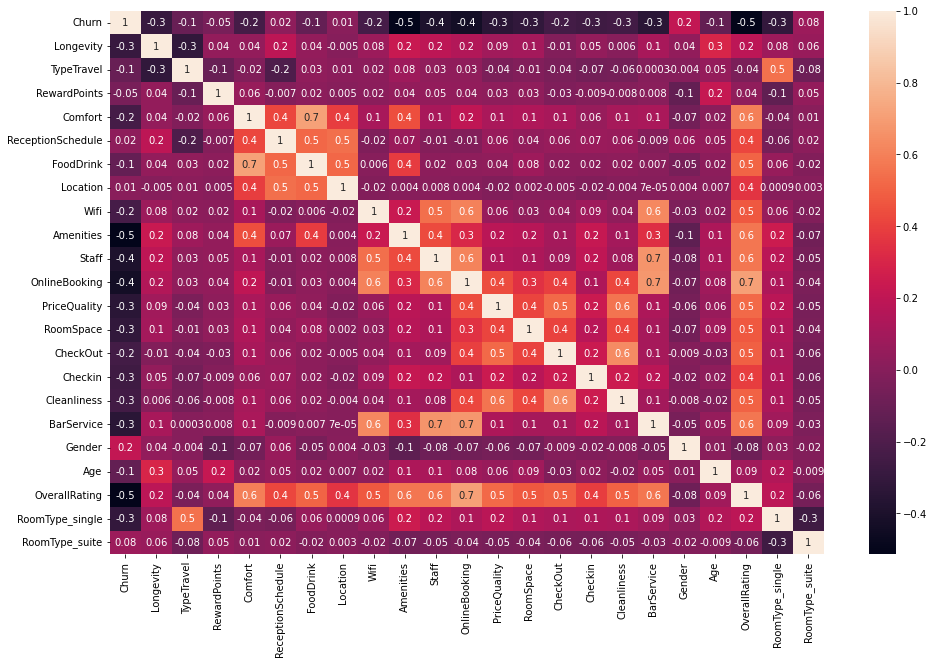

In [71]:
df_corr = df.corr(method = 'pearson')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

### CLUSTERING

In [72]:
all_variables = ['Churn', 'Longevity', 'TypeTravel', 'RewardPoints', 'Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities','Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut','Checkin', 'Cleanliness', 'BarService', 'Gender', 'Age','OverallRating', 'RoomType_single', 'RoomType_suite']
client_variables = ['Longevity', 'TypeTravel', 'RewardPoints', 'RoomType_single', 'RoomType_suite', 'Gender', 'Age']
business_variables = ['Churn','Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities','Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut','Checkin', 'Cleanliness', 'BarService']
short_business_variables = ['Churn', 'OverallRating']

In [73]:
client_df = df[client_variables]
business_df = df[business_variables]
short_business_df = df[short_business_variables]

#### KMeans + Hierarchical - Client

In [74]:
scaler = MinMaxScaler()
client_df_scaled = scaler.fit_transform(client_df)
client_df_scaled = pd.DataFrame(client_df_scaled, index= df.index, columns = client_variables)

In [75]:
#kmeans starting with 23 variables
kmeans = KMeans(n_clusters=23, random_state=0, n_init = 5, max_iter = 200).fit(client_df)

In [76]:
clusters = kmeans.cluster_centers_

In [77]:
# save the centroids inverting the normalization
clusters = pd.DataFrame(scaler.inverse_transform(X = clusters),columns = client_variables)

In [78]:
#Getting the Silhoutte score
silhouette_avg = silhouette_score(client_df, kmeans.labels_)
sample_silhouette_values = silhouette_samples(client_df, kmeans.labels_)

In [79]:
del silhouette_avg, sample_silhouette_values#, cluster_labels

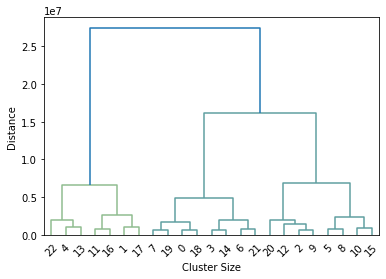

In [80]:
#Checking the Dendrogram
Z = linkage(clusters, method = "ward")

hierarchy.set_link_color_palette(['darkseagreen','cadetblue', 'seagreen', 'mediumseagreen', 'c','mediumturquoise','turquoise'])

#fig = plt.figure(figsize=(10, 20))
#ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
#Z = hierarchy.linkage(clusters, method='ward')

dendrogram(Z,
          truncate_mode="lastp",
          p=40,
          orientation ="top" ,
          leaf_rotation=45.,
          leaf_font_size=10.,
          show_contracted=True,
          show_leaf_counts=True)

#cur_axes = plt.gca()
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

4301.847228340333


<Figure size 360x360 with 0 Axes>

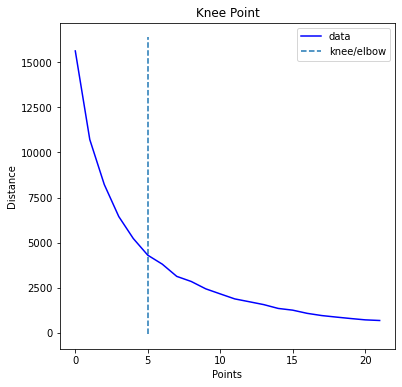

In [81]:

distortions = []
K = range(1,23)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(client_df_scaled)
    distortions.append(kmeanModel.inertia_)

from kneed import KneeLocator

i = np.arange(len(distortions))
knee = KneeLocator(i, distortions, S=1, curve='convex', direction='decreasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distortions[knee.knee])

In [82]:
#Running K-Means with 5 clusters observed on the Dendrogram
kmeans = KMeans(n_clusters=5, random_state=0, n_init = 5, max_iter = 200).fit(client_df_scaled)

In [83]:
clusters = kmeans.cluster_centers_

In [84]:
# save the centroids inverting the normalization
clusters = pd.DataFrame(scaler.inverse_transform(X = clusters),columns = client_variables)

In [85]:
#Getting the Silhoutte score
silhouette_avg = silhouette_score(client_df, kmeans.labels_)
sample_silhouette_values = silhouette_samples(client_df, kmeans.labels_)

In [86]:
cluster_labels = pd.DataFrame(kmeans.labels_ , index= df.index)
cluster_labels.columns=['Labels']

In [87]:
client_df = pd.concat([client_df, cluster_labels], axis = 1)

In [88]:
client_df['Labels'].value_counts()

2    3604
3    3282
1    3092
4    2975
0    2341
Name: Labels, dtype: int64

In [89]:
del silhouette_avg, sample_silhouette_values, cluster_labels

In [90]:
#Hclustering = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
#HC = Hclustering.fit(clusters)

In [91]:
#labels = pd.DataFrame(HC.labels_)
#labels.columns =  ['Value']

In [92]:
#clusters = pd.concat([clusters, labels], axis = 1)
#clusters['Label']=[i for i in range(0,3)]

In [93]:
#j=0
#for i in range(0, len(clusters['Value'])):
#    client_df['Labels']=client_df['Labels'].replace(clusters['Label'][i], clusters['Value'][j])
#    j+=1

In [94]:
df = pd.concat([df, client_df['Labels']], axis=1)
df.rename(columns={"Labels": "Client"}, inplace=True)

KeyError: 'Client'

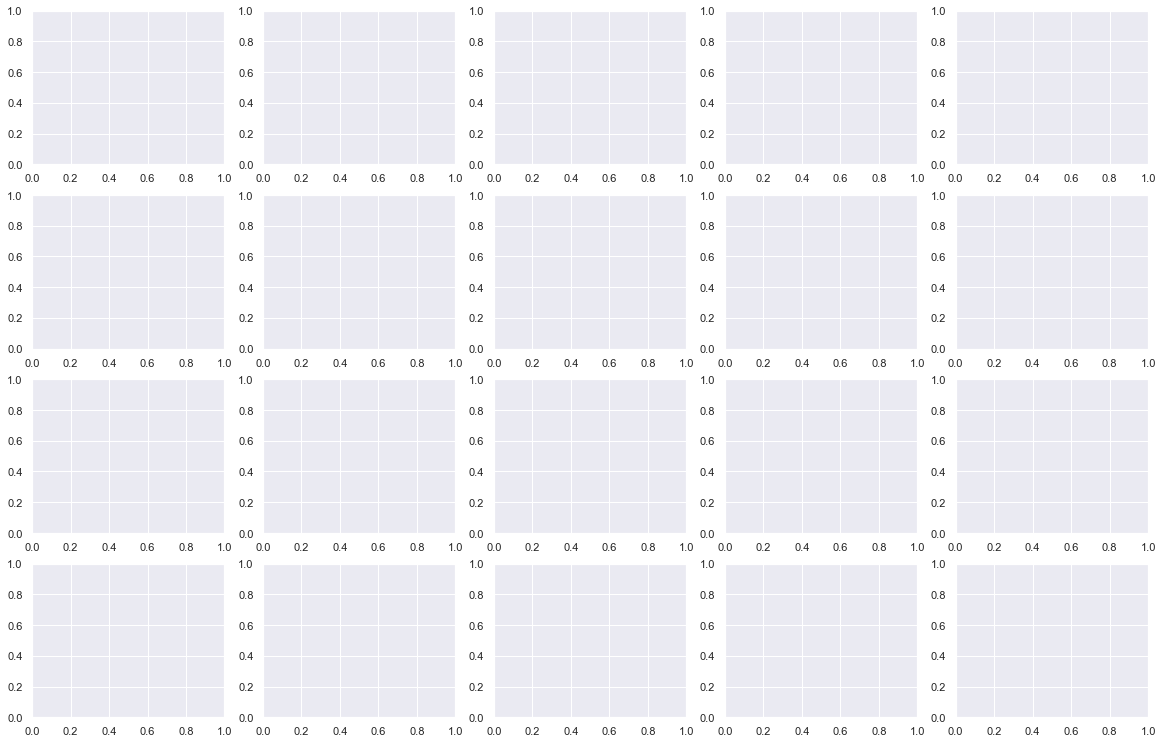

In [224]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20,13))

# cluster 1
axs[0, 0].hist(df['Longevity'].loc[df['Client']==0], color='darkseagreen')
axs[0, 0].set_title('Longevity for Cluster 1')
axs[0, 1].hist(df['TypeTravel'].loc[df['Client']==0], color='cadetblue' )
axs[0, 1].set_title('TypeTravel for Cluster 1')
axs[0, 2].hist(df['RewardPoints'].loc[df['Client']==0], color='tan')
axs[0, 2].set_title('RewardPoints for Cluster 1')
axs[0, 3].hist(df['Gender'].loc[df['Client']==0], color='dimgrey')
axs[0, 3].set_title('Gender for Cluster 1')
axs[0, 4].hist(df['Gender'].loc[df['Client']==0], color='orange')
axs[0, 4].set_title('Gender for Cluster 1')
plt.sca(axs[0, 4])
plt.xticks([0, 1])
axs[0, 4].hist(df['Age'].loc[df['Client']==0], color='rosybrown')
axs[0, 4].set_title('Age for Cluster 1')

# cluster 2
axs[1, 0].hist(df['Longevity'].loc[df['Client']==1], color='darkseagreen')
axs[1, 0].set_title('Longevity for Cluster 2')
axs[1, 1].hist(df['TypeTravel'].loc[df['Client']==1], color='cadetblue' )
axs[1, 1].set_title('TypeTravel for Cluster 2')
axs[1, 2].hist(df['RewardPoints'].loc[df['Client']==1], color='tan')
axs[1, 2].set_title('RewardPoints for Cluster 2')
axs[1, 3].hist(df['Gender'].loc[df['Client']==1], color='dimgrey')
axs[1, 3].set_title('Gender for Cluster 2')
axs[1, 4].hist(df['Gender'].loc[df['Client']==1], color='orange')
axs[1, 4].set_title('Gender for Cluster 2')
plt.sca(axs[1, 4])
plt.xticks([0, 1])
axs[1, 4].hist(df['Age'].loc[df['Client']==1], color='rosybrown')
axs[1, 4].set_title('Age for Cluster 2')

# cluster 3
axs[2, 0].hist(df['Longevity'].loc[df['Client']==2], color='darkseagreen')
axs[2, 0].set_title('Longevity for Cluster 3')
axs[2, 1].hist(df['TypeTravel'].loc[df['Client']==2], color='cadetblue' )
axs[2, 1].set_title('TypeTravel for Cluster 3')
axs[2, 2].hist(df['RewardPoints'].loc[df['Client']==2], color='tan')
axs[2, 2].set_title('RewardPoints for Cluster 3')
axs[2, 3].hist(df['Gender'].loc[df['Client']==2], color='dimgrey')
axs[2, 3].set_title('Gender for Cluster 3')
axs[2, 4].hist(df['Gender'].loc[df['Client']==2], color='orange')
axs[2, 4].set_title('Gender for Cluster 3')
plt.sca(axs[2, 4])
plt.xticks([0, 1])
axs[2, 4].hist(df['Age'].loc[df['Client']==2], color='rosybrown')
axs[2, 4].set_title('Age for Cluster 3')

# cluster 4
axs[3, 0].hist(df['Longevity'].loc[df['Client']==3], color='darkseagreen')
axs[3, 0].set_title('Longevity for Cluster 4')
axs[3, 1].hist(df['TypeTravel'].loc[df['Client']==3], color='cadetblue' )
axs[3, 1].set_title('TypeTravel for Cluster 4')
axs[3, 2].hist(df['RewardPoints'].loc[df['Client']==3], color='tan')
axs[3, 2].set_title('RewardPoints for Cluster 4')
axs[3, 3].hist(df['Gender'].loc[df['Client']==3], color='dimgrey')
axs[3, 3].set_title('Gender for Cluster 4')
axs[3, 4].hist(df['Gender'].loc[df['Client']==3], color='orange')
axs[3, 4].set_title('Gender for Cluster 4')
plt.sca(axs[3, 4])
plt.xticks([0, 1])
axs[3, 4].hist(df['Age'].loc[df['Client']==3], color='rosybrown')
axs[3, 4].set_title('Age for Cluster 4')


plt.subplots_adjust(hspace=0.5)                                          
plt.show()

In [96]:
#Number of observations in each cluster
df['Client'].value_counts()

2    3604
3    3282
1    3092
4    2975
0    2341
Name: Client, dtype: int64

#### KMeans + Hierarchical - Business

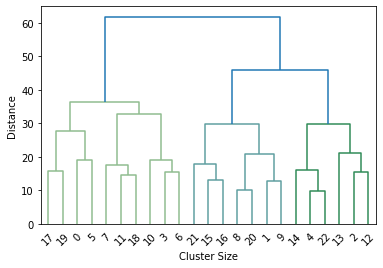

In [97]:
scaler = MinMaxScaler()
business_df_scaled = scaler.fit_transform(business_df)
business_df_scaled = pd.DataFrame(business_df_scaled, index= df.index, columns = business_variables)

#kmeans starting with 23 variables
kmeans = KMeans(n_clusters=23, random_state=0, n_init = 5, max_iter = 200).fit(business_df)

clusters = kmeans.cluster_centers_

# save the centroids inverting the normalization
clusters = pd.DataFrame(scaler.inverse_transform(X = clusters),columns = business_variables)

#Getting the Silhoutte score
silhouette_avg = silhouette_score(business_df, kmeans.labels_)
sample_silhouette_values = silhouette_samples(business_df, kmeans.labels_)

del silhouette_avg, sample_silhouette_values#, cluster_labels

#Checking the Dendrogram
Z = linkage(clusters, method = "ward")

hierarchy.set_link_color_palette(['darkseagreen','cadetblue', 'seagreen', 'mediumseagreen', 'c','mediumturquoise','turquoise'])

#fig = plt.figure(figsize=(10, 20))
#ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
#Z = hierarchy.linkage(clusters, method='ward')

dendrogram(Z,
          truncate_mode="lastp",
          p=40,
          orientation ="top" ,
          leaf_rotation=45.,
          leaf_font_size=10.,
          show_contracted=True,
          show_leaf_counts=True)

#cur_axes = plt.gca()
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

12529.411135707716


<Figure size 360x360 with 0 Axes>

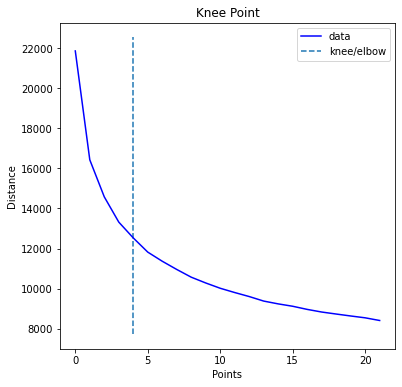

In [98]:

distortions = []
K = range(1,23)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(business_df_scaled)
    distortions.append(kmeanModel.inertia_)

from kneed import KneeLocator

i = np.arange(len(distortions))
knee = KneeLocator(i, distortions, S=1, curve='convex', direction='decreasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distortions[knee.knee])

In [99]:
#Running K-Means with 4 clusters observed on the Dendrogram
kmeans = KMeans(n_clusters=4, random_state=0, n_init = 5, max_iter = 200).fit(business_df_scaled)

In [100]:
clusters = kmeans.cluster_centers_

In [101]:
# save the centroids inverting the normalization
clusters = pd.DataFrame(scaler.inverse_transform(X = clusters),columns = business_df.columns)

In [102]:
silhouette_avg = silhouette_score(business_df_scaled, kmeans.labels_)
sample_silhouette_values = silhouette_samples(business_df_scaled, kmeans.labels_)

In [103]:
cluster_labels = pd.DataFrame(kmeans.labels_ , index=df.index)
cluster_labels.columns=['Labels']

In [104]:
business_df = pd.concat([business_df, cluster_labels], axis = 1)

In [105]:
del silhouette_avg, sample_silhouette_values, cluster_labels

In [106]:
#Hclustering = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
#HC = Hclustering.fit(clusters)

In [107]:
#labels = pd.DataFrame(HC.labels_)
#labels.columns =  ['Business']

In [108]:
#clusters = pd.concat([clusters, labels], axis = 1)
#clusters['Label']=[i for i in range(0,3)]

In [109]:
#j=0
#for i in range(0, len(clusters['Business'])):
#    business_df['Labels']=business_df['Labels'].replace(clusters['Label'][i], clusters['Business'][j])
#    j+=1

In [110]:
df = pd.concat([df, business_df['Labels']], axis=1)
df.rename(columns={"Labels": "Business"}, inplace=True)

In [111]:
business_df.columns

Index(['Churn', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService',
       'Labels'],
      dtype='object')

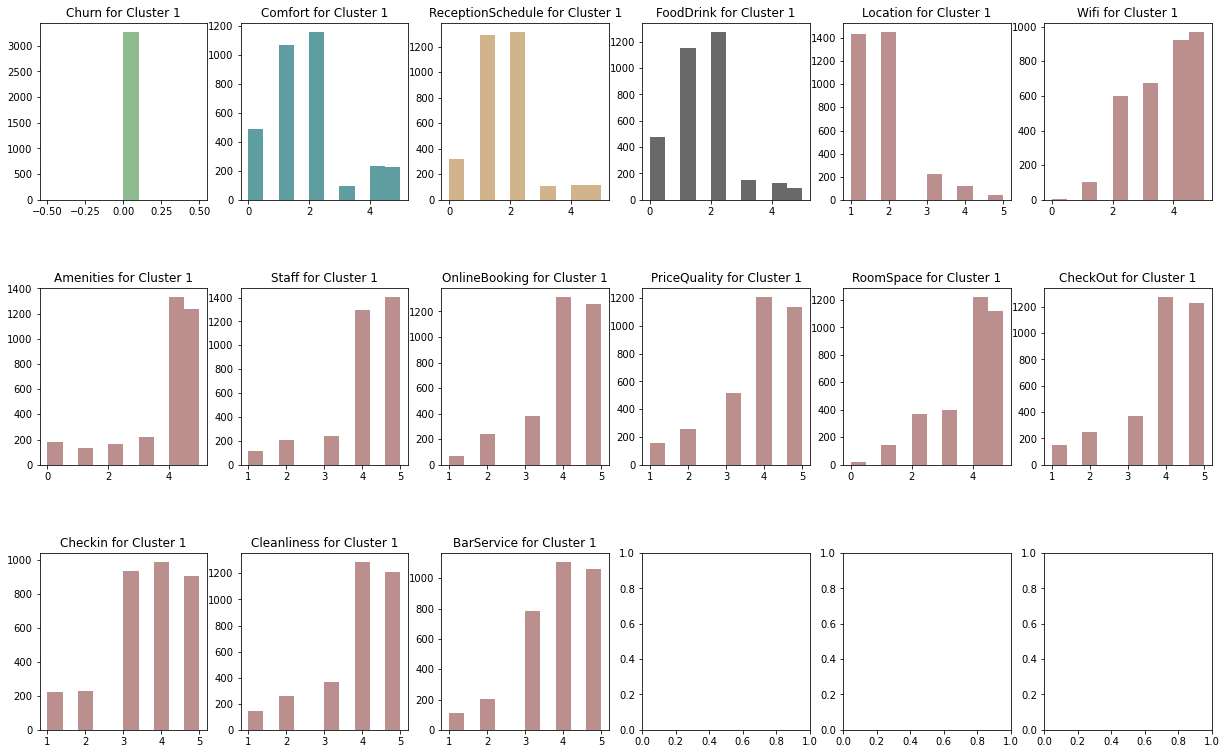

In [112]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(21,13))

# cluster 1
axs[0, 0].hist(df['Churn'].loc[df['Business']==0], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 1')
axs[0, 1].hist(df['Comfort'].loc[df['Business']==0], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 1')
axs[0, 2].hist(df['ReceptionSchedule'].loc[df['Business']==0], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 1')
axs[0, 3].hist(df['FoodDrink'].loc[df['Business']==0], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 1')
axs[0, 4].hist(df['Location'].loc[df['Business']==0], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 1')
axs[0, 5].hist(df['Wifi'].loc[df['Business']==0], color='rosybrown')
axs[0, 5].set_title('Wifi for Cluster 1')
axs[1, 0].hist(df['Amenities'].loc[df['Business']==0], color='rosybrown')
axs[1, 0].set_title('Amenities for Cluster 1')
axs[1, 1].hist(df['Staff'].loc[df['Business']==0], color='rosybrown')
axs[1, 1].set_title('Staff for Cluster 1')
axs[1, 2].hist(df['OnlineBooking'].loc[df['Business']==0], color='rosybrown')
axs[1, 2].set_title('OnlineBooking for Cluster 1')
axs[1, 3].hist(df['PriceQuality'].loc[df['Business']==0], color='rosybrown')
axs[1, 3].set_title('PriceQuality for Cluster 1')
axs[1, 4].hist(df['RoomSpace'].loc[df['Business']==0], color='rosybrown')
axs[1, 4].set_title('RoomSpace for Cluster 1')
axs[1, 5].hist(df['CheckOut'].loc[df['Business']==0], color='rosybrown')
axs[1, 5].set_title('CheckOut for Cluster 1')
axs[2, 0].hist(df['Checkin'].loc[df['Business']==0], color='rosybrown')
axs[2, 0].set_title('Checkin for Cluster 1')
axs[2, 1].hist(df['Cleanliness'].loc[df['Business']==0], color='rosybrown')
axs[2, 1].set_title('Cleanliness for Cluster 1')
axs[2, 2].hist(df['BarService'].loc[df['Business']==0], color='rosybrown')
axs[2, 2].set_title('BarService for Cluster 1')


plt.subplots_adjust(hspace=0.5)
plt.show()

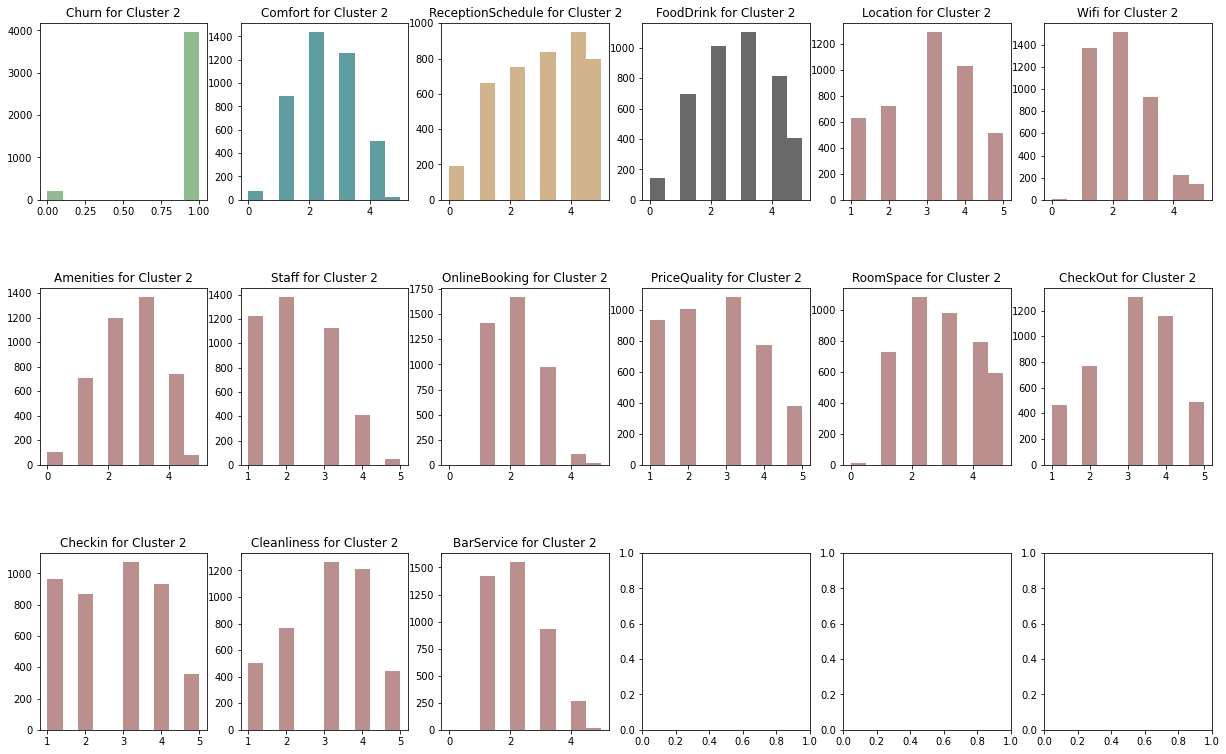

In [113]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(21,13))

# cluster 2
axs[0, 0].hist(df['Churn'].loc[df['Business']==1], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 2')
axs[0, 1].hist(df['Comfort'].loc[df['Business']==1], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 2')
axs[0, 2].hist(df['ReceptionSchedule'].loc[df['Business']==1], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 2')
axs[0, 3].hist(df['FoodDrink'].loc[df['Business']==1], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 2')
axs[0, 4].hist(df['Location'].loc[df['Business']==1], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 2')
axs[0, 5].hist(df['Wifi'].loc[df['Business']==1], color='rosybrown')
axs[0, 5].set_title('Wifi for Cluster 2')
axs[1, 0].hist(df['Amenities'].loc[df['Business']==1], color='rosybrown')
axs[1, 0].set_title('Amenities for Cluster 2')
axs[1, 1].hist(df['Staff'].loc[df['Business']==1], color='rosybrown')
axs[1, 1].set_title('Staff for Cluster 2')
axs[1, 2].hist(df['OnlineBooking'].loc[df['Business']==1], color='rosybrown')
axs[1, 2].set_title('OnlineBooking for Cluster 2')
axs[1, 3].hist(df['PriceQuality'].loc[df['Business']==1], color='rosybrown')
axs[1, 3].set_title('PriceQuality for Cluster 2')
axs[1, 4].hist(df['RoomSpace'].loc[df['Business']==1], color='rosybrown')
axs[1, 4].set_title('RoomSpace for Cluster 2')
axs[1, 5].hist(df['CheckOut'].loc[df['Business']==1], color='rosybrown')
axs[1, 5].set_title('CheckOut for Cluster 2')
axs[2, 0].hist(df['Checkin'].loc[df['Business']==1], color='rosybrown')
axs[2, 0].set_title('Checkin for Cluster 2')
axs[2, 1].hist(df['Cleanliness'].loc[df['Business']==1], color='rosybrown')
axs[2, 1].set_title('Cleanliness for Cluster 2')
axs[2, 2].hist(df['BarService'].loc[df['Business']==1], color='rosybrown')
axs[2, 2].set_title('BarService for Cluster 2')


plt.subplots_adjust(hspace=0.5)
plt.show()

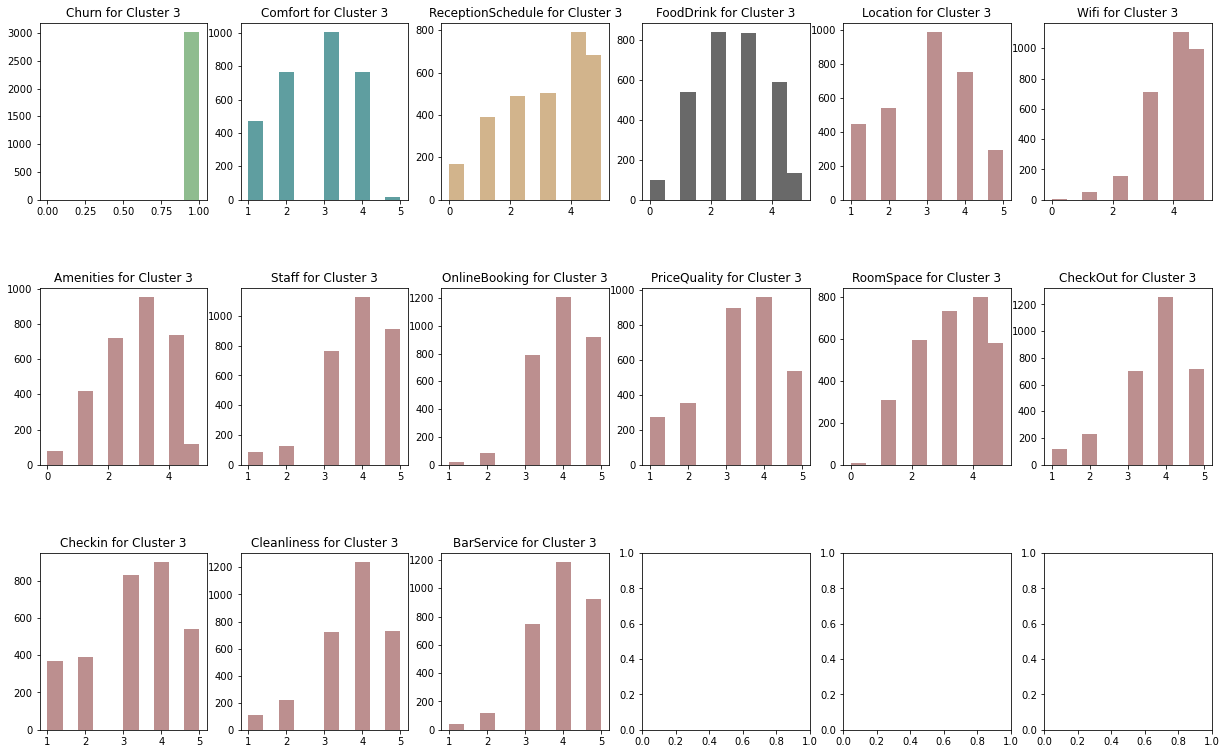

In [114]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(21,13))


# cluster 3
axs[0, 0].hist(df['Churn'].loc[df['Business']==2], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 3')
axs[0, 1].hist(df['Comfort'].loc[df['Business']==2], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 3')
axs[0, 2].hist(df['ReceptionSchedule'].loc[df['Business']==2], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 3')
axs[0, 3].hist(df['FoodDrink'].loc[df['Business']==2], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 3')
axs[0, 4].hist(df['Location'].loc[df['Business']==2], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 3')
axs[0, 5].hist(df['Wifi'].loc[df['Business']==2], color='rosybrown')
axs[0, 5].set_title('Wifi for Cluster 3')
axs[1, 0].hist(df['Amenities'].loc[df['Business']==2], color='rosybrown')
axs[1, 0].set_title('Amenities for Cluster 3')
axs[1, 1].hist(df['Staff'].loc[df['Business']==2], color='rosybrown')
axs[1, 1].set_title('Staff for Cluster 3')
axs[1, 2].hist(df['OnlineBooking'].loc[df['Business']==2], color='rosybrown')
axs[1, 2].set_title('OnlineBooking for Cluster 3')
axs[1, 3].hist(df['PriceQuality'].loc[df['Business']==2], color='rosybrown')
axs[1, 3].set_title('PriceQuality for Cluster 3')
axs[1, 4].hist(df['RoomSpace'].loc[df['Business']==2], color='rosybrown')
axs[1, 4].set_title('RoomSpace for Cluster 3')
axs[1, 5].hist(df['CheckOut'].loc[df['Business']==2], color='rosybrown')
axs[1, 5].set_title('CheckOut for Cluster 3')
axs[2, 0].hist(df['Checkin'].loc[df['Business']==2], color='rosybrown')
axs[2, 0].set_title('Checkin for Cluster 3')
axs[2, 1].hist(df['Cleanliness'].loc[df['Business']==2], color='rosybrown')
axs[2, 1].set_title('Cleanliness for Cluster 3')
axs[2, 2].hist(df['BarService'].loc[df['Business']==2], color='rosybrown')
axs[2, 2].set_title('BarService for Cluster 3')

plt.subplots_adjust(hspace=0.5)
plt.show()

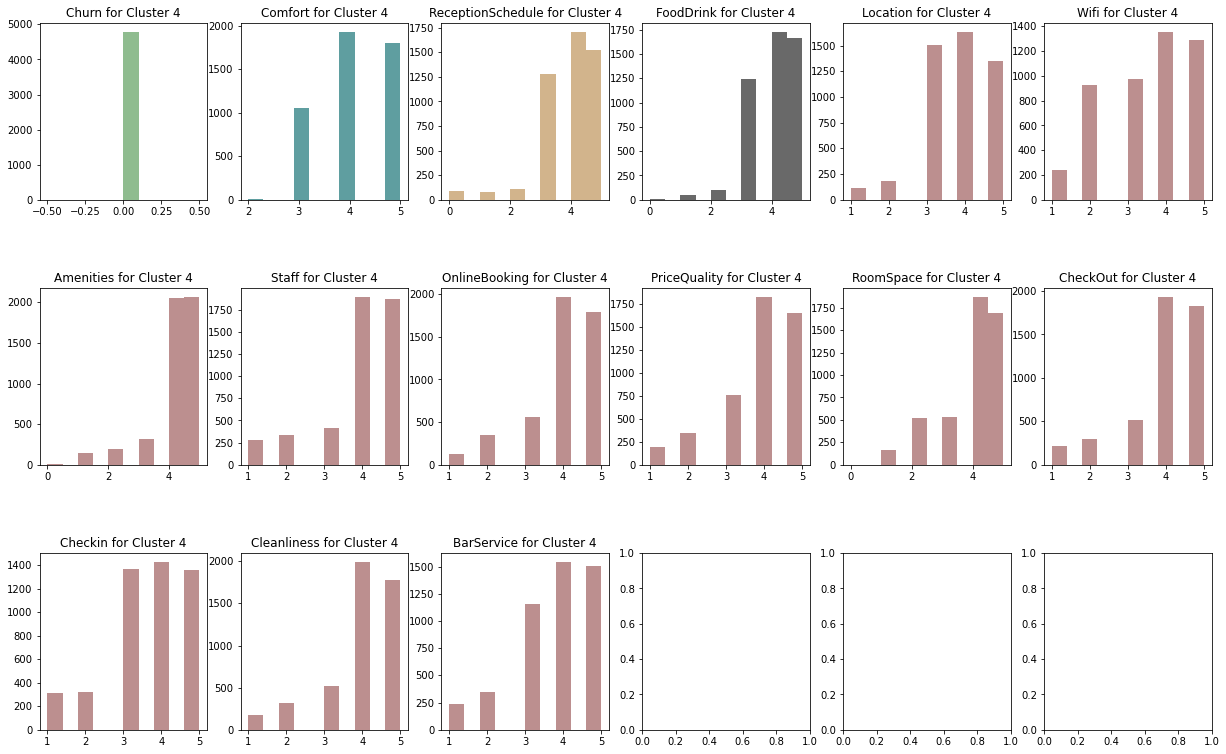

In [115]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(21,13))

# cluster 4
axs[0, 0].hist(df['Churn'].loc[df['Business']==3], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 4')
axs[0, 1].hist(df['Comfort'].loc[df['Business']==3], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 4')
axs[0, 2].hist(df['ReceptionSchedule'].loc[df['Business']==3], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 4')
axs[0, 3].hist(df['FoodDrink'].loc[df['Business']==3], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 4')
axs[0, 4].hist(df['Location'].loc[df['Business']==3], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 4')
axs[0, 5].hist(df['Wifi'].loc[df['Business']==3], color='rosybrown')
axs[0, 5].set_title('Wifi for Cluster 4')
axs[1, 0].hist(df['Amenities'].loc[df['Business']==3], color='rosybrown')
axs[1, 0].set_title('Amenities for Cluster 4')
axs[1, 1].hist(df['Staff'].loc[df['Business']==3], color='rosybrown')
axs[1, 1].set_title('Staff for Cluster 4')
axs[1, 2].hist(df['OnlineBooking'].loc[df['Business']==3], color='rosybrown')
axs[1, 2].set_title('OnlineBooking for Cluster 4')
axs[1, 3].hist(df['PriceQuality'].loc[df['Business']==3], color='rosybrown')
axs[1, 3].set_title('PriceQuality for Cluster 4')
axs[1, 4].hist(df['RoomSpace'].loc[df['Business']==3], color='rosybrown')
axs[1, 4].set_title('RoomSpace for Cluster 4')
axs[1, 5].hist(df['CheckOut'].loc[df['Business']==3], color='rosybrown')
axs[1, 5].set_title('CheckOut for Cluster 4')
axs[2, 0].hist(df['Checkin'].loc[df['Business']==3], color='rosybrown')
axs[2, 0].set_title('Checkin for Cluster 4')
axs[2, 1].hist(df['Cleanliness'].loc[df['Business']==3], color='rosybrown')
axs[2, 1].set_title('Cleanliness for Cluster 4')
axs[2, 2].hist(df['BarService'].loc[df['Business']==3], color='rosybrown')
axs[2, 2].set_title('BarService for Cluster 4')

plt.subplots_adjust(hspace=0.5)
plt.show()

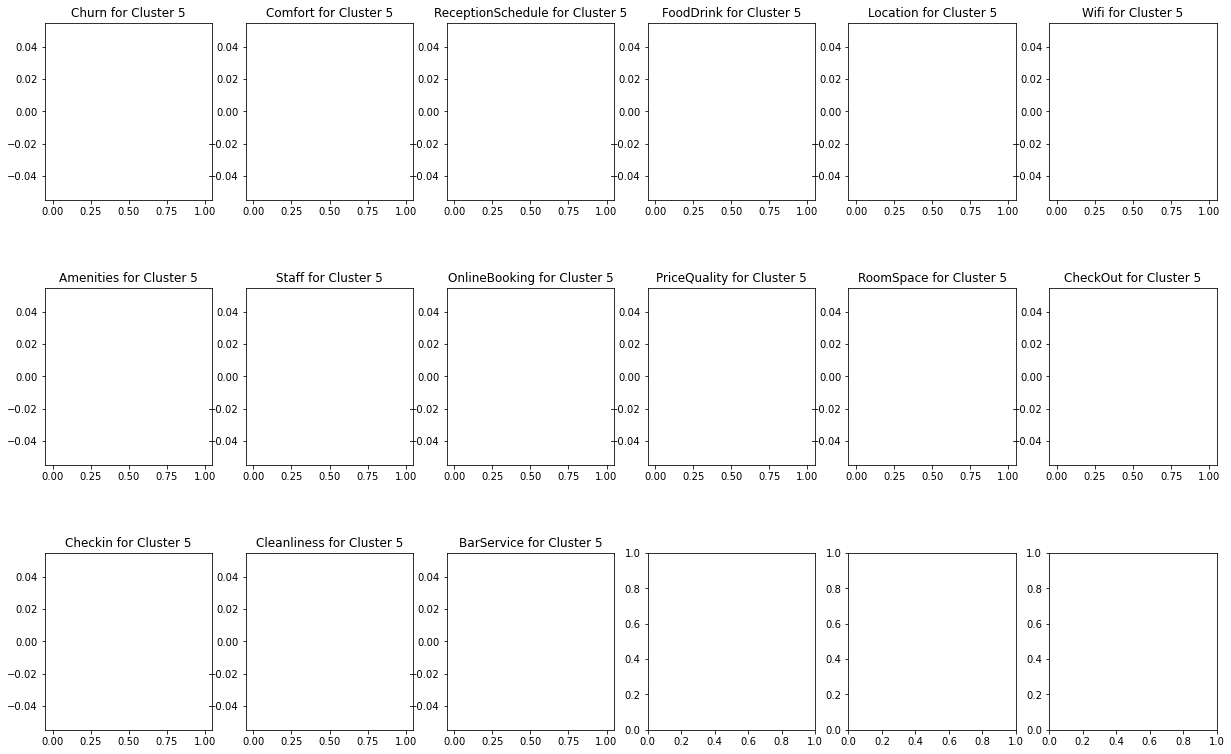

In [116]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(21,13))

# cluster 5
axs[0, 0].hist(df['Churn'].loc[df['Business']==4], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 5')
axs[0, 1].hist(df['Comfort'].loc[df['Business']==4], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 5')
axs[0, 2].hist(df['ReceptionSchedule'].loc[df['Business']==4], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 5')
axs[0, 3].hist(df['FoodDrink'].loc[df['Business']==4], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 5')
axs[0, 4].hist(df['Location'].loc[df['Business']==4], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 5')
axs[0, 5].hist(df['Wifi'].loc[df['Business']==4], color='rosybrown')
axs[0, 5].set_title('Wifi for Cluster 5')
axs[1, 0].hist(df['Amenities'].loc[df['Business']==4], color='rosybrown')
axs[1, 0].set_title('Amenities for Cluster 5')
axs[1, 1].hist(df['Staff'].loc[df['Business']==4], color='rosybrown')
axs[1, 1].set_title('Staff for Cluster 5')
axs[1, 2].hist(df['OnlineBooking'].loc[df['Business']==4], color='rosybrown')
axs[1, 2].set_title('OnlineBooking for Cluster 5')
axs[1, 3].hist(df['PriceQuality'].loc[df['Business']==4], color='rosybrown')
axs[1, 3].set_title('PriceQuality for Cluster 5')
axs[1, 4].hist(df['RoomSpace'].loc[df['Business']==4], color='rosybrown')
axs[1, 4].set_title('RoomSpace for Cluster 5')
axs[1, 5].hist(df['CheckOut'].loc[df['Business']==4], color='rosybrown')
axs[1, 5].set_title('CheckOut for Cluster 5')
axs[2, 0].hist(df['Checkin'].loc[df['Business']==4], color='rosybrown')
axs[2, 0].set_title('Checkin for Cluster 5')
axs[2, 1].hist(df['Cleanliness'].loc[df['Business']==4], color='rosybrown')
axs[2, 1].set_title('Cleanliness for Cluster 5')
axs[2, 2].hist(df['BarService'].loc[df['Business']==4], color='rosybrown')
axs[2, 2].set_title('BarService for Cluster 5')

plt.subplots_adjust(hspace=0.5)
plt.show()

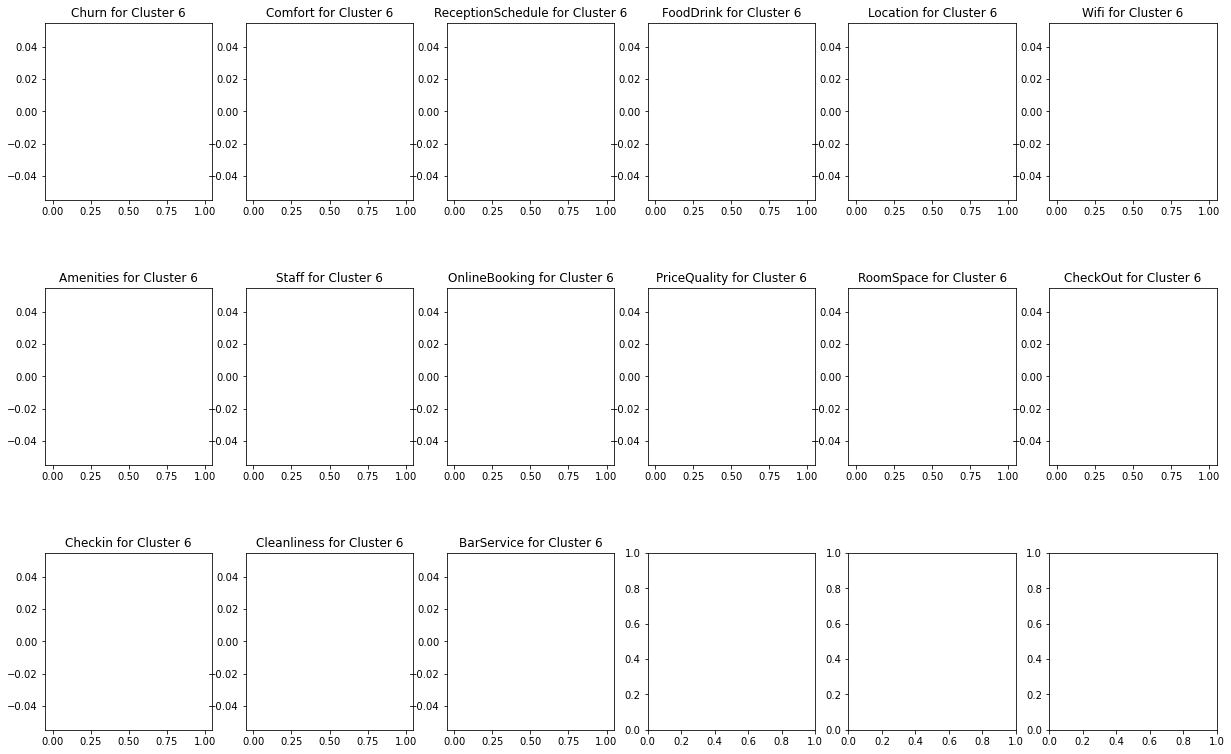

In [117]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(21,13))

# cluster 6
axs[0, 0].hist(df['Churn'].loc[df['Business']==5], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 6')
axs[0, 1].hist(df['Comfort'].loc[df['Business']==5], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 6')
axs[0, 2].hist(df['ReceptionSchedule'].loc[df['Business']==5], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 6')
axs[0, 3].hist(df['FoodDrink'].loc[df['Business']==5], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 6')
axs[0, 4].hist(df['Location'].loc[df['Business']==5], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 6')
axs[0, 5].hist(df['Wifi'].loc[df['Business']==5], color='rosybrown')
axs[0, 5].set_title('Wifi for Cluster 6')
axs[1, 0].hist(df['Amenities'].loc[df['Business']==5], color='rosybrown')
axs[1, 0].set_title('Amenities for Cluster 6')
axs[1, 1].hist(df['Staff'].loc[df['Business']==5], color='rosybrown')
axs[1, 1].set_title('Staff for Cluster 6')
axs[1, 2].hist(df['OnlineBooking'].loc[df['Business']==5], color='rosybrown')
axs[1, 2].set_title('OnlineBooking for Cluster 6')
axs[1, 3].hist(df['PriceQuality'].loc[df['Business']==5], color='rosybrown')
axs[1, 3].set_title('PriceQuality for Cluster 6')
axs[1, 4].hist(df['RoomSpace'].loc[df['Business']==5], color='rosybrown')
axs[1, 4].set_title('RoomSpace for Cluster 6')
axs[1, 5].hist(df['CheckOut'].loc[df['Business']==5], color='rosybrown')
axs[1, 5].set_title('CheckOut for Cluster 6')
axs[2, 0].hist(df['Checkin'].loc[df['Business']==5], color='rosybrown')
axs[2, 0].set_title('Checkin for Cluster 6')
axs[2, 1].hist(df['Cleanliness'].loc[df['Business']==5], color='rosybrown')
axs[2, 1].set_title('Cleanliness for Cluster 6')
axs[2, 2].hist(df['BarService'].loc[df['Business']==5], color='rosybrown')
axs[2, 2].set_title('BarService for Cluster 6')


plt.subplots_adjust(hspace=0.5)
plt.show()

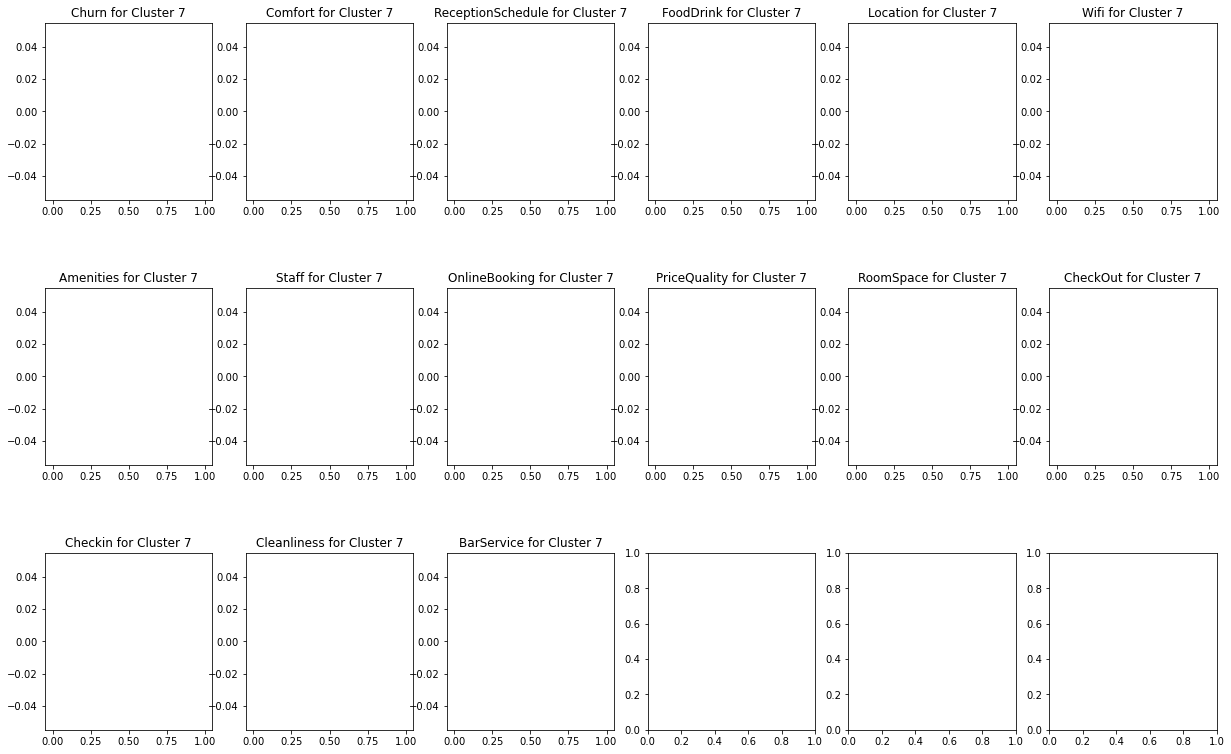

In [118]:
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(21,13))

# cluster 7
axs[0, 0].hist(df['Churn'].loc[df['Business']==6], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 7')
axs[0, 1].hist(df['Comfort'].loc[df['Business']==6], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 7')
axs[0, 2].hist(df['ReceptionSchedule'].loc[df['Business']==6], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 7')
axs[0, 3].hist(df['FoodDrink'].loc[df['Business']==6], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 7')
axs[0, 4].hist(df['Location'].loc[df['Business']==6], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 7')
axs[0, 5].hist(df['Wifi'].loc[df['Business']==6], color='rosybrown')
axs[0, 5].set_title('Wifi for Cluster 7')
axs[1, 0].hist(df['Amenities'].loc[df['Business']==6], color='rosybrown')
axs[1, 0].set_title('Amenities for Cluster 7')
axs[1, 1].hist(df['Staff'].loc[df['Business']==6], color='rosybrown')
axs[1, 1].set_title('Staff for Cluster 7')
axs[1, 2].hist(df['OnlineBooking'].loc[df['Business']==6], color='rosybrown')
axs[1, 2].set_title('OnlineBooking for Cluster 7')
axs[1, 3].hist(df['PriceQuality'].loc[df['Business']==6], color='rosybrown')
axs[1, 3].set_title('PriceQuality for Cluster 7')
axs[1, 4].hist(df['RoomSpace'].loc[df['Business']==6], color='rosybrown')
axs[1, 4].set_title('RoomSpace for Cluster 7')
axs[1, 5].hist(df['CheckOut'].loc[df['Business']==6], color='rosybrown')
axs[1, 5].set_title('CheckOut for Cluster 7')
axs[2, 0].hist(df['Checkin'].loc[df['Business']==6], color='rosybrown')
axs[2, 0].set_title('Checkin for Cluster 7')
axs[2, 1].hist(df['Cleanliness'].loc[df['Business']==6], color='rosybrown')
axs[2, 1].set_title('Cleanliness for Cluster 7')
axs[2, 2].hist(df['BarService'].loc[df['Business']==6], color='rosybrown')
axs[2, 2].set_title('BarService for Cluster 7')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [119]:
#Number of observations in each cluster
df['Business'].value_counts()

3    4795
1    4194
0    3277
2    3028
Name: Business, dtype: int64

#### Kmeans + Hierarchical - Short Business 

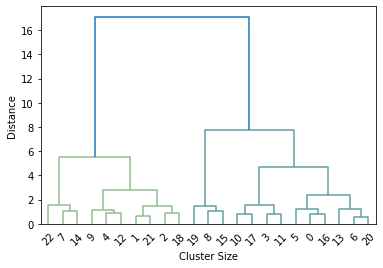

In [120]:
scaler = MinMaxScaler()
short_business_df_scaled = scaler.fit_transform(short_business_df)
short_business_df_scaled = pd.DataFrame(short_business_df_scaled, index= df.index, columns = short_business_variables)

#kmeans starting with 23 variables
kmeans = KMeans(n_clusters=23, random_state=0, n_init = 5, max_iter = 200).fit(short_business_df)

clusters = kmeans.cluster_centers_

# save the centroids inverting the normalization
clusters = pd.DataFrame(scaler.inverse_transform(X = clusters),columns = short_business_variables)

#Getting the Silhoutte score
silhouette_avg = silhouette_score(short_business_df, kmeans.labels_)
sample_silhouette_values = silhouette_samples(short_business_df, kmeans.labels_)

del silhouette_avg, sample_silhouette_values#, cluster_labels

#Checking the Dendrogram
Z = linkage(clusters, method = "ward")

hierarchy.set_link_color_palette(['darkseagreen','cadetblue', 'seagreen', 'mediumseagreen', 'c','mediumturquoise','turquoise'])

#fig = plt.figure(figsize=(10, 20))
#ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
#Z = hierarchy.linkage(clusters, method='ward')

dendrogram(Z,
          truncate_mode="lastp",
          p=40,
          orientation ="top" ,
          leaf_rotation=45.,
          leaf_font_size=10.,
          show_contracted=True,
          show_leaf_counts=True)

#cur_axes = plt.gca()
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [121]:

distortions = []
K = range(1,23)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(short_business_df_scaled)
    distortions.append(kmeanModel.inertia_)

226.66501097698628


<Figure size 360x360 with 0 Axes>

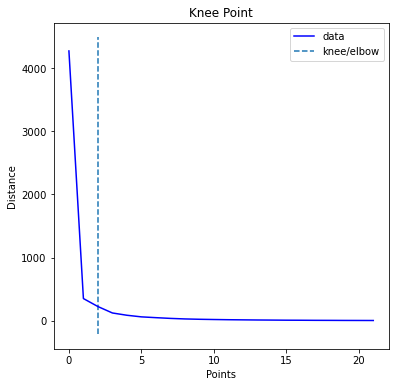

In [122]:
from kneed import KneeLocator

i = np.arange(len(distortions))
knee = KneeLocator(i, distortions, S=1, curve='convex', direction='decreasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distortions[knee.knee])

In [123]:
#Running K-Means with 3 clusters observed on the Dendrogram
kmeans = KMeans(n_clusters=3, random_state=0, n_init = 5, max_iter = 200).fit(short_business_df_scaled)

In [124]:
clusters = kmeans.cluster_centers_

In [125]:
# save the centroids inverting the normalization
clusters = pd.DataFrame(scaler.inverse_transform(X = clusters),columns = short_business_df.columns)

In [126]:
silhouette_avg = silhouette_score(short_business_df_scaled, kmeans.labels_)
sample_silhouette_values = silhouette_samples(short_business_df_scaled, kmeans.labels_)

In [127]:
cluster_labels = pd.DataFrame(kmeans.labels_ , index=df.index)
cluster_labels.columns=['Labels']

In [128]:
short_business_df = pd.concat([short_business_df, cluster_labels], axis = 1)

In [129]:
del silhouette_avg, sample_silhouette_values, cluster_labels

In [130]:
#Hclustering = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
#HC = Hclustering.fit(clusters)

In [131]:
#labels = pd.DataFrame(HC.labels_)
#labels.columns =  ['Short-Business']

In [132]:
#clusters = pd.concat([clusters, labels], axis = 1)
#clusters['Label']=[i for i in range(0,3)]

In [133]:
#j=0
#for i in range(0, len(clusters['Short-Business'])):
#    short_business_df['Labels']=short_business_df['Labels'].replace(clusters['Label'][i], clusters['Short-Business'][j])
#    j+=1

In [134]:
df = pd.concat([df, short_business_df['Labels']], axis=1)
df.rename(columns={"Labels": "Short-Business"}, inplace=True)

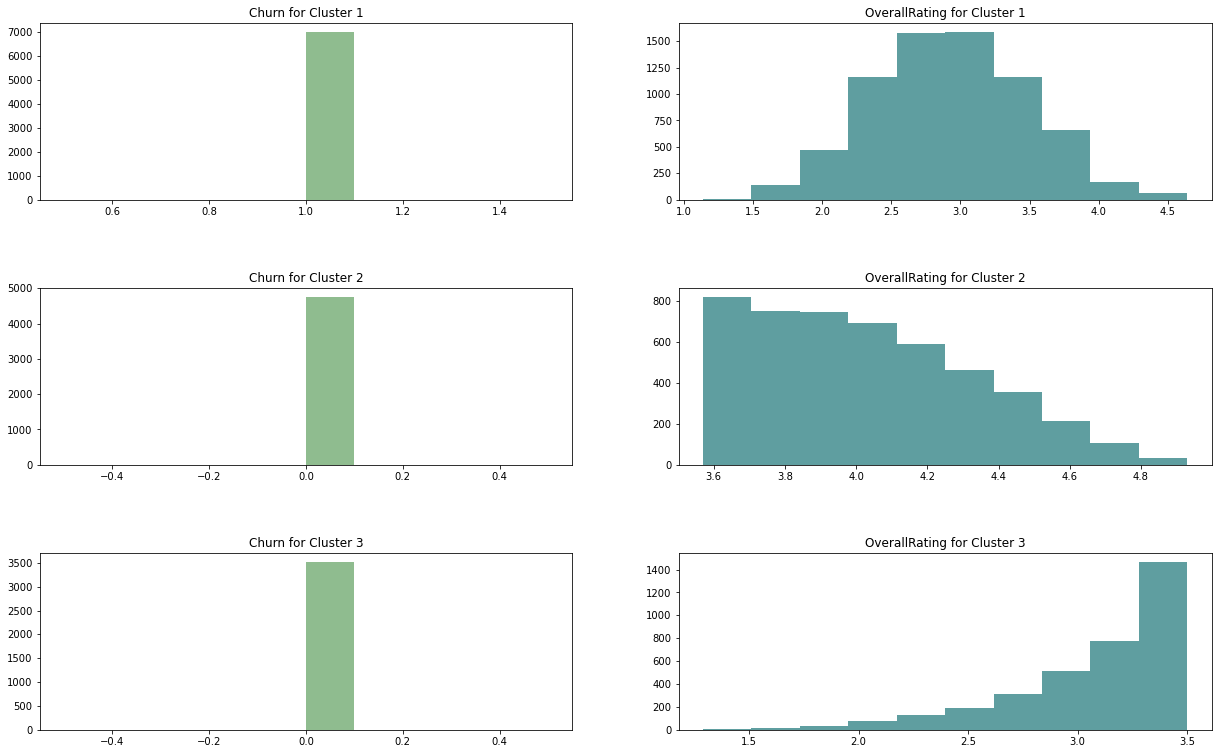

In [135]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(21,13))

# cluster 1
axs[0, 0].hist(df['Churn'].loc[df['Short-Business']==0], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 1')
axs[0, 1].hist(df['OverallRating'].loc[df['Short-Business']==0], color='cadetblue')
axs[0, 1].set_title('OverallRating for Cluster 1')

# cluster 2
axs[1, 0].hist(df['Churn'].loc[df['Short-Business']==1], color='darkseagreen')
axs[1, 0].set_title('Churn for Cluster 2')
axs[1, 1].hist(df['OverallRating'].loc[df['Short-Business']==1], color='cadetblue')
axs[1, 1].set_title('OverallRating for Cluster 2')

# cluster 3
axs[2, 0].hist(df['Churn'].loc[df['Short-Business']==2], color='darkseagreen')
axs[2, 0].set_title('Churn for Cluster 3')
axs[2, 1].hist(df['OverallRating'].loc[df['Short-Business']==2], color='cadetblue')
axs[2, 1].set_title('OverallRating for Cluster 3')

# cluster 4
#axs[3, 0].hist(df['Churn'].loc[df['Short-Business']==3], color='darkseagreen')
#axs[3, 0].set_title('Churn for Cluster 4')
#axs[3, 1].hist(df['OverallRating'].loc[df['Short-Business']==3], color='cadetblue')
#axs[3, 1].set_title('OverallRating for Cluster 4')

# cluster 5
#axs[4, 0].hist(df['Churn'].loc[df['Business']==4], color='darkseagreen')
#axs[4, 0].set_title('Churn for Cluster 5')
#axs[4, 1].hist(df['OverallRating'].loc[df['Business']==4], color='cadetblue')
#axs[4, 1].set_title('OverallRating for Cluster 5')

# cluster 6
#axs[5, 0].hist(df['Churn'].loc[df['Business']==5], color='darkseagreen')
#axs[5, 0].set_title('Churn for Cluster 6')
#axs[5, 1].hist(df['OverallRating'].loc[df['Business']==5], color='cadetblue')
#axs[5, 1].set_title('OverallRating for Cluster 6')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [136]:
#Number of observations in each cluster
df['Short-Business'].value_counts()

0    7002
1    4766
2    3526
Name: Short-Business, dtype: int64

In [137]:
df['OverallRating'].groupby(df['Short-Business']).mean()

Short-Business
0    2.933966
1    4.017757
2    3.071449
Name: OverallRating, dtype: float64

In [138]:
df

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,Cleanliness,BarService,Gender,Age,OverallRating,RoomType_single,RoomType_suite,Client,Business,Short-Business
0,1,1,1,4907,3,4,1,4,4,3,...,3,4,0,48,3.29,1,0,4,2,0
1,0,1,1,6724,1,1,1,1,5,3,...,5,2,1,57,3.14,1,0,2,0,2
2,1,1,1,4365,3,3,3,3,1,4,...,3,1,1,49,2.71,1,0,2,1,0
3,0,1,0,3849,1,1,1,1,4,4,...,4,3,0,29,3.14,0,0,3,0,2
4,0,1,1,5376,2,2,3,2,5,5,...,3,5,1,33,3.57,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,1,0,1,4968,2,0,2,2,3,2,...,4,3,0,34,2.71,0,0,0,2,0
15585,1,0,1,4970,3,3,3,3,5,3,...,4,5,0,22,3.57,0,0,0,2,0
15586,0,1,1,4046,1,1,1,1,3,4,...,4,4,1,58,3.21,1,0,2,0,2
15587,0,1,0,5155,4,3,4,4,5,4,...,4,5,1,30,4.07,0,0,1,3,1


### Cluster Analysis

### 5.5.1) Merging the Perspectives <a name="MergePerpectives"></a>

In [139]:
#Renaming columns with the labels in order to know which model they are related to
df.rename(columns={'Client':'Client_Kmeans', 'Business': 'Business_Kmeans'}, inplace=True)

In [140]:
# Count label frequencies (contigency table)
df.groupby(['Business_Kmeans', 'Client_Kmeans'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('Client_Kmeans', 'Business_Kmeans', 0)

Business_Kmeans,0,1,2,3
Client_Kmeans,,,,
0,119,1024,883,315
1,194,1294,1202,402
2,1029,716,417,1442
3,888,660,362,1372
4,1047,500,164,1264


In [141]:
df_normalized = df_normalized.merge(df[['Client_Kmeans','Business_Kmeans']],  left_index=True, right_index=True)

In [142]:
# Centroids of the concatenated cluster labels
df_centroids = df_normalized.groupby(['Client_Kmeans', 'Business_Kmeans'])[all_variables].mean()
df_centroids

Churn  Longevity  TypeTravel  RewardPoints  \
Client_Kmeans Business_Kmeans                                                  
0             0                0.000000   0.000000    1.000000      0.577962   
              1                0.960938   0.000000    0.997070      0.547748   
              2                1.000000   0.000000    0.995470      0.548534   
              3                0.000000   0.000000    1.000000      0.532516   
1             0                0.000000   1.000000    0.783505      0.564170   
              1                0.968315   0.997682    0.282844      0.524030   
              2                0.999168   0.995840    0.103993      0.535173   
              3                0.000000   1.000000    0.619403      0.549868   
2             0                0.000000   0.947522    0.998056      0.520749   
              1                0.967877   0.811453    0.899441      0.530809   
              2                1.000000   0.587530    0.796163      0.552899   
              3                0.000000   0.895978    0.993759      0.537994   
3             0                0.000000   1.000000    0.208333      0.675294   
              1                0.862121   0.993939    0.633333      0.669171   
              2                1.000000   0.991713    0.303867      0.675678   
              3                0.000000   0.998542    0.200437      0.671960   
4             0                0.000000   1.000000    0.957975      0.540567   
              1                0.952000   1.000000    0.966000      0.500155   
              2                1.000000   1.000000    0.908537      0.536220   
              3                0.000000   1.000000    0.940665      0.539916   

                                Comfort  ReceptionSchedule  FoodDrink  \
Client_Kmeans Business_Kmeans                                           
0             0                0.332773           0.178151   0.317647   
              1                0.483203           0.450195   0.486719   
              2                0.481993           0.455040   0.479728   
              3                0.903492           0.683175   0.902222   
1             0                0.659794           0.370103   0.286598   
              1                0.456569           0.680526   0.503400   
              2                0.505990           0.741098   0.476539   
              3                0.883582           0.765174   0.820398   
2             0                0.288435           0.318173   0.328474   
              1                0.439944           0.594413   0.589944   
              2                0.555875           0.568345   0.518945   
              3                0.816366           0.782663   0.796117   
3             0                0.438288           0.343468   0.298649   
              1                0.495758           0.633636   0.597576   
              2                0.707182           0.730387   0.653591   
              3                0.838630           0.781487   0.796939   
4             0                0.280038           0.323018   0.314613   
              1                0.425600           0.618000   0.614400   
              2                0.692683           0.596341   0.589024   
              3                0.801424           0.786867   0.784810   

                               Location      Wifi  Amenities  ...  RoomSpace  \
Client_Kmeans Business_Kmeans                                 ...              
0             0                0.315126  0.670588   0.305882  ...   0.645378   
              1                0.511230  0.383203   0.486133  ...   0.606641   
              2                0.513024  0.824009   0.489921  ...   0.624915   
              3                0.522222  0.660317   0.874286  ...   0.687619   
1             0                0.186856  0.830928   0.672165  ...   0.606186   
              1                0.491886  0.370943   0.448068  ...   0.620711   
              2           

In [143]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

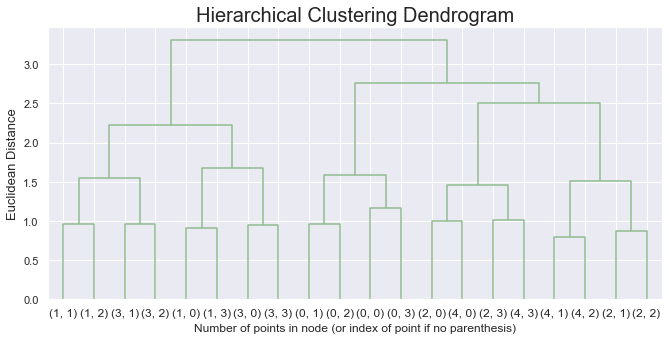

In [144]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4.5
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

10.711208277364086


<Figure size 360x360 with 0 Axes>

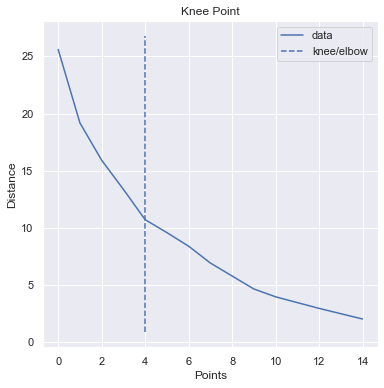

In [145]:

distortions = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_centroids)
    distortions.append(kmeanModel.inertia_)

from kneed import KneeLocator

i = np.arange(len(distortions))
knee = KneeLocator(i, distortions, S=1, curve='convex', direction='decreasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distortions[knee.knee])

In [146]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Churn  Longevity  TypeTravel  RewardPoints  \
Client_Kmeans Business_Kmeans                                                  
0             0                0.000000   0.000000    1.000000      0.577962   
              1                0.960938   0.000000    0.997070      0.547748   
              2                1.000000   0.000000    0.995470      0.548534   
              3                0.000000   0.000000    1.000000      0.532516   
1             0                0.000000   1.000000    0.783505      0.564170   
              1                0.968315   0.997682    0.282844      0.524030   
              2                0.999168   0.995840    0.103993      0.535173   
              3                0.000000   1.000000    0.619403      0.549868   
2             0                0.000000   0.947522    0.998056      0.520749   
              1                0.967877   0.811453    0.899441      0.530809   
              2                1.000000   0.587530    0.796163      0.552899   
              3                0.000000   0.895978    0.993759      0.537994   
3             0                0.000000   1.000000    0.208333      0.675294   
              1                0.862121   0.993939    0.633333      0.669171   
              2                1.000000   0.991713    0.303867      0.675678   
              3                0.000000   0.998542    0.200437      0.671960   
4             0                0.000000   1.000000    0.957975      0.540567   
              1                0.952000   1.000000    0.966000      0.500155   
              2                1.000000   1.000000    0.908537      0.536220   
              3                0.000000   1.000000    0.940665      0.539916   

                                Comfort  ReceptionSchedule  FoodDrink  \
Client_Kmeans Business_Kmeans                                           
0             0                0.332773           0.178151   0.317647   
              1                0.483203           0.450195   0.486719   
              2                0.481993           0.455040   0.479728   
              3                0.903492           0.683175   0.902222   
1             0                0.659794           0.370103   0.286598   
              1                0.456569           0.680526   0.503400   
              2                0.505990           0.741098   0.476539   
              3                0.883582           0.765174   0.820398   
2             0                0.288435           0.318173   0.328474   
              1                0.439944           0.594413   0.589944   
              2                0.555875           0.568345   0.518945   
              3                0.816366           0.782663   0.796117   
3             0                0.438288           0.343468   0.298649   
              1                0.495758           0.633636   0.597576   
              2                0.707182           0.730387   0.653591   
              3                0.838630           0.781487   0.796939   
4             0                0.280038           0.323018   0.314613   
              1                0.425600           0.618000   0.614400   
              2                0.692683           0.596341   0.589024   
              3                0.801424           0.786867   0.784810   

                               Location      Wifi  Amenities  ...  CheckOut  \
Client_Kmeans Business_Kmeans                                 ...             
0             0                0.315126  0.670588   0.305882  ...  0.728992   
              1                0.511230  0.383203   0.486133  ...  0.600830   
              2                0.513024  0.824009   0.489921  ...  0.665629   
              3                0.522222  0.660317   0.874286  ...  0.773810   
1             0                0.186856  0.830928   0.672165  ...  0.583763   
              1                0.491886  0.370943   0.448068  ...  0.622102   
              2                0.4

In [147]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df_normalized.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['Client_Kmeans'], row['Business_Kmeans'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,Checkin,Cleanliness,BarService,Gender,Age,OverallRating,RoomType_single,RoomType_suite,Client_Kmeans,Business_Kmeans
merged_labels,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.999300,0.301471,0.648490,0.708333,0.615056,0.610644,0.494660,0.733543,0.791457,...,0.611257,0.692927,0.765756,0.208683,0.418319,0.649339,0.000000,0.150560,2.582633,1.863445
1,0.962194,0.995736,0.289653,0.570671,0.506595,0.697555,0.527345,0.489838,0.567368,0.513530,...,0.522598,0.620381,0.568619,0.709494,0.422928,0.487374,0.000000,0.165435,1.581012,1.444571
2,0.797522,0.000000,0.997010,0.547531,0.531653,0.469543,0.531397,0.503417,0.601367,0.530628,...,0.520184,0.640218,0.602734,0.328065,0.286060,0.487503,0.250748,0.047416,0.000000,1.595472
3,0.000000,0.957340,0.972815,0.535355,0.581389,0.583187,0.587077,0.494668,0.705897,0.832079,...,0.695107,0.783093,0.769427,0.516729,0.470531,0.673829,1.000000,0.000000,2.966541,1.697616
4,0.973845,0.829160,0.894825,0.527900,0.485921,0.595103,0.580189,0.507095,0.572955,0.570840,...,0.434057,0.501113,0.528881,0.630495,0.428456,0.443793,1.000000,0.000000,2.739009,1.323317


In [148]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the value and consumption labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['Client_Kmeans'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['Business_Kmeans'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('Client_Kmeans', 'Business_Kmeans', 0)

Business_Kmeans,2,3
Client_Kmeans,,
0,NaN,2341.0
3,3518.0,2856.0
4,1797.0,4782.0


In [149]:
# Setting df to have the final value, consumption and merged clusters
data_cluster = df_.copy()

### Cluster Profiles

In [150]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

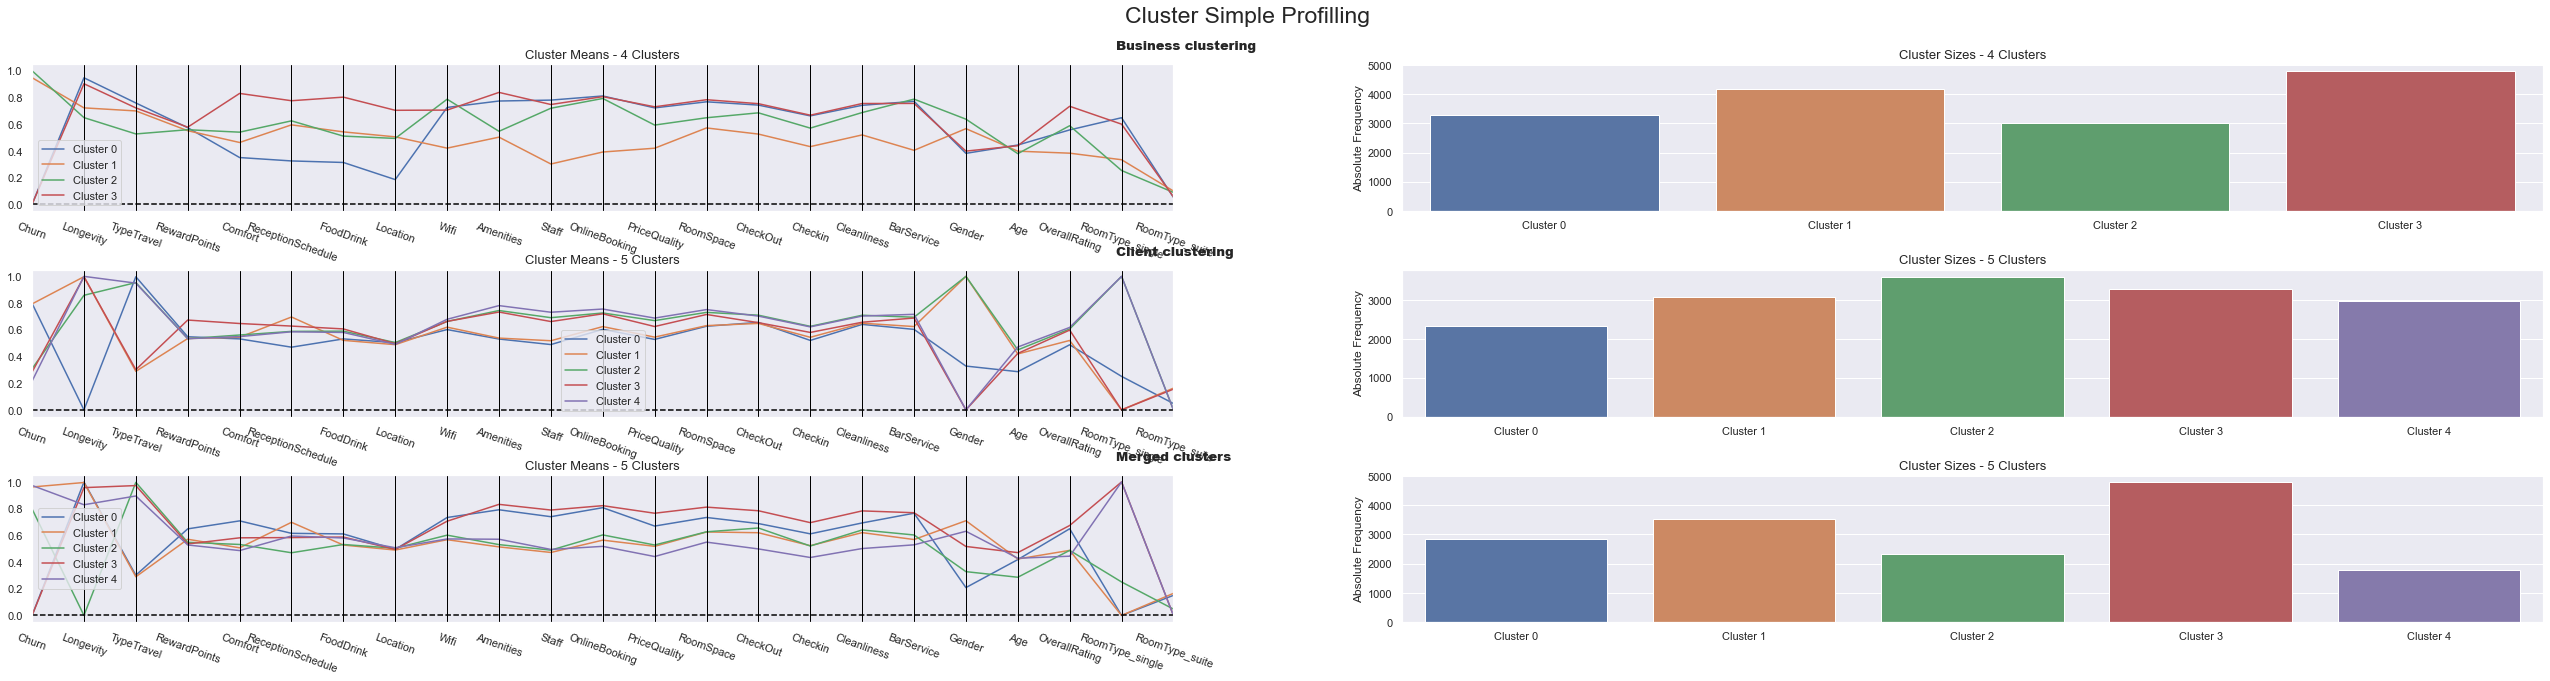

In [151]:
#Checking the cluster profiles of the value, consumption and merged perspectives
cluster_profiles(
    data_cluster, 
    label_columns = ['Business_Kmeans', 'Client_Kmeans', 'merged_labels'], 
    figsize = (45, 10), 
    compar_titles = ["Business clustering", "Client clustering", "Merged clusters"]
)

### Hierarchical Clustering

In [148]:
#all_variables = ['Churn', 'Longevity', 'TypeTravel', 'RewardPoints', 'Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities','Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut','Checkin', 'Cleanliness', 'BarService', 'Gender', 'Age','OverallRating', 'RoomType_single', 'RoomType_suite']
#client_variables = ['Longevity', 'TypeTravel', 'RewardPoints', 'RoomType_single', 'RoomType_suite', 'Gender', 'Age']
#business_variables = ['Churn','Comfort','ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities','Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut','Checkin', 'Cleanliness', 'BarService']
#short_business_variables = ['Churn', 'OverallRating']

In [152]:
client = df_normalized[client_variables]
business = df_normalized[business_variables]
short_business = df_normalized[short_business_variables]

#### Client

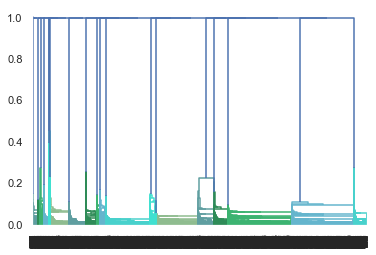

In [151]:
#Single 
dendrogram = sch.dendrogram(sch.linkage(client, method='single'))
plt.show()

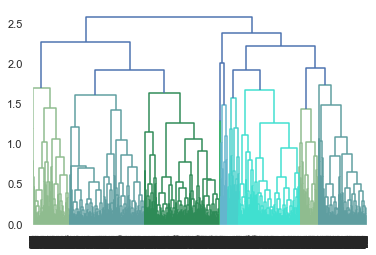

In [152]:
#Complete
dendrogram = sch.dendrogram(sch.linkage(client, method='complete'))
plt.show()

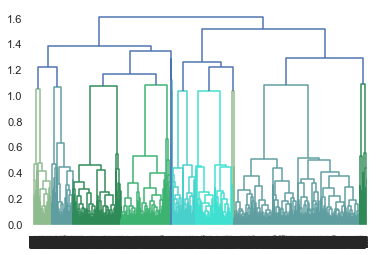

In [153]:
#Average
dendrogram = sch.dendrogram(sch.linkage(client, method='average'))
plt.show()

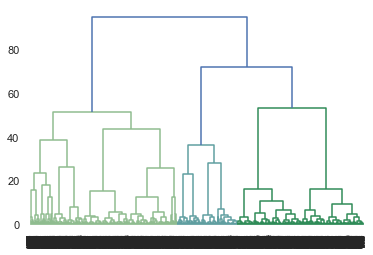

In [154]:
#Ward
dendrogram = sch.dendrogram(sch.linkage(client, method='ward'))
plt.show()

In [153]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_cluster = cluster.fit_predict(client)
y_cluster

array([4, 3, 3, ..., 3, 0, 1], dtype=int64)

In [154]:
len(y_cluster)

15294

In [155]:
client.shape

(15294, 7)

In [156]:
df_client = pd.concat((client, pd.Series(y_cluster,index=client.index ,name='Client')), axis=1)

df_client

,Longevity,TypeTravel,RewardPoints,RoomType_single,RoomType_suite,Gender,Age,Client
0,1.0,1.0,0.525986,1.0,0.0,0.0,0.512821,4
1,1.0,1.0,0.947564,1.0,0.0,1.0,0.628205,3
2,1.0,1.0,0.400232,1.0,0.0,1.0,0.525641,3
3,1.0,0.0,0.280510,0.0,0.0,0.0,0.269231,0
4,1.0,1.0,0.634803,1.0,0.0,1.0,0.320513,3
...,...,...,...,...,...,...,...,...
15584,0.0,1.0,0.540139,0.0,0.0,0.0,0.333333,2
15585,0.0,1.0,0.540603,0.0,0.0,0.0,0.179487,2
15586,1.0,1.0,0.326218,1.0,0.0,1.0,0.641026,3
15587,1.0,0.0,0.583527,0.0,0.0,1.0,0.282051,0


In [157]:
df_client.shape

(15294, 8)

In [158]:
df_client['Client'].unique()

array([4, 3, 0, 1, 2], dtype=int64)

In [159]:
df_client.groupby('Client').mean()

,Longevity,TypeTravel,RewardPoints,RoomType_single,RoomType_suite,Gender,Age
Client,,,,,,,
0,1.000000,0.000000,0.601206,0.074394,0.000000,0.490905,0.401547
1,0.955582,0.796719,0.620987,0.000000,0.448980,0.464586,0.445588
2,0.000000,0.991298,0.545000,0.398115,0.000363,0.461566,0.293882
3,1.000000,1.000000,0.525638,1.000000,0.000000,1.000000,0.475043
4,1.000000,1.000000,0.523996,1.000000,0.000000,0.000000,0.473397


In [160]:
#df_results

In [161]:
#df_client_results = pd.concat((df_results, pd.Series(y_cluster, name='Client')), axis=1)[['Longevity', 'TypeTravel', 'RewardPoints', 'RoomType', 'Gender', 'Age','Client']]
#df_client_results.groupby('cluster')[client.columns].mean()
#df_client_results

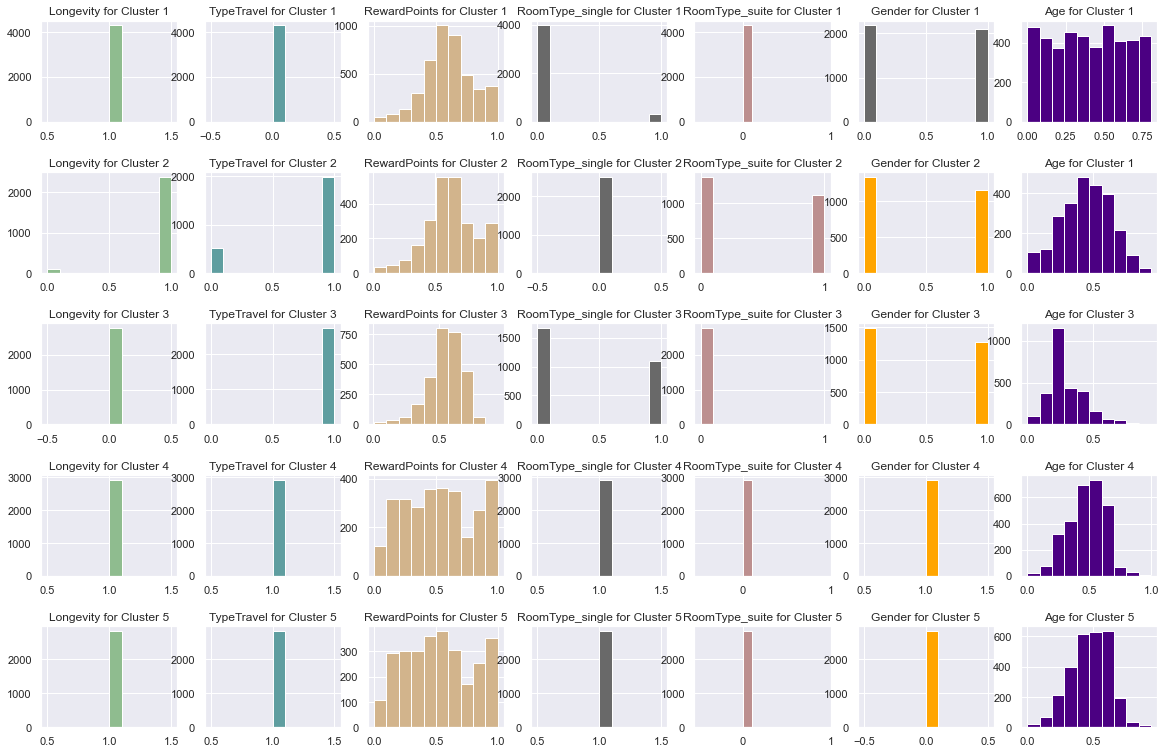

In [163]:
fig, axs = plt.subplots(nrows=5, ncols=7, figsize=(20,13))

# cluster 1
axs[0, 0].hist(df_client['Longevity'].loc[df_client['Client']==0], color='darkseagreen')
axs[0, 0].set_title('Longevity for Cluster 1')
axs[0, 1].hist(df_client['TypeTravel'].loc[df_client['Client']==0], color='cadetblue' )
axs[0, 1].set_title('TypeTravel for Cluster 1')
axs[0, 2].hist(df_client['RewardPoints'].loc[df_client['Client']==0], color='tan')
axs[0, 2].set_title('RewardPoints for Cluster 1')
axs[0, 3].hist(df_client['RoomType_single'].loc[df_client['Client']==0], color='dimgrey')
axs[0, 3].set_title('RoomType_single for Cluster 1')
axs[0, 4].hist(df_client['RoomType_suite'].loc[df_client['Client']==0], color='rosybrown')
axs[0, 4].set_title('RoomType_suite for Cluster 1')
axs[0, 5].hist(df_client['Gender'].loc[df_client['Client']==0], color='dimgrey')
axs[0, 5].set_title('Gender for Cluster 1')
plt.sca(axs[0, 4])
plt.xticks([0, 1])
axs[0, 6].hist(df_client['Age'].loc[df_client['Client']==0], color='indigo')
axs[0, 6].set_title('Age for Cluster 1')


# cluster 2
axs[1, 0].hist(df_client['Longevity'].loc[df_client['Client']==1], color='darkseagreen')
axs[1, 0].set_title('Longevity for Cluster 2')
axs[1, 1].hist(df_client['TypeTravel'].loc[df_client['Client']==1], color='cadetblue' )
axs[1, 1].set_title('TypeTravel for Cluster 2')
axs[1, 2].hist(df_client['RewardPoints'].loc[df_client['Client']==1], color='tan')
axs[1, 2].set_title('RewardPoints for Cluster 2')
axs[1, 3].hist(df_client['RoomType_single'].loc[df_client['Client']==1], color='dimgrey')
axs[1, 3].set_title('RoomType_single for Cluster 2')
axs[1, 4].hist(df_client['RoomType_suite'].loc[df_client['Client']==1], color='rosybrown')
axs[1, 4].set_title('RoomType_suite for Cluster 2')
axs[1, 5].hist(df_client['Gender'].loc[df_client['Client']==1], color='orange')
axs[1, 5].set_title('Gender for Cluster 2')
plt.sca(axs[1, 4])
plt.xticks([0, 1])
axs[1, 6].hist(df_client['Age'].loc[df_client['Client']==1], color='indigo')
axs[1, 6].set_title('Age for Cluster 1')


# cluster 3
axs[2, 0].hist(df_client['Longevity'].loc[df_client['Client']==2], color='darkseagreen')
axs[2, 0].set_title('Longevity for Cluster 3')
axs[2, 1].hist(df_client['TypeTravel'].loc[df_client['Client']==2], color='cadetblue' )
axs[2, 1].set_title('TypeTravel for Cluster 3')
axs[2, 2].hist(df_client['RewardPoints'].loc[df_client['Client']==2], color='tan')
axs[2, 2].set_title('RewardPoints for Cluster 3')
axs[2, 3].hist(df_client['RoomType_single'].loc[df_client['Client']==2], color='dimgrey')
axs[2, 3].set_title('RoomType_single for Cluster 3')
axs[2, 4].hist(df_client['RoomType_suite'].loc[df_client['Client']==2], color='rosybrown')
axs[2, 4].set_title('RoomType_suite for Cluster 3')
axs[2, 5].hist(df_client['Gender'].loc[df_client['Client']==2], color='orange')
axs[2, 5].set_title('Gender for Cluster 3')
plt.sca(axs[2, 4])
plt.xticks([0, 1])
axs[2, 6].hist(df_client['Age'].loc[df_client['Client']==2], color='indigo')
axs[2, 6].set_title('Age for Cluster 3')


# cluster 4
axs[3, 0].hist(df_client['Longevity'].loc[df_client['Client']==3], color='darkseagreen')
axs[3, 0].set_title('Longevity for Cluster 4')
axs[3, 1].hist(df_client['TypeTravel'].loc[df_client['Client']==3], color='cadetblue' )
axs[3, 1].set_title('TypeTravel for Cluster 4')
axs[3, 2].hist(df_client['RewardPoints'].loc[df_client['Client']==3], color='tan')
axs[3, 2].set_title('RewardPoints for Cluster 4')
axs[3, 3].hist(df_client['RoomType_single'].loc[df_client['Client']==3], color='dimgrey')
axs[3, 3].set_title('RoomType_single for Cluster 4')
axs[3, 4].hist(df_client['RoomType_suite'].loc[df_client['Client']==3], color='rosybrown')
axs[3, 4].set_title('RoomType_suite for Cluster 4')
axs[3, 5].hist(df_client['Gender'].loc[df_client['Client']==3], color='orange')
axs[3, 5].set_title('Gender for Cluster 4')
plt.sca(axs[3, 4])
plt.xticks([0, 1])
axs[3, 6].hist(df_client['Age'].loc[df_client['Client']==3], color='indigo')
axs[3, 6].set_title('Age for Cluster 4')

# cluster 5
axs[4, 0].hist(df_client['Longevity'].loc[df_client['Client']==4], color='darkseagreen')
axs[4, 0].set_title('Longevity for Cluster 5')
axs[4, 1].hist(df_client['TypeTravel'].loc[df_client['Client']==4], color='cadetblue' )
axs[4, 1].set_title('TypeTravel for Cluster 5')
axs[4, 2].hist(df_client['RewardPoints'].loc[df_client['Client']==4], color='tan')
axs[4, 2].set_title('RewardPoints for Cluster 5')
axs[4, 3].hist(df_client['RoomType_single'].loc[df_client['Client']==4], color='dimgrey')
axs[4, 3].set_title('RoomType_single for Cluster 5')
axs[4, 4].hist(df_client['RoomType_suite'].loc[df_client['Client']==4], color='rosybrown')
axs[4, 4].set_title('RoomType_suite for Cluster 5')
axs[4, 5].hist(df_client['Gender'].loc[df_client['Client']==4], color='orange')
axs[4, 5].set_title('Gender for Cluster 5')
plt.sca(axs[4, 4])
plt.xticks([0, 1])
axs[4, 6].hist(df_client['Age'].loc[df_client['Client']==4], color='indigo')
axs[4, 6].set_title('Age for Cluster 5')

plt.subplots_adjust(hspace=0.5)                                          
plt.show()

#### Business

In [165]:
#Single - não corre, o kernel morre
dendrogram = sch.dendrogram(sch.linkage(business, method='single'))
plt.show()

KeyboardInterrupt: 

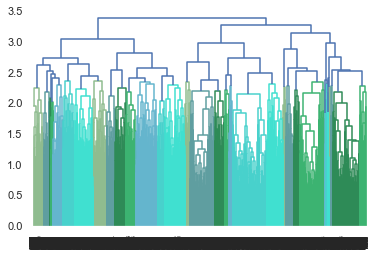

In [166]:
#Complete
dendrogram = sch.dendrogram(sch.linkage(business, method='complete'))
plt.show()

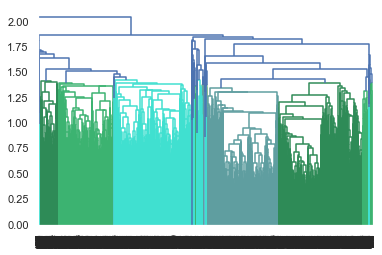

In [167]:
#Average
dendrogram = sch.dendrogram(sch.linkage(business, method='average'))
plt.show()

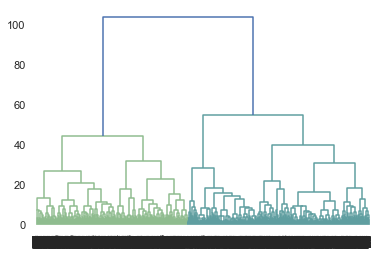

In [168]:
#ward
dendrogram = sch.dendrogram(sch.linkage(business, method='ward'))
plt.show()

In [165]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
v_cluster = cluster.fit_predict(client)
v_cluster

array([1, 3, 3, ..., 3, 0, 0], dtype=int64)

In [166]:
len(v_cluster)

15294

In [167]:
business.shape

(15294, 15)

In [168]:
df_business = pd.concat((business, pd.Series(v_cluster,index=business.index ,name='Business')), axis=1)

df_business

,Churn,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Business
0,1.0,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,1
1,0.0,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,3
2,1.0,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,3
3,0.0,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,0
4,0.0,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,1.0,0.4,0.0,0.4,0.25,0.6,0.4,0.75,0.6,0.75,1.0,0.00,0.50,0.75,0.6,2
15585,1.0,0.6,0.6,0.6,0.50,1.0,0.6,1.00,1.0,0.50,0.2,0.50,0.75,0.75,1.0,2
15586,0.0,0.2,0.2,0.2,0.00,0.6,0.8,1.00,0.8,0.75,0.8,0.75,1.00,0.75,0.8,3
15587,0.0,0.8,0.6,0.8,0.75,1.0,0.8,1.00,1.0,0.25,1.0,0.75,0.50,0.75,1.0,0


In [169]:
df_business.shape

(15294, 16)

In [170]:
df_business['Business'].unique()

array([1, 3, 0, 2], dtype=int64)

In [171]:
df_business.groupby('Business').mean()

,Churn,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Business,,,,,,,,,,,,,,,
0,0.538530,0.594931,0.658141,0.564285,0.492633,0.640047,0.638839,0.592714,0.670252,0.585494,0.672845,0.648961,0.562288,0.650914,0.656019
1,0.216360,0.542989,0.581657,0.576700,0.490439,0.678612,0.781161,0.732383,0.756161,0.687234,0.750212,0.701399,0.620131,0.702461,0.715510
2,0.753445,0.545323,0.476722,0.543945,0.497462,0.606599,0.541769,0.493655,0.608267,0.557922,0.639739,0.687908,0.556472,0.675580,0.607614
3,0.224957,0.556581,0.596171,0.593026,0.509658,0.673709,0.778803,0.727778,0.752684,0.673333,0.745026,0.698205,0.616667,0.697692,0.710906


In [174]:
df_business.columns

Index(['Churn', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService',
       'Business'],
      dtype='object')

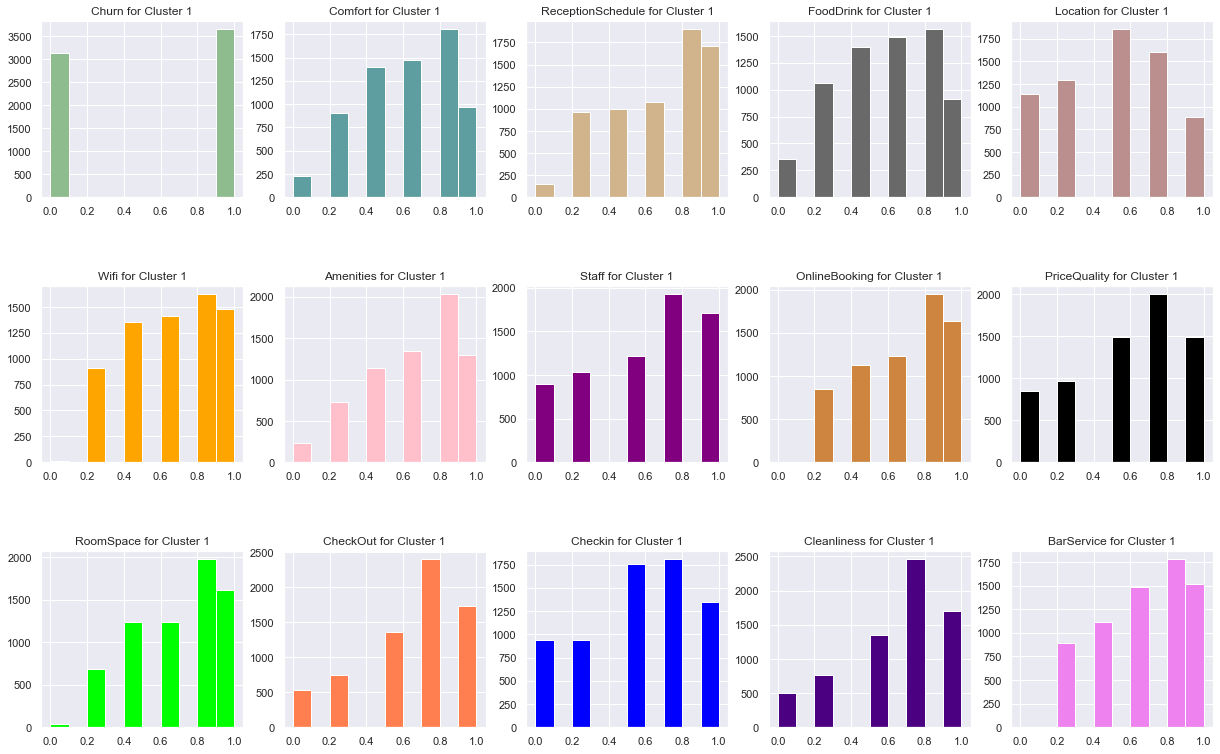

In [175]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21,13))

# cluster 1
axs[0, 0].hist(df_business['Churn'].loc[df_business['Business']==0], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 1')
axs[0, 1].hist(df_business['Comfort'].loc[df_business['Business']==0], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 1')
axs[0, 2].hist(df_business['ReceptionSchedule'].loc[df_business['Business']==0], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 1')
axs[0, 3].hist(df_business['FoodDrink'].loc[df_business['Business']==0], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 1')
axs[0, 4].hist(df_business['Location'].loc[df_business['Business']==0], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 1')
axs[1, 0].hist(df_business['Wifi'].loc[df_business['Business']==0], color='orange')
axs[1, 0].set_title('Wifi for Cluster 1')
axs[1, 1].hist(df_business['Amenities'].loc[df_business['Business']==0], color='pink')
axs[1, 1].set_title('Amenities for Cluster 1')
axs[1, 2].hist(df_business['Staff'].loc[df_business['Business']==0], color='purple')
axs[1, 2].set_title('Staff for Cluster 1')
axs[1, 3].hist(df_business['OnlineBooking'].loc[df_business['Business']==0], color='peru')
axs[1, 3].set_title('OnlineBooking for Cluster 1')
axs[1, 4].hist(df_business['PriceQuality'].loc[df_business['Business']==0], color='black')
axs[1, 4].set_title('PriceQuality for Cluster 1')
axs[2, 0].hist(df_business['RoomSpace'].loc[df_business['Business']==0], color='lime')
axs[2, 0].set_title('RoomSpace for Cluster 1')
axs[2, 1].hist(df_business['CheckOut'].loc[df_business['Business']==0], color='coral')
axs[2, 1].set_title('CheckOut for Cluster 1')
axs[2, 2].hist(df_business['Checkin'].loc[df_business['Business']==0], color='blue')
axs[2, 2].set_title('Checkin for Cluster 1')
axs[2, 3].hist(df_business['Cleanliness'].loc[df_business['Business']==0], color='indigo')
axs[2, 3].set_title('Cleanliness for Cluster 1')
axs[2, 4].hist(df_business['BarService'].loc[df_business['Business']==0], color='violet')
axs[2, 4].set_title('BarService for Cluster 1')


plt.subplots_adjust(hspace=0.5)
plt.show()

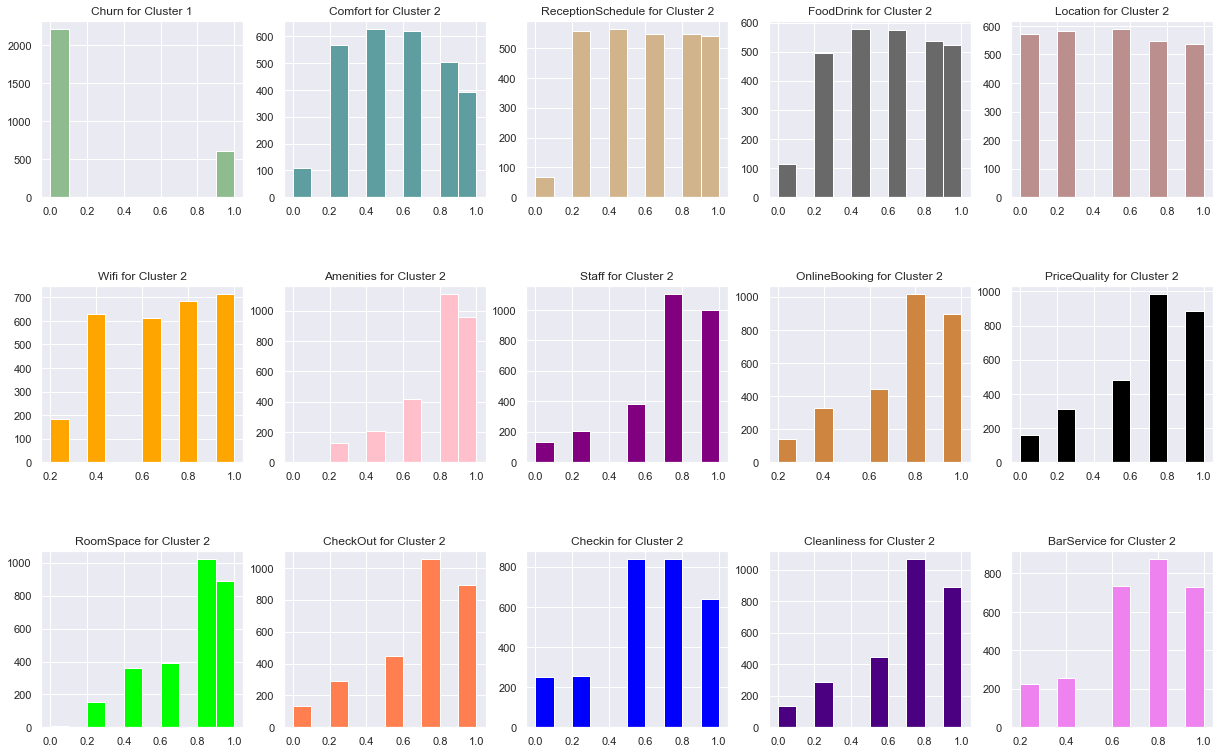

In [176]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21,13))

# cluster 2
axs[0, 0].hist(df_business['Churn'].loc[df_business['Business']==1], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 1')
axs[0, 1].hist(df_business['Comfort'].loc[df_business['Business']==1], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 2')
axs[0, 2].hist(df_business['ReceptionSchedule'].loc[df_business['Business']==1], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 2')
axs[0, 3].hist(df_business['FoodDrink'].loc[df_business['Business']==1], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 2')
axs[0, 4].hist(df_business['Location'].loc[df_business['Business']==1], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 2')
axs[1, 0].hist(df_business['Wifi'].loc[df_business['Business']==1], color='orange')
axs[1, 0].set_title('Wifi for Cluster 2')
axs[1, 1].hist(df_business['Amenities'].loc[df_business['Business']==1], color='pink')
axs[1, 1].set_title('Amenities for Cluster 2')
axs[1, 2].hist(df_business['Staff'].loc[df_business['Business']==1], color='purple')
axs[1, 2].set_title('Staff for Cluster 2')
axs[1, 3].hist(df_business['OnlineBooking'].loc[df_business['Business']==1], color='peru')
axs[1, 3].set_title('OnlineBooking for Cluster 2')
axs[1, 4].hist(df_business['PriceQuality'].loc[df_business['Business']==1], color='black')
axs[1, 4].set_title('PriceQuality for Cluster 2')
axs[2, 0].hist(df_business['RoomSpace'].loc[df_business['Business']==1], color='lime')
axs[2, 0].set_title('RoomSpace for Cluster 2')
axs[2, 1].hist(df_business['CheckOut'].loc[df_business['Business']==1], color='coral')
axs[2, 1].set_title('CheckOut for Cluster 2')
axs[2, 2].hist(df_business['Checkin'].loc[df_business['Business']==1], color='blue')
axs[2, 2].set_title('Checkin for Cluster 2')
axs[2, 3].hist(df_business['Cleanliness'].loc[df_business['Business']==1], color='indigo')
axs[2, 3].set_title('Cleanliness for Cluster 2')
axs[2, 4].hist(df_business['BarService'].loc[df_business['Business']==1], color='violet')
axs[2, 4].set_title('BarService for Cluster 2')


plt.subplots_adjust(hspace=0.5)
plt.show()

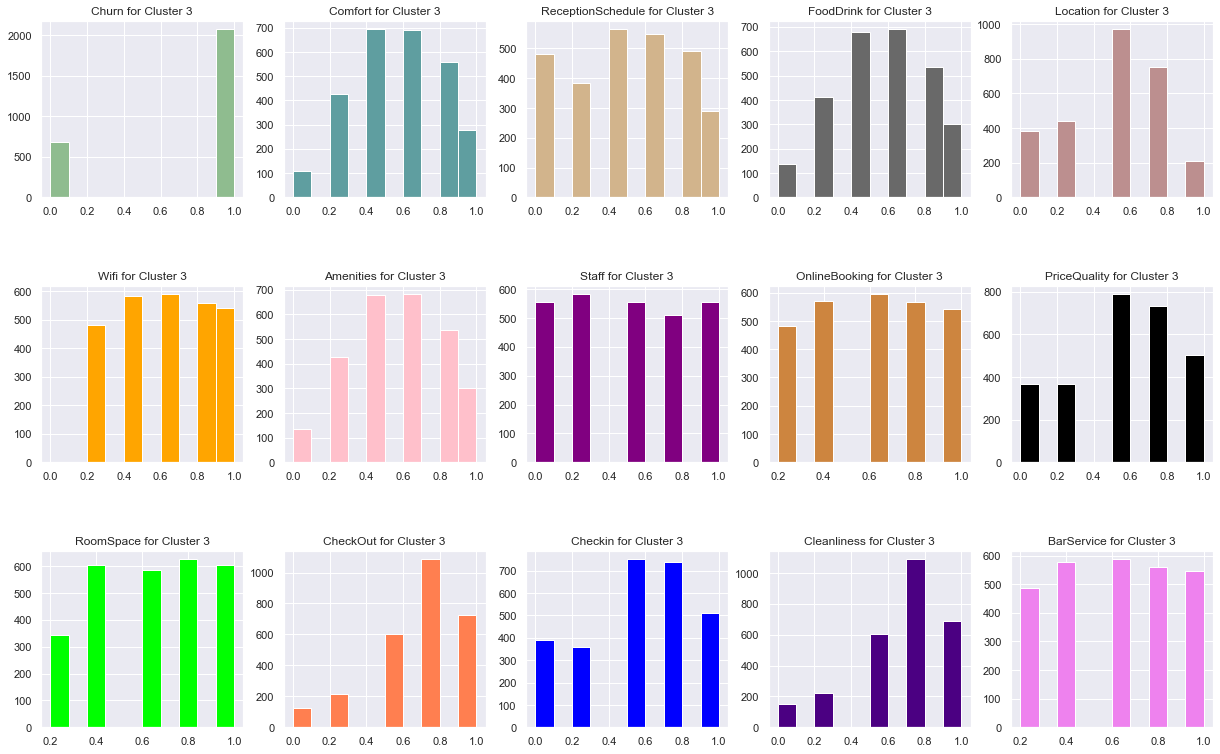

In [177]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21,13))

# cluster 3
axs[0, 0].hist(df_business['Churn'].loc[df_business['Business']==2], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 3')
axs[0, 1].hist(df_business['Comfort'].loc[df_business['Business']==2], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 3')
axs[0, 2].hist(df_business['ReceptionSchedule'].loc[df_business['Business']==2], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 3')
axs[0, 3].hist(df_business['FoodDrink'].loc[df_business['Business']==2], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 3')
axs[0, 4].hist(df_business['Location'].loc[df_business['Business']==2], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 3')
axs[1, 0].hist(df_business['Wifi'].loc[df_business['Business']==2], color='orange')
axs[1, 0].set_title('Wifi for Cluster 3')
axs[1, 1].hist(df_business['Amenities'].loc[df_business['Business']==2], color='pink')
axs[1, 1].set_title('Amenities for Cluster 3')
axs[1, 2].hist(df_business['Staff'].loc[df_business['Business']==2], color='purple')
axs[1, 2].set_title('Staff for Cluster 3')
axs[1, 3].hist(df_business['OnlineBooking'].loc[df_business['Business']==2], color='peru')
axs[1, 3].set_title('OnlineBooking for Cluster 3')
axs[1, 4].hist(df_business['PriceQuality'].loc[df_business['Business']==2], color='black')
axs[1, 4].set_title('PriceQuality for Cluster 3')
axs[2, 0].hist(df_business['RoomSpace'].loc[df_business['Business']==2], color='lime')
axs[2, 0].set_title('RoomSpace for Cluster 3')
axs[2, 1].hist(df_business['CheckOut'].loc[df_business['Business']==2], color='coral')
axs[2, 1].set_title('CheckOut for Cluster 3')
axs[2, 2].hist(df_business['Checkin'].loc[df_business['Business']==2], color='blue')
axs[2, 2].set_title('Checkin for Cluster 3')
axs[2, 3].hist(df_business['Cleanliness'].loc[df_business['Business']==2], color='indigo')
axs[2, 3].set_title('Cleanliness for Cluster 3')
axs[2, 4].hist(df_business['BarService'].loc[df_business['Business']==2], color='violet')
axs[2, 4].set_title('BarService for Cluster 3')


plt.subplots_adjust(hspace=0.5)
plt.show()

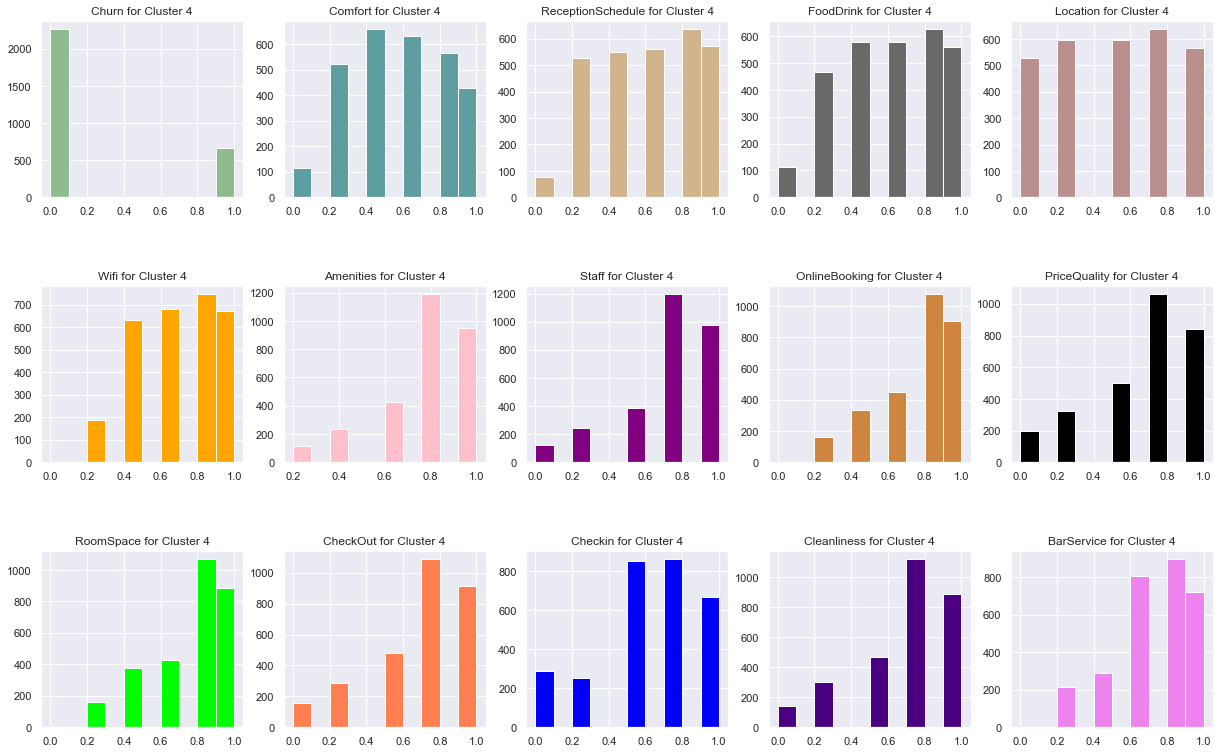

In [178]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21,13))

# cluster 4
axs[0, 0].hist(df_business['Churn'].loc[df_business['Business']==3], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 4')
axs[0, 1].hist(df_business['Comfort'].loc[df_business['Business']==3], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 4')
axs[0, 2].hist(df_business['ReceptionSchedule'].loc[df_business['Business']==3], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 4')
axs[0, 3].hist(df_business['FoodDrink'].loc[df_business['Business']==3], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 4')
axs[0, 4].hist(df_business['Location'].loc[df_business['Business']==3], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 4')
axs[1, 0].hist(df_business['Wifi'].loc[df_business['Business']==3], color='orange')
axs[1, 0].set_title('Wifi for Cluster 4')
axs[1, 1].hist(df_business['Amenities'].loc[df_business['Business']==3], color='pink')
axs[1, 1].set_title('Amenities for Cluster 4')
axs[1, 2].hist(df_business['Staff'].loc[df_business['Business']==3], color='purple')
axs[1, 2].set_title('Staff for Cluster 4')
axs[1, 3].hist(df_business['OnlineBooking'].loc[df_business['Business']==3], color='peru')
axs[1, 3].set_title('OnlineBooking for Cluster 4')
axs[1, 4].hist(df_business['PriceQuality'].loc[df_business['Business']==3], color='black')
axs[1, 4].set_title('PriceQuality for Cluster 4')
axs[2, 0].hist(df_business['RoomSpace'].loc[df_business['Business']==3], color='lime')
axs[2, 0].set_title('RoomSpace for Cluster 4')
axs[2, 1].hist(df_business['CheckOut'].loc[df_business['Business']==3], color='coral')
axs[2, 1].set_title('CheckOut for Cluster 4')
axs[2, 2].hist(df_business['Checkin'].loc[df_business['Business']==3], color='blue')
axs[2, 2].set_title('Checkin for Cluster 4')
axs[2, 3].hist(df_business['Cleanliness'].loc[df_business['Business']==3], color='indigo')
axs[2, 3].set_title('Cleanliness for Cluster 4')
axs[2, 4].hist(df_business['BarService'].loc[df_business['Business']==3], color='violet')
axs[2, 4].set_title('BarService for Cluster 4')


plt.subplots_adjust(hspace=0.5)
plt.show()

#### Short Business 

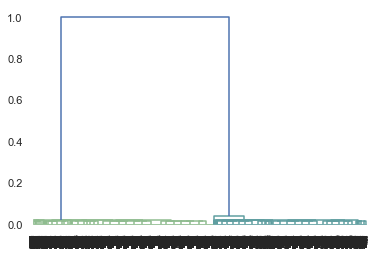

In [179]:
#Single 
dendrogram = sch.dendrogram(sch.linkage(short_business, method='single'))
plt.show()

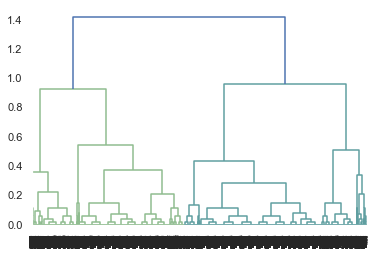

In [180]:
#Complete 
dendrogram = sch.dendrogram(sch.linkage(short_business, method='complete'))
plt.show()

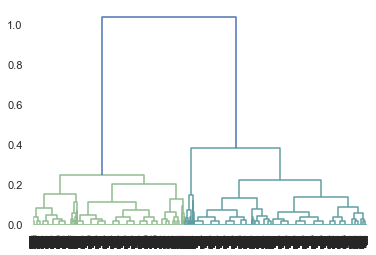

In [181]:
#Average 
dendrogram = sch.dendrogram(sch.linkage(short_business, method='average'))
plt.show()

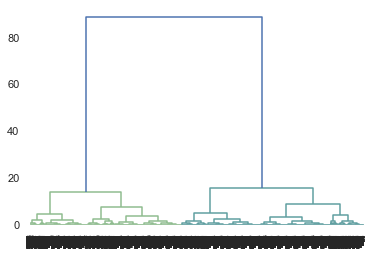

In [182]:
#Ward 
dendrogram = sch.dendrogram(sch.linkage(short_business, method='ward'))
plt.show()

In [179]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
s_cluster = cluster.fit_predict(short_business)
s_cluster

array([0, 1, 0, ..., 1, 2, 0], dtype=int64)

In [180]:
len(s_cluster)

15294

In [181]:
short_business.shape

(15294, 2)

In [182]:
df_short_business = pd.concat((short_business, pd.Series(y_cluster,index=short_business.index ,name='Short_Business')), axis=1)

df_short_business

,Churn,OverallRating,Short_Business
0,1.0,0.567282,4
1,0.0,0.527704,3
2,1.0,0.414248,3
3,0.0,0.527704,0
4,0.0,0.641161,3
...,...,...,...
15584,1.0,0.414248,2
15585,1.0,0.641161,2
15586,0.0,0.546174,3
15587,0.0,0.773087,0


In [183]:
df_short_business.shape

(15294, 3)

In [184]:
df_short_business['Short_Business'].unique()

array([4, 3, 0, 1, 2], dtype=int64)

In [185]:
df_short_business.groupby('Short_Business').mean()

,Churn,OverallRating
Short_Business,,
0,0.534981,0.580464
1,0.544618,0.521585
2,0.753445,0.504444
3,0.224957,0.617579
4,0.216360,0.616127


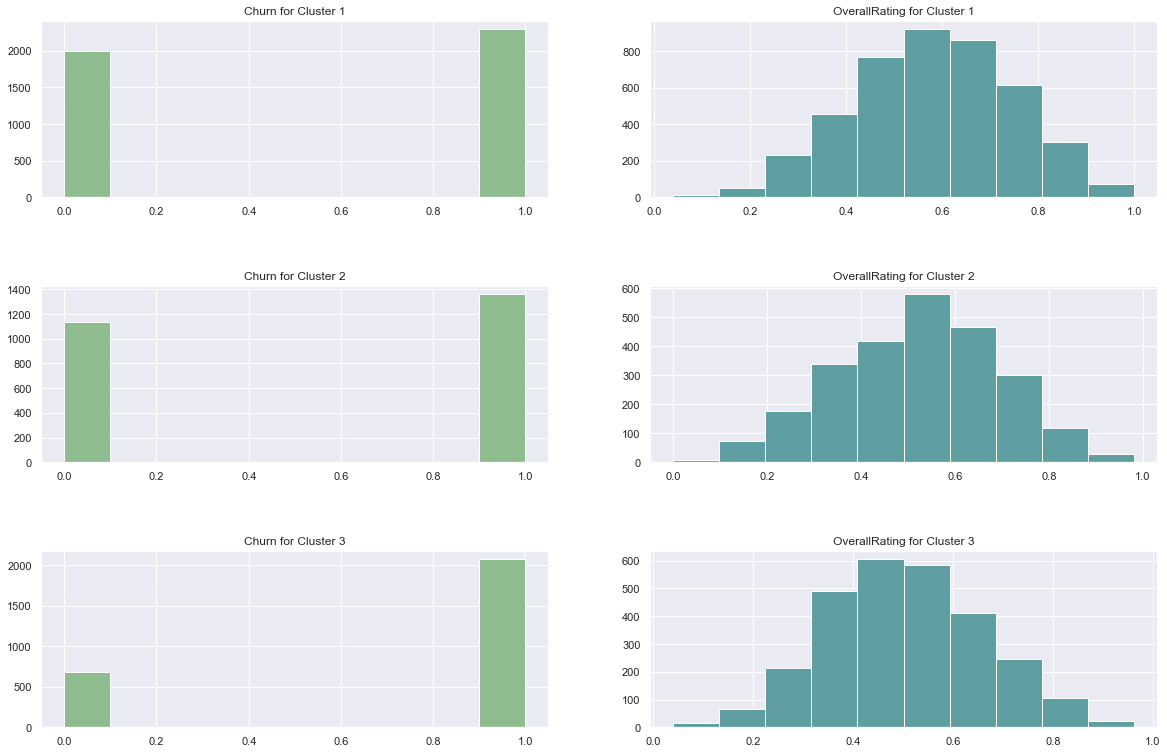

In [186]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,13))

# cluster 1
axs[0, 0].hist(df_short_business['Churn'].loc[df_short_business['Short_Business']==0], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 1')
axs[0, 1].hist(df_short_business['OverallRating'].loc[df_short_business['Short_Business']==0], color='cadetblue' )
axs[0, 1].set_title('OverallRating for Cluster 1')
plt.sca(axs[0, 1])
#plt.xticks([0, 1])


# cluster 2
axs[1, 0].hist(df_short_business['Churn'].loc[df_short_business['Short_Business']==1], color='darkseagreen')
axs[1, 0].set_title('Churn for Cluster 2')
axs[1, 1].hist(df_short_business['OverallRating'].loc[df_short_business['Short_Business']==1], color='cadetblue' )
axs[1, 1].set_title('OverallRating for Cluster 2')
plt.sca(axs[1, 1])
#plt.xticks([0, 1])


# cluster 3
axs[2, 0].hist(df_short_business['Churn'].loc[df_short_business['Short_Business']==2], color='darkseagreen')
axs[2, 0].set_title('Churn for Cluster 3')
axs[2, 1].hist(df_short_business['OverallRating'].loc[df_short_business['Short_Business']==2], color='cadetblue' )
axs[2, 1].set_title('OverallRating for Cluster 3')
plt.sca(axs[2, 1])
#plt.xticks([0, 1])


plt.subplots_adjust(hspace=0.5)                                          
plt.show()

### GMM

#### Client

In [187]:
EM = GaussianMixture(n_components = 5)
Client = EM.fit_predict(client)
Client

array([3, 1, 1, ..., 1, 4, 4], dtype=int64)

In [188]:
silhouette_score(client, Client)

0.4022840352046178

In [189]:
#probabilidade de cada cliente pertencer a cada um dos três segmentos 
EM.predict_proba(client)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.29388709e-10],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.23704166e-11],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.33753895e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00]])

In [190]:
client_GMM = pd.concat([client, pd.Series(Client, index=client.index, name="Client")], axis=1)
client_GMM

,Longevity,TypeTravel,RewardPoints,RoomType_single,RoomType_suite,Gender,Age,Client
0,1.0,1.0,0.525986,1.0,0.0,0.0,0.512821,3
1,1.0,1.0,0.947564,1.0,0.0,1.0,0.628205,1
2,1.0,1.0,0.400232,1.0,0.0,1.0,0.525641,1
3,1.0,0.0,0.280510,0.0,0.0,0.0,0.269231,2
4,1.0,1.0,0.634803,1.0,0.0,1.0,0.320513,1
...,...,...,...,...,...,...,...,...
15584,0.0,1.0,0.540139,0.0,0.0,0.0,0.333333,0
15585,0.0,1.0,0.540603,0.0,0.0,0.0,0.179487,0
15586,1.0,1.0,0.326218,1.0,0.0,1.0,0.641026,1
15587,1.0,0.0,0.583527,0.0,0.0,1.0,0.282051,4


In [191]:
client_GMM.groupby('Client').mean()

,Longevity,TypeTravel,RewardPoints,RoomType_single,RoomType_suite,Gender,Age
Client,,,,,,,
0,0.000000,0.985037,0.541769,0.365960,0.069825,0.013716,0.294960
1,0.738366,1.000000,0.535285,0.710651,0.000000,1.000000,0.428096
2,1.000000,0.301864,0.672966,0.000000,0.155515,0.000000,0.422305
3,1.000000,0.949244,0.533259,1.000000,0.000000,0.000000,0.470743
4,1.000000,0.094745,0.538557,0.064442,0.192558,1.000000,0.401468


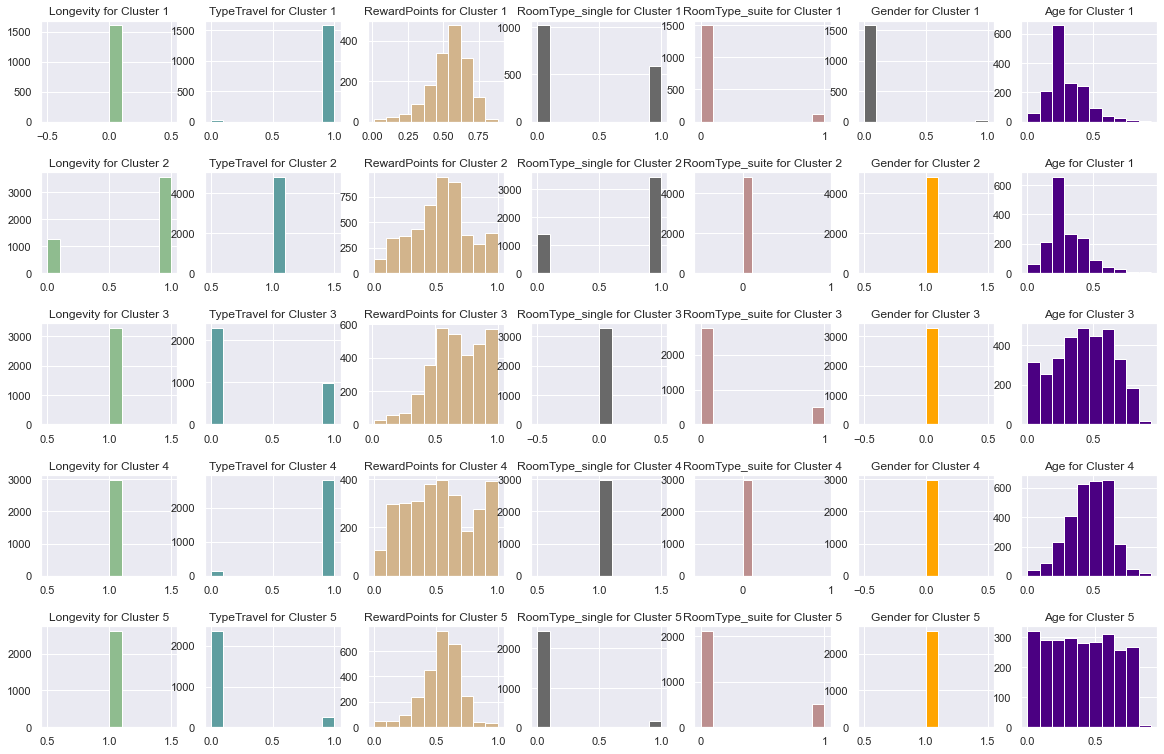

In [193]:
fig, axs = plt.subplots(nrows=5, ncols=7, figsize=(20,13))

# cluster 1
axs[0, 0].hist(client_GMM['Longevity'].loc[client_GMM['Client']==0], color='darkseagreen')
axs[0, 0].set_title('Longevity for Cluster 1')
axs[0, 1].hist(client_GMM['TypeTravel'].loc[client_GMM['Client']==0], color='cadetblue' )
axs[0, 1].set_title('TypeTravel for Cluster 1')
axs[0, 2].hist(client_GMM['RewardPoints'].loc[client_GMM['Client']==0], color='tan')
axs[0, 2].set_title('RewardPoints for Cluster 1')
axs[0, 3].hist(client_GMM['RoomType_single'].loc[client_GMM['Client']==0], color='dimgrey')
axs[0, 3].set_title('RoomType_single for Cluster 1')
axs[0, 4].hist(client_GMM['RoomType_suite'].loc[client_GMM['Client']==0], color='rosybrown')
axs[0, 4].set_title('RoomType_suite for Cluster 1')
axs[0, 5].hist(client_GMM['Gender'].loc[client_GMM['Client']==0], color='dimgrey')
axs[0, 5].set_title('Gender for Cluster 1')
plt.sca(axs[0, 4])
plt.xticks([0, 1])
axs[0, 6].hist(client_GMM['Age'].loc[client_GMM['Client']==0], color='indigo')
axs[0, 6].set_title('Age for Cluster 1')


# cluster 2
axs[1, 0].hist(client_GMM['Longevity'].loc[client_GMM['Client']==1], color='darkseagreen')
axs[1, 0].set_title('Longevity for Cluster 2')
axs[1, 1].hist(client_GMM['TypeTravel'].loc[client_GMM['Client']==1], color='cadetblue' )
axs[1, 1].set_title('TypeTravel for Cluster 2')
axs[1, 2].hist(client_GMM['RewardPoints'].loc[client_GMM['Client']==1], color='tan')
axs[1, 2].set_title('RewardPoints for Cluster 2')
axs[1, 3].hist(client_GMM['RoomType_single'].loc[client_GMM['Client']==1], color='dimgrey')
axs[1, 3].set_title('RoomType_single for Cluster 2')
axs[1, 4].hist(client_GMM['RoomType_suite'].loc[client_GMM['Client']==1], color='rosybrown')
axs[1, 4].set_title('RoomType_suite for Cluster 2')
axs[1, 5].hist(client_GMM['Gender'].loc[client_GMM['Client']==1], color='orange')
axs[1, 5].set_title('Gender for Cluster 2')
plt.sca(axs[1, 4])
plt.xticks([0, 1])
axs[1, 6].hist(client_GMM['Age'].loc[client_GMM['Client']==0], color='indigo')
axs[1, 6].set_title('Age for Cluster 1')


# cluster 3
axs[2, 0].hist(client_GMM['Longevity'].loc[client_GMM['Client']==2], color='darkseagreen')
axs[2, 0].set_title('Longevity for Cluster 3')
axs[2, 1].hist(client_GMM['TypeTravel'].loc[client_GMM['Client']==2], color='cadetblue' )
axs[2, 1].set_title('TypeTravel for Cluster 3')
axs[2, 2].hist(client_GMM['RewardPoints'].loc[client_GMM['Client']==2], color='tan')
axs[2, 2].set_title('RewardPoints for Cluster 3')
axs[2, 3].hist(client_GMM['RoomType_single'].loc[client_GMM['Client']==2], color='dimgrey')
axs[2, 3].set_title('RoomType_single for Cluster 3')
axs[2, 4].hist(client_GMM['RoomType_suite'].loc[client_GMM['Client']==2], color='rosybrown')
axs[2, 4].set_title('RoomType_suite for Cluster 3')
axs[2, 5].hist(client_GMM['Gender'].loc[client_GMM['Client']==2], color='orange')
axs[2, 5].set_title('Gender for Cluster 3')
plt.sca(axs[2, 4])
plt.xticks([0, 1])
axs[2, 6].hist(client_GMM['Age'].loc[client_GMM['Client']==2], color='indigo')
axs[2, 6].set_title('Age for Cluster 3')

# cluster 4
axs[3, 0].hist(client_GMM['Longevity'].loc[client_GMM['Client']==3], color='darkseagreen')
axs[3, 0].set_title('Longevity for Cluster 4')
axs[3, 1].hist(client_GMM['TypeTravel'].loc[client_GMM['Client']==3], color='cadetblue' )
axs[3, 1].set_title('TypeTravel for Cluster 4')
axs[3, 2].hist(client_GMM['RewardPoints'].loc[client_GMM['Client']==3], color='tan')
axs[3, 2].set_title('RewardPoints for Cluster 4')
axs[3, 3].hist(client_GMM['RoomType_single'].loc[client_GMM['Client']==3], color='dimgrey')
axs[3, 3].set_title('RoomType_single for Cluster 4')
axs[3, 4].hist(client_GMM['RoomType_suite'].loc[client_GMM['Client']==3], color='rosybrown')
axs[3, 4].set_title('RoomType_suite for Cluster 4')
axs[3, 5].hist(client_GMM['Gender'].loc[client_GMM['Client']==3], color='orange')
axs[3, 5].set_title('Gender for Cluster 4')
plt.sca(axs[3, 4])
plt.xticks([0, 1])
axs[3, 6].hist(client_GMM['Age'].loc[client_GMM['Client']==3], color='indigo')
axs[3, 6].set_title('Age for Cluster 4')

# cluster 5
axs[4, 0].hist(client_GMM['Longevity'].loc[client_GMM['Client']==4], color='darkseagreen')
axs[4, 0].set_title('Longevity for Cluster 5')
axs[4, 1].hist(client_GMM['TypeTravel'].loc[client_GMM['Client']==4], color='cadetblue' )
axs[4, 1].set_title('TypeTravel for Cluster 5')
axs[4, 2].hist(client_GMM['RewardPoints'].loc[client_GMM['Client']==4], color='tan')
axs[4, 2].set_title('RewardPoints for Cluster 5')
axs[4, 3].hist(client_GMM['RoomType_single'].loc[client_GMM['Client']==4], color='dimgrey')
axs[4, 3].set_title('RoomType_single for Cluster 5')
axs[4, 4].hist(client_GMM['RoomType_suite'].loc[client_GMM['Client']==4], color='rosybrown')
axs[4, 4].set_title('RoomType_suite for Cluster 5')
axs[4, 5].hist(client_GMM['Gender'].loc[client_GMM['Client']==4], color='orange')
axs[4, 5].set_title('Gender for Cluster 5')
plt.sca(axs[4, 4])
plt.xticks([0, 1])
axs[4, 6].hist(client_GMM['Age'].loc[client_GMM['Client']==4], color='indigo')
axs[4, 6].set_title('Age for Cluster 5')


plt.subplots_adjust(hspace=0.5)                                          
plt.show()

#### Business

In [194]:
EM = GaussianMixture(n_components = 4)
Business = EM.fit_predict(business)
Business

array([2, 0, 2, ..., 0, 1, 3], dtype=int64)

In [195]:
silhouette_score(business, Business)

0.02936375365790836

In [196]:
#probabilidade de cada cliente pertencer a cada um dos três segmentos 
EM.predict_proba(business)

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.42173985e-15, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 5.77472372e-14, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.84192220e-06, 9.99994158e-01]])

In [197]:
business_GMM = pd.concat([business, pd.Series(Business, index=business.index, name="Business")], axis=1)
business_GMM

,Churn,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Business
0,1.0,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,2
1,0.0,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,0
2,1.0,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,2
3,0.0,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,0
4,0.0,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,1.0,0.4,0.0,0.4,0.25,0.6,0.4,0.75,0.6,0.75,1.0,0.00,0.50,0.75,0.6,3
15585,1.0,0.6,0.6,0.6,0.50,1.0,0.6,1.00,1.0,0.50,0.2,0.50,0.75,0.75,1.0,3
15586,0.0,0.2,0.2,0.2,0.00,0.6,0.8,1.00,0.8,0.75,0.8,0.75,1.00,0.75,0.8,0
15587,0.0,0.8,0.6,0.8,0.75,1.0,0.8,1.00,1.0,0.25,1.0,0.75,0.50,0.75,1.0,1


In [198]:
business_GMM.groupby('Business').mean()

,Churn,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Business,,,,,,,,,,,,,,,
0,0.0,0.604783,0.604783,0.604783,0.505979,0.682260,0.832011,0.805519,0.842313,0.802891,0.850460,0.802694,0.691393,0.802891,0.764205
1,0.0,0.652819,0.582394,0.596479,0.482561,0.723067,0.777089,0.695732,0.754936,0.643247,0.701671,0.687820,0.631324,0.687152,0.740004
2,1.0,0.508599,0.628984,0.597354,0.504360,0.580758,0.639206,0.555322,0.525195,0.415664,0.547324,0.426338,0.415514,0.409200,0.542514
3,1.0,0.492040,0.600787,0.509871,0.498595,0.580221,0.486683,0.462821,0.580221,0.522617,0.624499,0.650918,0.515359,0.653072,0.580221


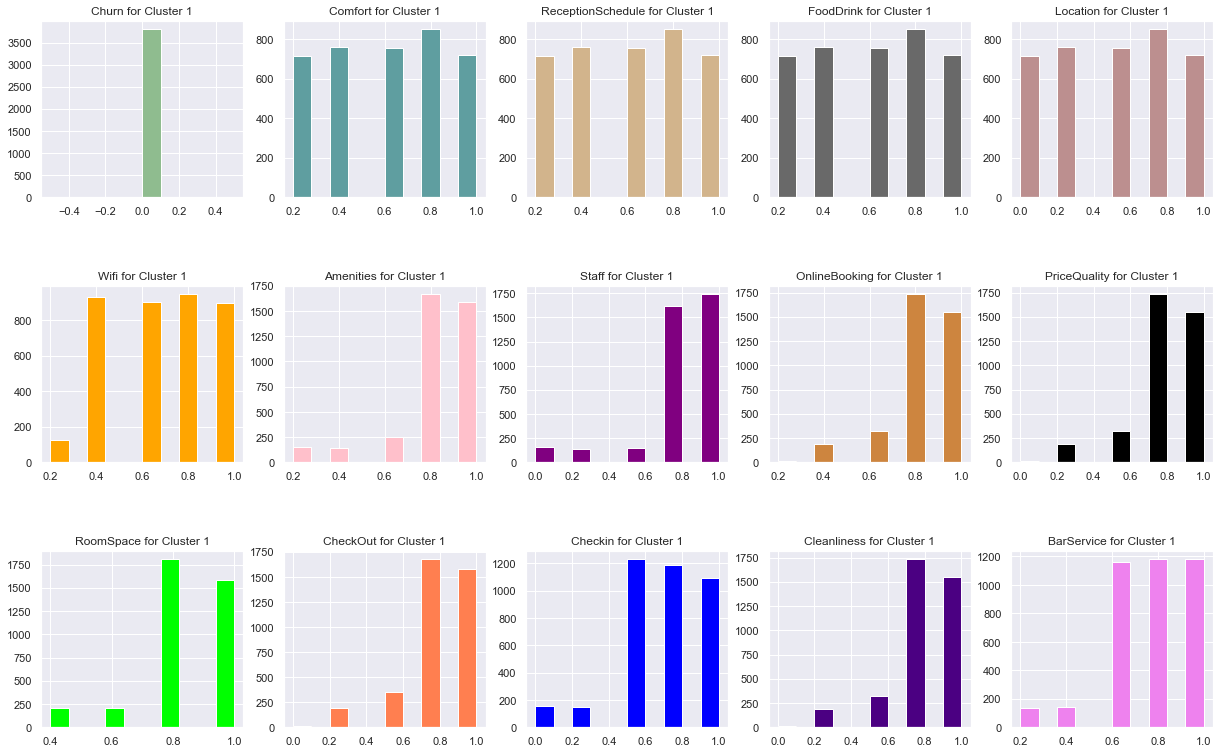

In [201]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21,13))

# cluster 1
axs[0, 0].hist(business_GMM['Churn'].loc[business_GMM['Business']==0], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 1')
axs[0, 1].hist(business_GMM['Comfort'].loc[business_GMM['Business']==0], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 1')
axs[0, 2].hist(business_GMM['ReceptionSchedule'].loc[business_GMM['Business']==0], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 1')
axs[0, 3].hist(business_GMM['FoodDrink'].loc[business_GMM['Business']==0], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 1')
axs[0, 4].hist(business_GMM['Location'].loc[business_GMM['Business']==0], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 1')
axs[1, 0].hist(business_GMM['Wifi'].loc[business_GMM['Business']==0], color='orange')
axs[1, 0].set_title('Wifi for Cluster 1')
axs[1, 1].hist(business_GMM['Amenities'].loc[business_GMM['Business']==0], color='pink')
axs[1, 1].set_title('Amenities for Cluster 1')
axs[1, 2].hist(business_GMM['Staff'].loc[business_GMM['Business']==0], color='purple')
axs[1, 2].set_title('Staff for Cluster 1')
axs[1, 3].hist(business_GMM['OnlineBooking'].loc[business_GMM['Business']==0], color='peru')
axs[1, 3].set_title('OnlineBooking for Cluster 1')
axs[1, 4].hist(business_GMM['PriceQuality'].loc[business_GMM['Business']==0], color='black')
axs[1, 4].set_title('PriceQuality for Cluster 1')
axs[2, 0].hist(business_GMM['RoomSpace'].loc[business_GMM['Business']==0], color='lime')
axs[2, 0].set_title('RoomSpace for Cluster 1')
axs[2, 1].hist(business_GMM['CheckOut'].loc[business_GMM['Business']==0], color='coral')
axs[2, 1].set_title('CheckOut for Cluster 1')
axs[2, 2].hist(business_GMM['Checkin'].loc[business_GMM['Business']==0], color='blue')
axs[2, 2].set_title('Checkin for Cluster 1')
axs[2, 3].hist(business_GMM['Cleanliness'].loc[business_GMM['Business']==0], color='indigo')
axs[2, 3].set_title('Cleanliness for Cluster 1')
axs[2, 4].hist(business_GMM['BarService'].loc[business_GMM['Business']==0], color='violet')
axs[2, 4].set_title('BarService for Cluster 1')


plt.subplots_adjust(hspace=0.5)
plt.show()

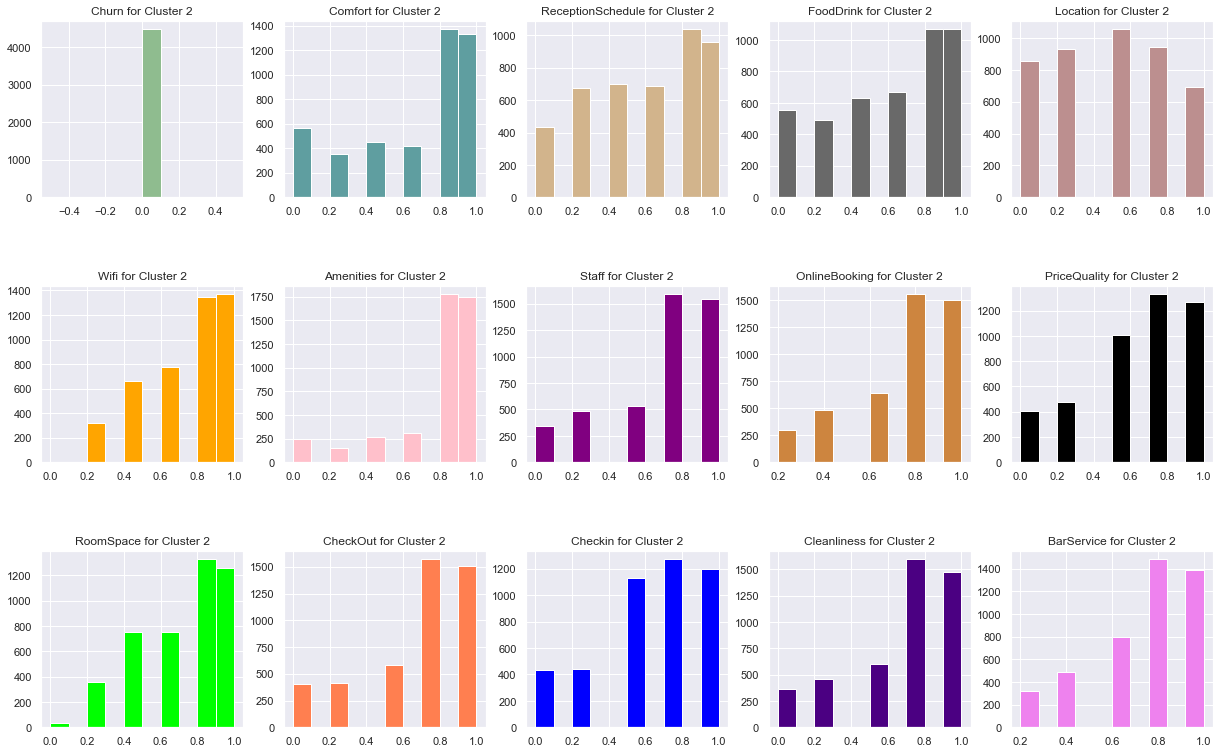

In [202]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21,13))

# cluster 2
axs[0, 0].hist(business_GMM['Churn'].loc[business_GMM['Business']==1], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 2')
axs[0, 1].hist(business_GMM['Comfort'].loc[business_GMM['Business']==1], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 2')
axs[0, 2].hist(business_GMM['ReceptionSchedule'].loc[business_GMM['Business']==1], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 2')
axs[0, 3].hist(business_GMM['FoodDrink'].loc[business_GMM['Business']==1], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 2')
axs[0, 4].hist(business_GMM['Location'].loc[business_GMM['Business']==1], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 2')
axs[1, 0].hist(business_GMM['Wifi'].loc[business_GMM['Business']==1], color='orange')
axs[1, 0].set_title('Wifi for Cluster 2')
axs[1, 1].hist(business_GMM['Amenities'].loc[business_GMM['Business']==1], color='pink')
axs[1, 1].set_title('Amenities for Cluster 2')
axs[1, 2].hist(business_GMM['Staff'].loc[business_GMM['Business']==1], color='purple')
axs[1, 2].set_title('Staff for Cluster 2')
axs[1, 3].hist(business_GMM['OnlineBooking'].loc[business_GMM['Business']==1], color='peru')
axs[1, 3].set_title('OnlineBooking for Cluster 2')
axs[1, 4].hist(business_GMM['PriceQuality'].loc[business_GMM['Business']==1], color='black')
axs[1, 4].set_title('PriceQuality for Cluster 2')
axs[2, 0].hist(business_GMM['RoomSpace'].loc[business_GMM['Business']==1], color='lime')
axs[2, 0].set_title('RoomSpace for Cluster 2')
axs[2, 1].hist(business_GMM['CheckOut'].loc[business_GMM['Business']==1], color='coral')
axs[2, 1].set_title('CheckOut for Cluster 2')
axs[2, 2].hist(business_GMM['Checkin'].loc[business_GMM['Business']==1], color='blue')
axs[2, 2].set_title('Checkin for Cluster 2')
axs[2, 3].hist(business_GMM['Cleanliness'].loc[business_GMM['Business']==1], color='indigo')
axs[2, 3].set_title('Cleanliness for Cluster 2')
axs[2, 4].hist(business_GMM['BarService'].loc[business_GMM['Business']==1], color='violet')
axs[2, 4].set_title('BarService for Cluster 2')


plt.subplots_adjust(hspace=0.5)
plt.show()

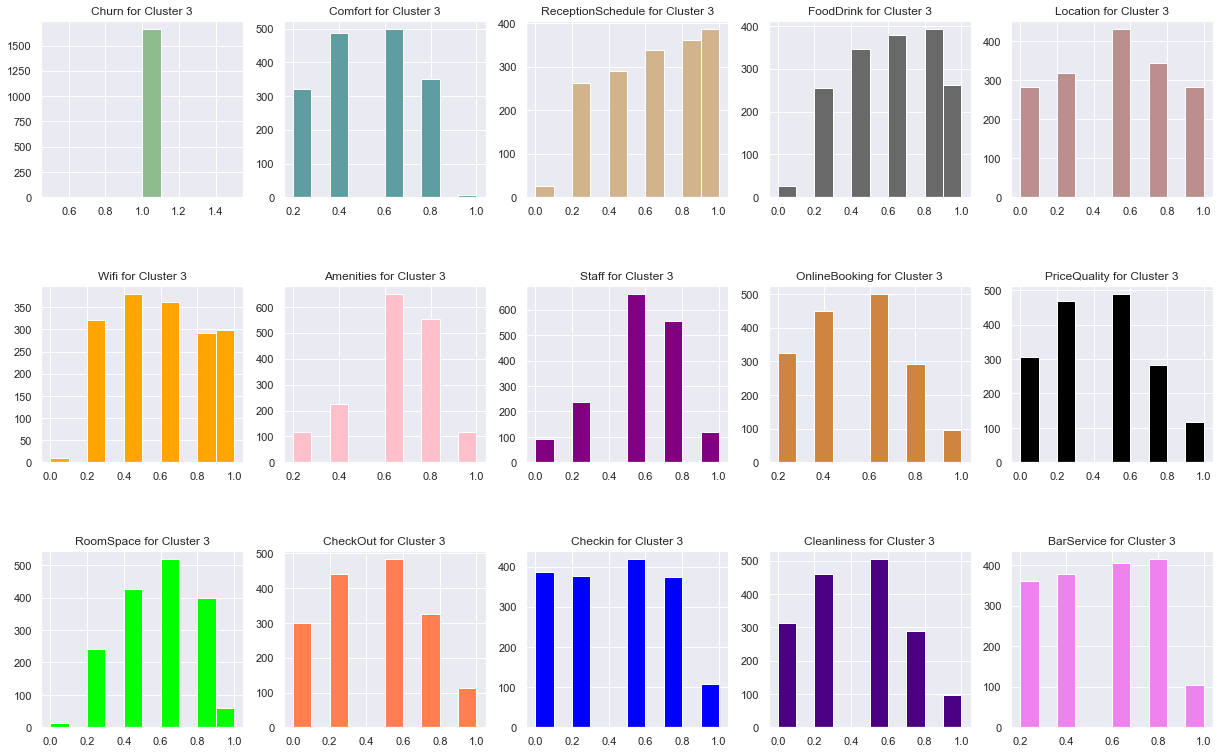

In [203]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21,13))

# cluster 3
axs[0, 0].hist(business_GMM['Churn'].loc[business_GMM['Business']==2], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 3')
axs[0, 1].hist(business_GMM['Comfort'].loc[business_GMM['Business']==2], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 3')
axs[0, 2].hist(business_GMM['ReceptionSchedule'].loc[business_GMM['Business']==2], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 3')
axs[0, 3].hist(business_GMM['FoodDrink'].loc[business_GMM['Business']==2], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 3')
axs[0, 4].hist(business_GMM['Location'].loc[business_GMM['Business']==2], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 3')
axs[1, 0].hist(business_GMM['Wifi'].loc[business_GMM['Business']==2], color='orange')
axs[1, 0].set_title('Wifi for Cluster 3')
axs[1, 1].hist(business_GMM['Amenities'].loc[business_GMM['Business']==2], color='pink')
axs[1, 1].set_title('Amenities for Cluster 3')
axs[1, 2].hist(business_GMM['Staff'].loc[business_GMM['Business']==2], color='purple')
axs[1, 2].set_title('Staff for Cluster 3')
axs[1, 3].hist(business_GMM['OnlineBooking'].loc[business_GMM['Business']==2], color='peru')
axs[1, 3].set_title('OnlineBooking for Cluster 3')
axs[1, 4].hist(business_GMM['PriceQuality'].loc[business_GMM['Business']==2], color='black')
axs[1, 4].set_title('PriceQuality for Cluster 3')
axs[2, 0].hist(business_GMM['RoomSpace'].loc[business_GMM['Business']==2], color='lime')
axs[2, 0].set_title('RoomSpace for Cluster 3')
axs[2, 1].hist(business_GMM['CheckOut'].loc[business_GMM['Business']==2], color='coral')
axs[2, 1].set_title('CheckOut for Cluster 3')
axs[2, 2].hist(business_GMM['Checkin'].loc[business_GMM['Business']==2], color='blue')
axs[2, 2].set_title('Checkin for Cluster 3')
axs[2, 3].hist(business_GMM['Cleanliness'].loc[business_GMM['Business']==2], color='indigo')
axs[2, 3].set_title('Cleanliness for Cluster 3')
axs[2, 4].hist(business_GMM['BarService'].loc[business_GMM['Business']==2], color='violet')
axs[2, 4].set_title('BarService for Cluster 3')


plt.subplots_adjust(hspace=0.5)
plt.show()

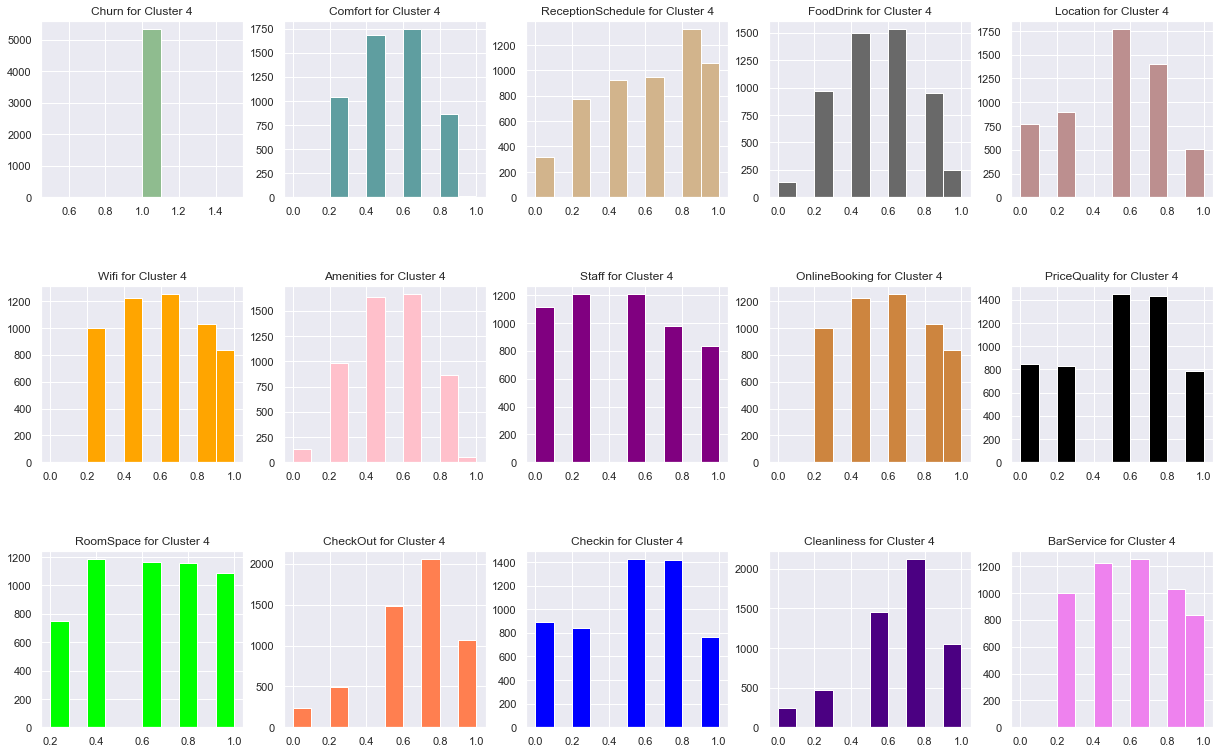

In [204]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21,13))

# cluster 4
axs[0, 0].hist(business_GMM['Churn'].loc[business_GMM['Business']==3], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 4')
axs[0, 1].hist(business_GMM['Comfort'].loc[business_GMM['Business']==3], color='cadetblue')
axs[0, 1].set_title('Comfort for Cluster 4')
axs[0, 2].hist(business_GMM['ReceptionSchedule'].loc[business_GMM['Business']==3], color='tan')
axs[0, 2].set_title('ReceptionSchedule for Cluster 4')
axs[0, 3].hist(business_GMM['FoodDrink'].loc[business_GMM['Business']==3], color='dimgrey')
axs[0, 3].set_title('FoodDrink for Cluster 4')
axs[0, 4].hist(business_GMM['Location'].loc[business_GMM['Business']==3], color='rosybrown')
axs[0, 4].set_title('Location for Cluster 4')
axs[1, 0].hist(business_GMM['Wifi'].loc[business_GMM['Business']==3], color='orange')
axs[1, 0].set_title('Wifi for Cluster 4')
axs[1, 1].hist(business_GMM['Amenities'].loc[business_GMM['Business']==3], color='pink')
axs[1, 1].set_title('Amenities for Cluster 4')
axs[1, 2].hist(business_GMM['Staff'].loc[business_GMM['Business']==3], color='purple')
axs[1, 2].set_title('Staff for Cluster 4')
axs[1, 3].hist(business_GMM['OnlineBooking'].loc[business_GMM['Business']==3], color='peru')
axs[1, 3].set_title('OnlineBooking for Cluster 4')
axs[1, 4].hist(business_GMM['PriceQuality'].loc[business_GMM['Business']==3], color='black')
axs[1, 4].set_title('PriceQuality for Cluster 4')
axs[2, 0].hist(business_GMM['RoomSpace'].loc[business_GMM['Business']==3], color='lime')
axs[2, 0].set_title('RoomSpace for Cluster 4')
axs[2, 1].hist(business_GMM['CheckOut'].loc[business_GMM['Business']==3], color='coral')
axs[2, 1].set_title('CheckOut for Cluster 4')
axs[2, 2].hist(business_GMM['Checkin'].loc[business_GMM['Business']==3], color='blue')
axs[2, 2].set_title('Checkin for Cluster 4')
axs[2, 3].hist(business_GMM['Cleanliness'].loc[business_GMM['Business']==3], color='indigo')
axs[2, 3].set_title('Cleanliness for Cluster 4')
axs[2, 4].hist(business_GMM['BarService'].loc[business_GMM['Business']==3], color='violet')
axs[2, 4].set_title('BarService for Cluster 4')


plt.subplots_adjust(hspace=0.5)
plt.show()

#### Short Business

In [205]:
EM = GaussianMixture(n_components = 3)
Short_Business = EM.fit_predict(short_business)
Short_Business

array([0, 1, 0, ..., 1, 2, 0], dtype=int64)

In [206]:
silhouette_score(short_business, Short_Business)

0.6833886661005161

In [207]:
#probabilidade de cada cliente pertencer a cada um dos três segmentos 
EM.predict_proba(short_business)

array([[1.        , 0.        , 0.        ],
       [0.        , 0.87473842, 0.12526158],
       [1.        , 0.        , 0.        ],
       ...,
       [0.        , 0.83114687, 0.16885313],
       [0.        , 0.1822135 , 0.8177865 ],
       [1.        , 0.        , 0.        ]])

In [208]:
short_business_GMM = pd.concat([short_business, pd.Series(Short_Business, index=short_business.index, name="Short_Business")], axis=1)
short_business_GMM

,Churn,OverallRating,Short_Business
0,1.0,0.567282,0
1,0.0,0.527704,1
2,1.0,0.414248,0
3,0.0,0.527704,1
4,0.0,0.641161,1
...,...,...,...
15584,1.0,0.414248,0
15585,1.0,0.641161,0
15586,0.0,0.546174,1
15587,0.0,0.773087,2


In [209]:
#só Clusters 1 e 2???
short_business_GMM['Short_Business'].unique()

array([0, 1, 2], dtype=int64)

In [210]:
short_business_GMM.groupby('Short_Business').mean()

,Churn,OverallRating
Short_Business,,
0,1.0,0.473342
1,0.0,0.523767
2,0.0,0.770869


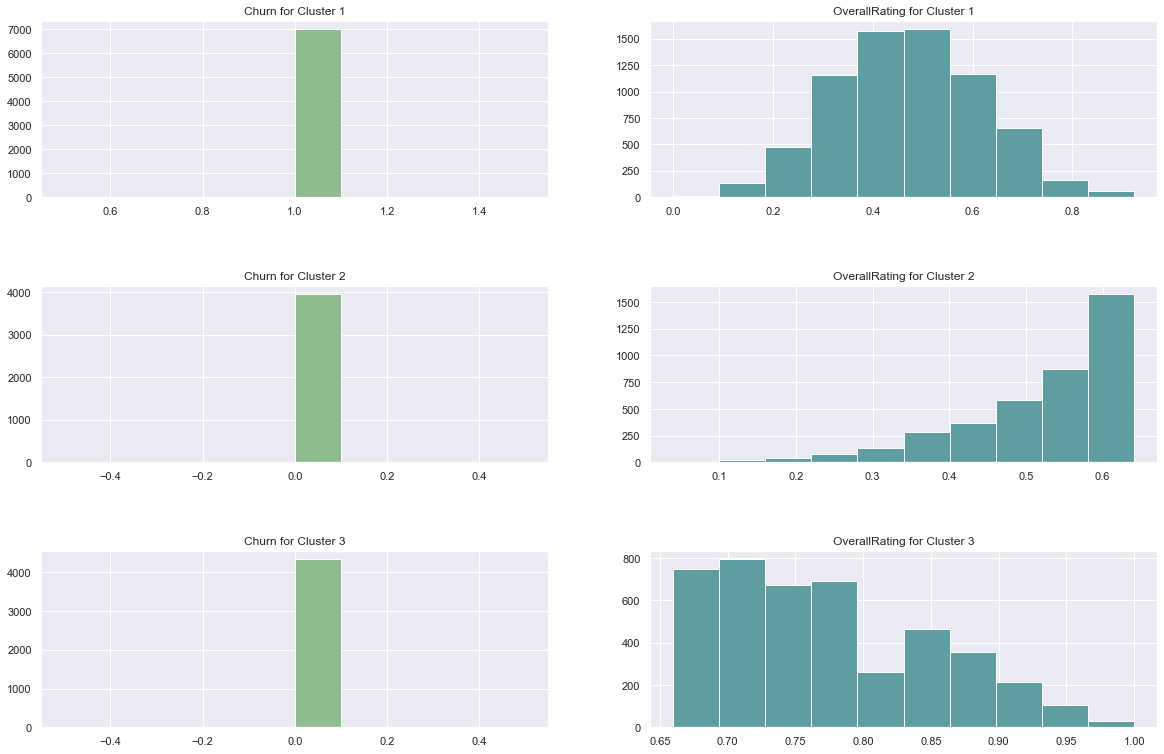

In [211]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,13))

# cluster 1
axs[0, 0].hist(short_business_GMM['Churn'].loc[short_business_GMM['Short_Business']==0], color='darkseagreen')
axs[0, 0].set_title('Churn for Cluster 1')
axs[0, 1].hist(short_business_GMM['OverallRating'].loc[short_business_GMM['Short_Business']==0], color='cadetblue' )
axs[0, 1].set_title('OverallRating for Cluster 1')
plt.sca(axs[0, 1])
#plt.xticks([0, 1])


# cluster 2
axs[1, 0].hist(short_business_GMM['Churn'].loc[short_business_GMM['Short_Business']==1], color='darkseagreen')
axs[1, 0].set_title('Churn for Cluster 2')
axs[1, 1].hist(short_business_GMM['OverallRating'].loc[short_business_GMM['Short_Business']==1], color='cadetblue' )
axs[1, 1].set_title('OverallRating for Cluster 2')
plt.sca(axs[1, 1])
#plt.xticks([0, 1])


# cluster 3
axs[2, 0].hist(short_business_GMM['Churn'].loc[short_business_GMM['Short_Business']==2], color='darkseagreen')
axs[2, 0].set_title('Churn for Cluster 3')
axs[2, 1].hist(short_business_GMM['OverallRating'].loc[short_business_GMM['Short_Business']==2], color='cadetblue' )
axs[2, 1].set_title('OverallRating for Cluster 3')
plt.sca(axs[2, 1])
#plt.xticks([0, 1])


plt.subplots_adjust(hspace=0.5)                                          
plt.show()

_________________________________________________________________________________________________________________
### PCA


In [212]:
df_normalized

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,Checkin,Cleanliness,BarService,Gender,Age,OverallRating,RoomType_single,RoomType_suite,Client_Kmeans,Business_Kmeans
0,1.0,1.0,1.0,0.525986,0.6,0.8,0.2,0.75,0.8,0.6,...,0.75,0.50,0.8,0.0,0.512821,0.567282,1.0,0.0,4,2
1,0.0,1.0,1.0,0.947564,0.2,0.2,0.2,0.00,1.0,0.6,...,0.00,1.00,0.4,1.0,0.628205,0.527704,1.0,0.0,2,0
2,1.0,1.0,1.0,0.400232,0.6,0.6,0.6,0.50,0.2,0.8,...,0.25,0.50,0.2,1.0,0.525641,0.414248,1.0,0.0,2,1
3,0.0,1.0,0.0,0.280510,0.2,0.2,0.2,0.00,0.8,0.8,...,0.75,0.75,0.6,0.0,0.269231,0.527704,0.0,0.0,3,0
4,0.0,1.0,1.0,0.634803,0.4,0.4,0.6,0.25,1.0,1.0,...,0.00,0.50,1.0,1.0,0.320513,0.641161,1.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,1.0,0.0,1.0,0.540139,0.4,0.0,0.4,0.25,0.6,0.4,...,0.50,0.75,0.6,0.0,0.333333,0.414248,0.0,0.0,0,2
15585,1.0,0.0,1.0,0.540603,0.6,0.6,0.6,0.50,1.0,0.6,...,0.75,0.75,1.0,0.0,0.179487,0.641161,0.0,0.0,0,2
15586,0.0,1.0,1.0,0.326218,0.2,0.2,0.2,0.00,0.6,0.8,...,1.00,0.75,0.8,1.0,0.641026,0.546174,1.0,0.0,2,0
15587,0.0,1.0,0.0,0.583527,0.8,0.6,0.8,0.75,1.0,0.8,...,0.50,0.75,1.0,1.0,0.282051,0.773087,0.0,0.0,1,3


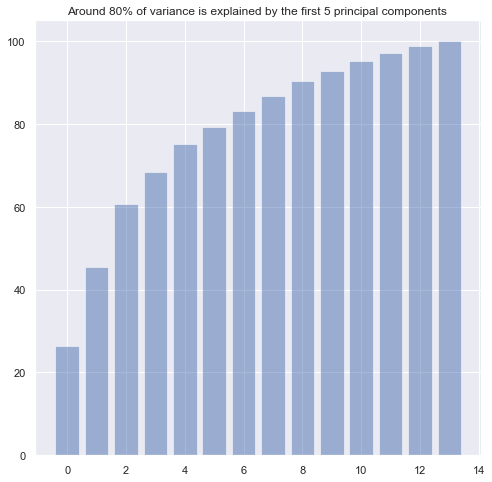

In [213]:
df_pca = df_normalized[rating_features]

#Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca)  

var_explained = pca.explained_variance_ratio_.cumsum()

pca.explained_variance_ratio_[:10].sum()

var_explained = var_explained*100 #percentage

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(len(var_explained)), var_explained, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 80% of variance is explained by the first 5 principal components ");

In [214]:
cov_matrix = df_pca.cov()
cov_matrix

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Comfort,0.077227,0.035429,0.057015,0.035224,0.008309,0.033113,0.010357,0.014679,0.010821,0.010087,0.009465,0.005068,0.008854,0.008863
ReceptionSchedule,0.035429,0.092513,0.045308,0.053287,-0.002001,0.005806,-0.000977,-0.001070,0.005776,0.002914,0.005098,0.006581,0.005451,-0.000713
FoodDrink,0.057015,0.045308,0.082580,0.048270,0.000486,0.029887,0.002041,0.002102,0.003247,0.006040,0.001743,0.001774,0.002014,0.000494
Location,0.035224,0.053287,0.048270,0.105325,-0.001419,0.000363,0.000841,0.000314,-0.002311,0.000134,-0.000477,-0.001780,-0.000396,0.000005
Wifi,0.008309,-0.002001,0.000486,-0.001419,0.070057,0.016970,0.047488,0.041802,0.005236,0.002345,0.002923,0.007219,0.002725,0.043005
Amenities,0.033113,0.005806,0.029887,0.000363,0.016970,0.073337,0.038500,0.021543,0.015312,0.011757,0.008306,0.018993,0.008207,0.023530
Staff,0.010357,-0.000977,0.002041,0.000841,0.047488,0.038500,0.108992,0.052335,0.015128,0.011607,0.008699,0.020877,0.007378,0.057005
OnlineBooking,0.014679,-0.001070,0.002102,0.000314,0.041802,0.021543,0.052335,0.068807,0.036362,0.023385,0.029816,0.010855,0.031411,0.046429
PriceQuality,0.010821,0.005776,0.003247,-0.002311,0.005236,0.015312,0.015128,0.036362,0.100447,0.033778,0.048247,0.024231,0.051197,0.010941
RoomSpace,0.010087,0.002914,0.006040,0.000134,0.002345,0.011757,0.011607,0.023385,0.033778,0.066885,0.030498,0.014441,0.031082,0.007297


In [215]:
# Obtaining the projected observations on the principal components axes (linear combinations)
pd.DataFrame(df_pca.values @ pca.components_.T, index=df_pca.index,columns=[f"PC{i}" for i in range(pca.n_components_)])

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.217522,-0.519737,0.237588,-0.142837,0.523329,-0.041078,-0.105610,-0.206271,0.154933,0.004575,-0.287753,0.036595,0.293455,-0.222652
1,-2.439655,0.462968,-0.365680,0.656318,-0.199737,-0.044463,-0.129056,-0.278353,0.110721,-0.022215,-0.372483,-0.428758,-0.018216,-0.009946
2,-1.805442,-0.689364,-0.013372,-0.010340,-0.184258,-0.139363,0.031992,-0.056001,-0.317328,-0.046707,-0.084828,-0.116063,0.071081,0.154085
3,-2.419786,0.425858,0.005079,-0.211124,0.021564,-0.127160,-0.120204,-0.203950,-0.001826,-0.027597,-0.272628,-0.240760,-0.030522,-0.044900
4,-2.663496,-0.043779,0.411376,0.482501,-0.286467,0.004673,0.201310,-0.091236,0.034527,0.169116,-0.443189,-0.021905,-0.212172,-0.119147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,-1.939555,0.076515,0.035421,-0.014919,-0.060713,-0.504947,-0.085484,-0.060564,0.498011,-0.450918,0.056999,-0.111223,-0.098404,-0.210986
15585,-2.564427,-0.341235,0.540229,-0.069022,0.375408,0.390963,-0.089331,-0.000827,0.108886,-0.192809,-0.066497,-0.004629,-0.099946,-0.020804
15586,-2.488538,0.445538,-0.027542,-0.439024,0.116315,-0.163304,-0.135681,-0.183695,-0.020720,-0.025313,-0.194433,0.011485,-0.085229,-0.063677
15587,-2.829818,-0.642926,0.439562,0.163088,0.085436,-0.091455,-0.667756,-0.276155,0.171807,-0.057938,-0.228307,-0.023177,-0.064547,-0.106943


In [216]:
# # Output PCA table
pd.DataFrame(
     {"Eigenvalue": pca.explained_variance_,
      "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
      "Proportion": pca.explained_variance_ratio_,
      "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
     index=range(1, pca.n_components_ + 1)
 )
# By kaiser´s rule (keep eigenvalue>1) ->>>> we should keep 4 PC
# By pearson´s rule (retain 80% of the variance) ->>>> we should keep 6 PC

,Eigenvalue,Difference,Proportion,Cumulative
1,0.313017,0.000000,0.265009,0.265009
2,0.224192,-0.088826,0.189807,0.454815
3,0.178893,-0.045299,0.151455,0.606271
4,0.091278,-0.087615,0.077278,0.683549
5,0.081217,-0.010060,0.068761,0.752309
6,0.047304,-0.033914,0.040048,0.792358
7,0.046911,-0.000392,0.039716,0.832074
8,0.043088,-0.003823,0.036479,0.868554
9,0.040768,-0.002320,0.034516,0.903069
10,0.030406,-0.010363,0.025742,0.928812


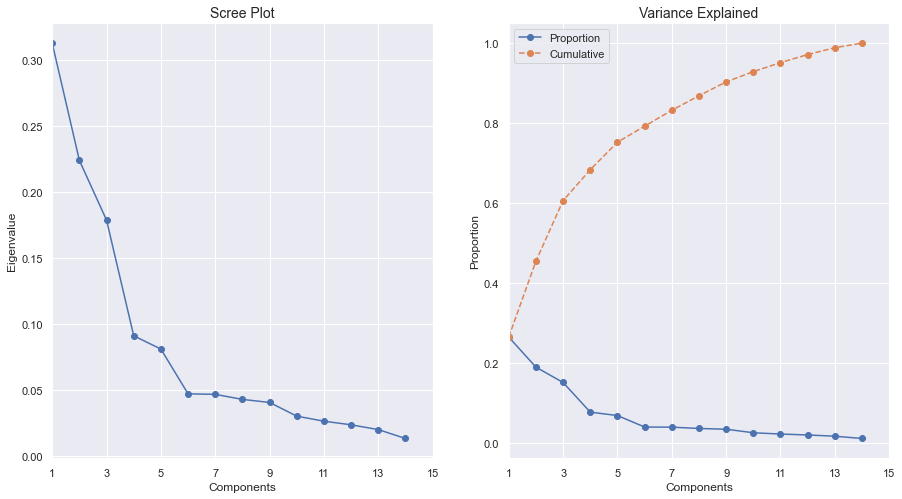

In [217]:
# # figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, 15, 2))
ax1.set_xlim([0,14])
ax1.set_xticklabels(range(1, 16, 2))
ax2.set_xticks(range(0, 15, 2))
ax2.set_xticklabels(range(1, 16, 2))
ax2.set_xlim([0,14])
plt.show()

In [218]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=6)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5
0,0.058977,-0.056224,0.296494,-0.094339,0.429435,-0.040433
1,-0.163156,0.926480,-0.306774,0.704816,-0.293631,-0.043818
2,0.471057,-0.225851,0.045534,0.038158,-0.278152,-0.138718
3,-0.143287,0.889370,0.063985,-0.162626,-0.072330,-0.126515
4,-0.386997,0.419734,0.470282,0.530999,-0.380361,0.005318
...,...,...,...,...,...,...
15584,0.336944,0.540027,0.094327,0.033579,-0.154607,-0.504301
15585,-0.287928,0.122277,0.599135,-0.020524,0.281514,0.391609
15586,-0.212039,0.909050,0.031364,-0.390526,0.022421,-0.162658
15587,-0.553319,-0.179414,0.498469,0.211585,-0.008458,-0.090810


In [219]:
pca.explained_variance_ratio_.sum()

0.7923577784736805

In [220]:
# # merging our PC´s to our variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,PC0,PC1,PC2,PC3,PC4,PC5
0,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,0.058977,-0.056224,0.296494,-0.094339,0.429435,-0.040433
1,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,-0.163156,0.926480,-0.306774,0.704816,-0.293631,-0.043818
2,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,0.471057,-0.225851,0.045534,0.038158,-0.278152,-0.138718
3,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,-0.143287,0.889370,0.063985,-0.162626,-0.072330,-0.126515
4,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,-0.386997,0.419734,0.470282,0.530999,-0.380361,0.005318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,0.4,0.0,0.4,0.25,0.6,0.4,0.75,0.6,0.75,1.0,0.00,0.50,0.75,0.6,0.336944,0.540027,0.094327,0.033579,-0.154607,-0.504301
15585,0.6,0.6,0.6,0.50,1.0,0.6,1.00,1.0,0.50,0.2,0.50,0.75,0.75,1.0,-0.287928,0.122277,0.599135,-0.020524,0.281514,0.391609
15586,0.2,0.2,0.2,0.00,0.6,0.8,1.00,0.8,0.75,0.8,0.75,1.00,0.75,0.8,-0.212039,0.909050,0.031364,-0.390526,0.022421,-0.162658
15587,0.8,0.6,0.8,0.75,1.0,0.8,1.00,1.0,0.25,1.0,0.75,0.50,0.75,1.0,-0.553319,-0.179414,0.498469,0.211585,-0.008458,-0.090810


In [221]:
def _color_red_or_green(val):
    if val < -0.50:
        color = 'background-color: red'
    elif val > 0.50:
        color = 'background-color: green'
    else:
        color = ''
    return color

# #Interpreting each Principal Component
loadings = df_pca.corr()
loadings.style.applymap(_color_red_or_green)

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,PC0,PC1,PC2,PC3,PC4,PC5
Comfort,1.000000,0.419156,0.713947,0.390556,0.112965,0.439999,0.112894,0.201365,0.122866,0.140347,0.117489,0.057621,0.110527,0.122587,-0.450659,-0.648885,0.058536,-0.047598,-0.387050,0.159119
ReceptionSchedule,0.419156,1.000000,0.518367,0.539829,-0.024855,0.070483,-0.009727,-0.013407,0.059913,0.037040,0.057822,0.068363,0.062170,-0.009009,-0.234635,-0.737651,-0.074725,0.021580,0.304089,0.124879
FoodDrink,0.713947,0.518367,1.000000,0.517573,0.006386,0.384046,0.021512,0.027887,0.035649,0.081269,0.020919,0.019503,0.024307,0.006604,-0.315051,-0.802004,0.043827,-0.071650,-0.291548,0.048523
Location,0.390556,0.539829,0.517573,1.000000,-0.016517,0.004127,0.007850,0.003692,-0.022466,0.001593,-0.005075,-0.017331,-0.004235,0.000065,-0.176325,-0.768797,0.023442,0.183159,0.401115,-0.216411
Wifi,0.112965,-0.024855,0.006386,-0.016517,1.000000,0.236750,0.543448,0.602089,0.062414,0.034258,0.038100,0.086179,0.035716,0.624514,-0.503736,0.201461,0.555968,0.176972,0.128173,0.277575
Amenities,0.439999,0.070483,0.384046,0.004127,0.236750,1.000000,0.430625,0.303270,0.178403,0.167876,0.105800,0.221594,0.105129,0.333969,-0.550730,-0.128510,0.264823,-0.332135,-0.531752,-0.066815
Staff,0.112894,-0.009727,0.021512,0.007850,0.543448,0.430625,1.000000,0.604339,0.144585,0.135949,0.090890,0.199806,0.077533,0.663685,-0.645642,0.217778,0.571593,-0.010050,0.093079,-0.210065
OnlineBooking,0.201365,-0.013407,0.027887,0.003692,0.602089,0.303270,0.604339,1.000000,0.437387,0.344711,0.392091,0.130753,0.415415,0.680332,-0.795962,0.260732,0.187248,0.302938,0.039342,0.066249
PriceQuality,0.122866,0.059913,0.035649,-0.022466,0.062414,0.178403,0.144585,0.437387,1.000000,0.412097,0.525121,0.241572,0.560389,0.132695,-0.613947,0.169615,-0.517252,0.103400,-0.051576,-0.094225
RoomSpace,0.140347,0.037040,0.081269,0.001593,0.034258,0.167876,0.135949,0.344711,0.412097,1.000000,0.406784,0.176423,0.416924,0.108451,-0.490910,0.092404,-0.371422,0.072798,-0.135778,-0.555185
